In [ ]:
#Bayesian Network

In [1]:
import numpy as np
from urllib import request
import gzip
import pickle
import pandas as pd
import PIL
from PIL import Image
import os
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tqdm import tqdm_notebook
from keras.utils import np_utils
%matplotlib inline
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import HillClimbSearch
import re
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
import io
import networkx as nx
import pylab as plt
from pgmpy.estimators import MaximumLikelihoodEstimator
from scipy import misc
import imageio

Using TensorFlow backend.


In [2]:
#features = pd.read_csv(io.StringIO(uploaded['15features.csv'].decode('utf-8')))
with open("15features.csv", "r") as f:
        features = pd.read_csv(f)
Nfeatures=features.drop('imagename',axis=1)

model1


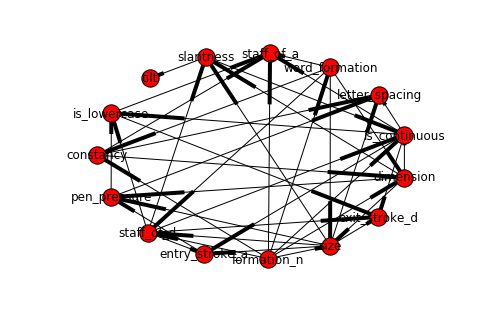

model2


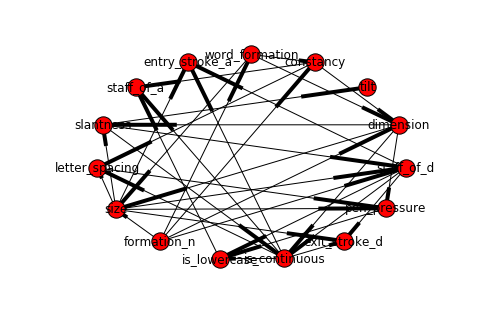

model3


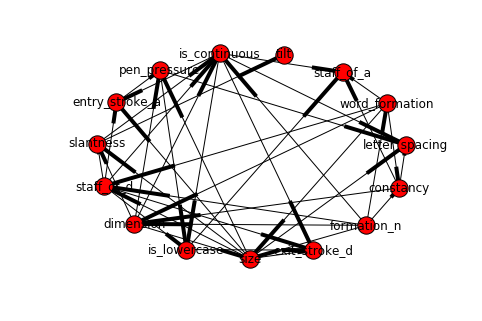

model4


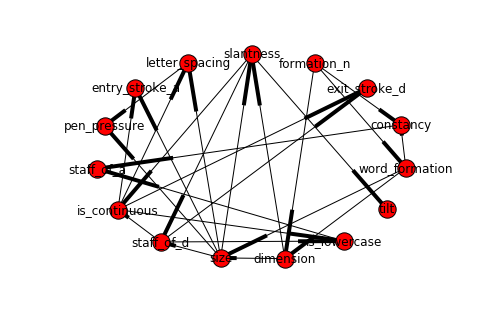

model5


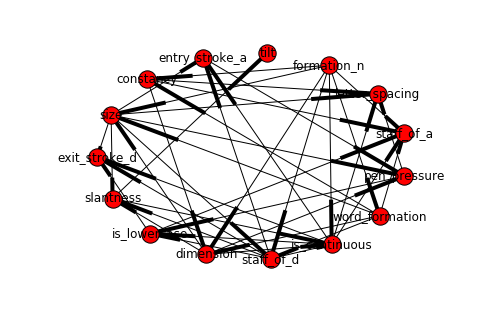

In [3]:
hc = HillClimbSearch(Nfeatures, scoring_method=K2Score(Nfeatures))
model1 = hc.estimate()
model1 = BayesianModel(model1.edges())
print("model1")
nx.draw(model1, with_labels=True)
plt.show()

hc = HillClimbSearch(Nfeatures, scoring_method=K2Score(Nfeatures))
model2 = hc.estimate(max_indegree=3)
model2 = BayesianModel(model2.edges())
print("model2")
nx.draw(model2, with_labels=True)
plt.show()

hc = HillClimbSearch(Nfeatures, scoring_method=K2Score(Nfeatures))
model3 = hc.estimate(max_indegree=4)
model3 = BayesianModel(model3.edges())
print("model3")
nx.draw(model3, with_labels=True)
plt.show()

hc = HillClimbSearch(Nfeatures, scoring_method=K2Score(Nfeatures))
model4 = hc.estimate(max_indegree=2)
model4 = BayesianModel(model4.edges())
print("model4")
nx.draw(model4, with_labels=True)
plt.show()

hc = HillClimbSearch(Nfeatures, scoring_method=K2Score(Nfeatures))
model5 = hc.estimate(max_indegree=5)
model5 = BayesianModel(model5.edges())
print("model5")
nx.draw(model5, with_labels=True)
plt.show()

Model 1 K2 Score: -139940.60250162857
Model 2 K2 Score: -140169.36625128562
Model 3 K2 Score: -139949.31225535396
Model 4 K2 Score: -141021.3938977501
Model 5 K2 Score: -139940.60250162857


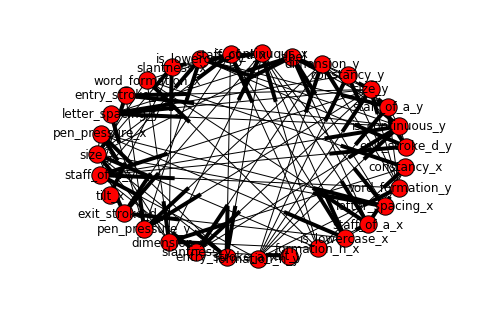

In [4]:
k2 = K2Score(Nfeatures)

print('Model 1 K2 Score: ' + str(k2.score(model1)))
print('Model 2 K2 Score: ' + str(k2.score(model2)))
print('Model 3 K2 Score: ' + str(k2.score(model3)))
print('Model 4 K2 Score: ' + str(k2.score(model4)))
print('Model 5 K2 Score: ' + str(k2.score(model5)))

combinedModel= BayesianModel([('entry_stroke_a_x', 'pen_pressure_x'), ('size_x', 'entry_stroke_a_x'), ('size_x', 'pen_pressure_x'), ('size_x', 'letter_spacing_x'), ('size_x', 'exit_stroke_d_x'), ('size_x', 'slantness_x'), ('size_x', 'staff_of_d_x'), ('is_continuous_x', 'exit_stroke_d_x'), ('is_continuous_x', 'entry_stroke_a_x'), ('is_continuous_x', 'letter_spacing_x'), ('is_continuous_x', 'staff_of_a_x'), ('is_continuous_x', 'is_lowercase_x'), ('word_formation_x', 'dimension_x'), ('word_formation_x', 'constancy_x'), ('word_formation_x', 'size_x'), ('word_formation_x', 'staff_of_a_x'), ('word_formation_x', 'staff_of_d_x'), ('constancy_x', 'dimension_x'), ('constancy_x', 'letter_spacing_x'), ('constancy_x', 'staff_of_a_x'), ('staff_of_d_x', 'exit_stroke_d_x'), ('staff_of_d_x', 'is_lowercase_x'), ('staff_of_d_x', 'slantness_x'), ('staff_of_d_x', 'is_continuous_x'), ('staff_of_d_x', 'entry_stroke_a_x'), ('is_lowercase_x', 'exit_stroke_d_x'), ('is_lowercase_x', 'staff_of_a_x'), ('pen_pressure_x', 'is_lowercase_x'), ('pen_pressure_x', 'letter_spacing_x'), ('dimension_x', 'pen_pressure_x'), ('dimension_x', 'size_x'), ('dimension_x', 'is_continuous_x'), ('dimension_x', 'slantness_x'), ('formation_n_x', 'size_x'), ('formation_n_x', 'is_continuous_x'), ('formation_n_x', 'staff_of_a_x'), ('formation_n_x', 'dimension_x'), ('formation_n_x', 'word_formation_x'), ('formation_n_x', 'constancy_x'), ('formation_n_x', 'staff_of_d_x'), ('slantness_x', 'tilt_x'), ('slantness_x', 'is_continuous_x'),('size_x','label'),('letter_spacing_x','label'),('staff_of_a_x','label'),('size_y','label'),('letter_spacing_y','label'),('staff_of_a_y','label'),('entry_stroke_a_y', 'pen_pressure_y'), ('size_y', 'entry_stroke_a_y'), ('size_y', 'pen_pressure_y'), ('size_y', 'letter_spacing_y'), ('size_y', 'exit_stroke_d_y'), ('size_y', 'slantness_y'), ('size_y', 'staff_of_d_y'), ('is_continuous_y', 'exit_stroke_d_y'), ('is_continuous_y', 'entry_stroke_a_y'), ('is_continuous_y', 'letter_spacing_y'), ('is_continuous_y', 'staff_of_a_y'), ('is_continuous_y', 'is_lowercase_y'), ('word_formation_y', 'dimension_y'), ('word_formation_y', 'constancy_y'), ('word_formation_y', 'size_y'), ('word_formation_y', 'staff_of_a_y'), ('word_formation_y', 'staff_of_d_y'), ('constancy_y', 'dimension_y'), ('constancy_y', 'letter_spacing_y'), ('constancy_y', 'staff_of_a_y'), ('staff_of_d_y', 'exit_stroke_d_y'), ('staff_of_d_y', 'is_lowercase_y'), ('staff_of_d_y', 'slantness_y'), ('staff_of_d_y', 'is_continuous_y'), ('staff_of_d_y', 'entry_stroke_a_y'), ('is_lowercase_y', 'exit_stroke_d_y'), ('is_lowercase_y', 'staff_of_a_y'), ('pen_pressure_y', 'is_lowercase_y'), ('pen_pressure_y', 'letter_spacing_y'), ('dimension_y', 'pen_pressure_y'), ('dimension_y', 'size_y'), ('dimension_y', 'is_continuous_y'), ('dimension_y', 'slantness_y'), ('formation_n_y', 'size_y'), ('formation_n_y', 'is_continuous_y'), ('formation_n_y', 'staff_of_a_y'), ('formation_n_y', 'dimension_y'), ('formation_n_y', 'word_formation_y'), ('formation_n_y', 'constancy_y'), ('formation_n_y', 'staff_of_d_y'), ('slantness_y', 'tilt_y'), ('slantness_y', 'is_continuous_y')])
nx.draw(combinedModel, with_labels=True)
plt.show()

In [5]:
from pgmpy.estimators import BayesianEstimator
est = BayesianEstimator(model1, Nfeatures)

f1_cpd=est.estimate_cpd('pen_pressure', prior_type='K2', equivalent_sample_size=20)
f2_cpd=est.estimate_cpd('letter_spacing', prior_type='K2', equivalent_sample_size=20)
f3_cpd=est.estimate_cpd('size', prior_type='K2', equivalent_sample_size=20)
f4_cpd=est.estimate_cpd('dimension', prior_type='K2', equivalent_sample_size=20)
f5_cpd=est.estimate_cpd('is_lowercase', prior_type='K2', equivalent_sample_size=20)
f6_cpd=est.estimate_cpd('is_continuous', prior_type='K2', equivalent_sample_size=20)
f7_cpd=est.estimate_cpd('slantness', prior_type='K2', equivalent_sample_size=20)
f8_cpd=est.estimate_cpd('tilt', prior_type='K2', equivalent_sample_size=20)
f9_cpd=est.estimate_cpd('entry_stroke_a', prior_type='K2', equivalent_sample_size=20)
f10_cpd=est.estimate_cpd('staff_of_a', prior_type='K2', equivalent_sample_size=20)
f11_cpd=est.estimate_cpd('formation_n', prior_type='K2', equivalent_sample_size=20)
f12_cpd=est.estimate_cpd('staff_of_d', prior_type='K2', equivalent_sample_size=20)
f13_cpd=est.estimate_cpd('exit_stroke_d', prior_type='K2', equivalent_sample_size=20)
f14_cpd=est.estimate_cpd('word_formation', prior_type='K2', equivalent_sample_size=20)
f15_cpd=est.estimate_cpd('constancy', prior_type='K2', equivalent_sample_size=20)

In [6]:
print("f1_cpd")
print(f1_cpd)
print("f2_cpd")
print(f2_cpd)
print("f3_cpd")
print(f3_cpd)
print("f4_cpd")
print(f4_cpd)
print("f5_cpd")
print(f5_cpd)
print("f6_cpd")
print(f6_cpd)
print("f7_cpd")
print(f7_cpd)
print("f8_cpd")
print(f8_cpd)
print("f9_cpd")
print(f9_cpd)
print("f10_cpd")
print(f10_cpd)
print("f11_cpd")
print(f11_cpd)
print("f12_cpd")
print(f12_cpd)
print("f13_cpd")
print(f13_cpd)
print("f14_cpd")
print(f14_cpd)
print("f15_cpd")
print(f5_cpd)

f1_cpd
+-----------------+--------------------+---------------------+---------------------+--------------------+---------------------+-------------------+--------------------+---------------------+---------------------+--------------------+---------------------+--------------------+-------------------+---------------------+--------------------+-------------------+-------------------+-------------------+
| dimension       | dimension(1)       | dimension(1)        | dimension(1)        | dimension(1)       | dimension(1)        | dimension(1)      | dimension(2)       | dimension(2)        | dimension(2)        | dimension(2)       | dimension(2)        | dimension(2)       | dimension(3)      | dimension(3)        | dimension(3)       | dimension(3)      | dimension(3)      | dimension(3)      |
+-----------------+--------------------+---------------------+---------------------+--------------------+---------------------+-------------------+--------------------+---------------------+---

+-------------------+---------------------+---------------------+--------------------+------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
f3_cpd
+----------------+---------------------+-------------------+----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+----------------------+
| dimension      | dimension(1)        | dimension(1)      | dimension(1)         | dimension(1)        | dimension(2)        | dimension(2)        | dimension(2)  

+-----------------+--------------------+------------------+----------------------+---------------------+----------------------+----------------------+---------------------+-----------------------+-----------------------+----------------------+------------------------+-----------------------+
f6_cpd
+------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+---------------------+--------------------+---------------------+--------------------+---------------------+---------------------+--------------------+----------

+------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+---------------------+--------------------+---------------------+--------------------+---------------------+---------------------+--------------------+--------------------+----------------+---------------------+---------------------+--------------------+--------------------+--------------------+---------------------+---------------------+--------------------+---------------------+---------------------+--------------------+---------------------+-------------

+--------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+---------------------+---------------------+----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+----------------------+---------------------+---------------+---------------------+----------------------+---------------------+---------------------+---------------------+---------------------+----------------------+----------------------+
f8_cpd
+-----------+---------------------+-------------------+-------------------+---------------------+
| slantness | slantness(1)        | slantness(2)      | slantness(3)      | slantness(4)        |
+-----------+---------------------+-------------------+-------------------+---------------------+
| tilt(1)   | 0.8642674978747521  | 0.758335422411632 | 0.754163890739507 | 0.748543689

+----------------+---------------------+---------------------+---------------------+---------------------+-------------------+-------------------+---------------------+---------------------+----------------------+---------------------+--------------------+---------------------+-------------------+-------------------+---------------------+---------------------+-------------------+---------------------+---------------------+---------------------+-------------------+-------------------+---------------------+-------------------+---------------------+----------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
f11_cpd
+----------------+----------+
| formation_n(1) | 0.229738 |
+----------------+----------+
| formation_n(2) | 0.770262 |
+----------------+----------+
f12_cpd
+----------------+---------------------+---------------------+--------------------+---------------------+---------------------

+------------------+---------------------+------------------+------------------+----------------------+---------------------+------------------+----------------------+------------------+------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+---------------------+---------------------+------------------+------------------+------------------+---------------------+------------------+---------------------+------------------+------------------+------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
f14_cpd
+-------------------+---------------------+--------------------+
| formation_n       | formation_n(1)      | formation_n(2)     |
+-------------------+---------------------+--------------------+
| word_formation(1

In [9]:
#SeenData
#Data retrieval from excel
data_training = pd.read_csv('seen-dataset/seen-dataset/dataset_seen_training_siamese.csv')
data_validation= pd.read_csv('seen-dataset/seen-dataset/dataset_seen_validation_siamese.csv')
data_training=data_training.drop('Unnamed: 0',axis=1)
data_validation=data_validation.drop('Unnamed: 0',axis=1)

#Data processing of training data set
left=data_training.merge(
    features ,
    left_on='left',
    right_on='imagename',
    how ='left'
        )
dataset=left.merge(
    features,
    left_on='right',
    right_on='imagename',
    how='left'
)
dataset=dataset.drop(['left','right','imagename_x','imagename_y',],axis=1)
cpy_dataset=dataset.fillna(dataset.apply(lambda row: row.fillna(round(row.mean())), axis=0))

#Fit Data to model 
combinedModel.fit(cpy_dataset,estimator=MaximumLikelihoodEstimator)

#Data processing of validation data set
val_left=data_validation.merge(
    features ,
    left_on='left',
    right_on='imagename',
    how ='left'
        )
val_dataset=val_left.merge(
    features,
    left_on='right',
    right_on='imagename',
    how='left'
)
val_dataset=val_dataset.drop(['left','right','imagename_x','imagename_y',],axis=1)
cpy_val_dataset=val_dataset.copy()
cpy_val_dataset.drop('label',axis=1,inplace=True)
cpy_val_dataset=cpy_val_dataset.fillna(cpy_val_dataset.apply(lambda row: row.fillna(round(row.mean())), axis=0))
cpy_val_dataset=cpy_val_dataset[::].astype(np.int64)

#Predict Analysis

preds=combinedModel.predict(cpy_val_dataset-1)
preds1=preds.values
target=val_dataset['label'].values

#Accuracy
count=0
for i in range(len(preds)):
  if(preds1[i]==target[i]):
    count=count+1
print("Accuracy on seen Dataset is: "+str(count/len(preds)*100))


Accuracy on seen Dataset is: 46.909492273730685


In [10]:
#UnseenData
#Data retrieval from excel
data_training_unseen = pd.read_csv('unseen-dataset/unseen-dataset/dataset_seen_training_siamese.csv')
data_validation_unseen= pd.read_csv('unseen-dataset/unseen-dataset/dataset_seen_validation_siamese.csv')
data_training_unseen=data_training_unseen.drop('Unnamed: 0',axis=1)
data_validation_unseen=data_validation_unseen.drop('Unnamed: 0',axis=1)

#Data processing of training data set
left=data_training_unseen.merge(
    features ,
    left_on='left',
    right_on='imagename',
    how ='left'
        )
dataset=left.merge(
    features,
    left_on='right',
    right_on='imagename',
    how='left'
)
dataset=dataset.drop(['left','right','imagename_x','imagename_y',],axis=1)
cpy_dataset_unseen=dataset.fillna(dataset.apply(lambda row: row.fillna(round(row.mean())), axis=0))

#Fit Data to model 
combinedModel= BayesianModel([('entry_stroke_a_x', 'pen_pressure_x'), ('size_x', 'entry_stroke_a_x'), ('size_x', 'pen_pressure_x'), ('size_x', 'letter_spacing_x'), ('size_x', 'exit_stroke_d_x'), ('size_x', 'slantness_x'), ('size_x', 'staff_of_d_x'), ('is_continuous_x', 'exit_stroke_d_x'), ('is_continuous_x', 'entry_stroke_a_x'), ('is_continuous_x', 'letter_spacing_x'), ('is_continuous_x', 'staff_of_a_x'), ('is_continuous_x', 'is_lowercase_x'), ('word_formation_x', 'dimension_x'), ('word_formation_x', 'constancy_x'), ('word_formation_x', 'size_x'), ('word_formation_x', 'staff_of_a_x'), ('word_formation_x', 'staff_of_d_x'), ('constancy_x', 'dimension_x'), ('constancy_x', 'letter_spacing_x'), ('constancy_x', 'staff_of_a_x'), ('staff_of_d_x', 'exit_stroke_d_x'), ('staff_of_d_x', 'is_lowercase_x'), ('staff_of_d_x', 'slantness_x'), ('staff_of_d_x', 'is_continuous_x'), ('staff_of_d_x', 'entry_stroke_a_x'), ('is_lowercase_x', 'exit_stroke_d_x'), ('is_lowercase_x', 'staff_of_a_x'), ('pen_pressure_x', 'is_lowercase_x'), ('pen_pressure_x', 'letter_spacing_x'), ('dimension_x', 'pen_pressure_x'), ('dimension_x', 'size_x'), ('dimension_x', 'is_continuous_x'), ('dimension_x', 'slantness_x'), ('formation_n_x', 'size_x'), ('formation_n_x', 'is_continuous_x'), ('formation_n_x', 'staff_of_a_x'), ('formation_n_x', 'dimension_x'), ('formation_n_x', 'word_formation_x'), ('formation_n_x', 'constancy_x'), ('formation_n_x', 'staff_of_d_x'), ('slantness_x', 'tilt_x'), ('slantness_x', 'is_continuous_x'),('size_x','label'),('letter_spacing_x','label'),('staff_of_a_x','label'),('size_y','label'),('letter_spacing_y','label'),('staff_of_a_y','label'),('entry_stroke_a_y', 'pen_pressure_y'), ('size_y', 'entry_stroke_a_y'), ('size_y', 'pen_pressure_y'), ('size_y', 'letter_spacing_y'), ('size_y', 'exit_stroke_d_y'), ('size_y', 'slantness_y'), ('size_y', 'staff_of_d_y'), ('is_continuous_y', 'exit_stroke_d_y'), ('is_continuous_y', 'entry_stroke_a_y'), ('is_continuous_y', 'letter_spacing_y'), ('is_continuous_y', 'staff_of_a_y'), ('is_continuous_y', 'is_lowercase_y'), ('word_formation_y', 'dimension_y'), ('word_formation_y', 'constancy_y'), ('word_formation_y', 'size_y'), ('word_formation_y', 'staff_of_a_y'), ('word_formation_y', 'staff_of_d_y'), ('constancy_y', 'dimension_y'), ('constancy_y', 'letter_spacing_y'), ('constancy_y', 'staff_of_a_y'), ('staff_of_d_y', 'exit_stroke_d_y'), ('staff_of_d_y', 'is_lowercase_y'), ('staff_of_d_y', 'slantness_y'), ('staff_of_d_y', 'is_continuous_y'), ('staff_of_d_y', 'entry_stroke_a_y'), ('is_lowercase_y', 'exit_stroke_d_y'), ('is_lowercase_y', 'staff_of_a_y'), ('pen_pressure_y', 'is_lowercase_y'), ('pen_pressure_y', 'letter_spacing_y'), ('dimension_y', 'pen_pressure_y'), ('dimension_y', 'size_y'), ('dimension_y', 'is_continuous_y'), ('dimension_y', 'slantness_y'), ('formation_n_y', 'size_y'), ('formation_n_y', 'is_continuous_y'), ('formation_n_y', 'staff_of_a_y'), ('formation_n_y', 'dimension_y'), ('formation_n_y', 'word_formation_y'), ('formation_n_y', 'constancy_y'), ('formation_n_y', 'staff_of_d_y'), ('slantness_y', 'tilt_y'), ('slantness_y', 'is_continuous_y')])
combinedModel.fit(cpy_dataset_unseen,estimator=MaximumLikelihoodEstimator)

#Data processing of validation data set
val_left=data_validation_unseen.merge(
    features ,
    left_on='left',
    right_on='imagename',
    how ='left'
        )
val_dataset=val_left.merge(
    features,
    left_on='right',
    right_on='imagename',
    how='left'
)
val_dataset=val_dataset.drop(['left','right','imagename_x','imagename_y',],axis=1)
cpy_val_dataset=val_dataset.copy()
cpy_val_dataset.drop('label',axis=1,inplace=True)
cpy_val_dataset=cpy_val_dataset.fillna(cpy_val_dataset.apply(lambda row: row.fillna(round(row.mean())), axis=0))
cpy_val_dataset=cpy_val_dataset[::].astype(np.int64)

#Predict Analysis

preds=combinedModel.predict(cpy_val_dataset-1)
preds1=preds.values
target=val_dataset['label'].values

#Accuracy
count=0
for i in range(len(preds)):
  if(preds1[i]==target[i]):
    count=count+1
print("Accuracy on Unseen Dataset is: "+str(count/len(preds)*100))

Accuracy on Unseen Dataset is: 45.844327176781


In [17]:
#ShuffledData
#Data retrieval from excel
data_training_shuffled = pd.read_csv('shuffled-dataset/shuffled-dataset/dataset_seen_training_siamese.csv')
data_validation_shuffled= pd.read_csv('shuffled-dataset/shuffled-dataset/dataset_seen_validation_siamese.csv')
data_training_shuffled=data_training_shuffled.drop('Unnamed: 0',axis=1)
data_validation_shuffled=data_validation_shuffled.drop('Unnamed: 0',axis=1)

#Data processing of training data set
left=data_training_shuffled.merge(
    features ,
    left_on='left',
    right_on='imagename',
    how ='left'
        )
dataset=left.merge(
    features,
    left_on='right',
    right_on='imagename',
    how='left'
)
dataset=dataset.drop(['left','right','imagename_x','imagename_y',],axis=1)
cpy_dataset_shuffled=dataset.fillna(dataset.apply(lambda row: row.fillna(round(row.mean())), axis=0))

#Fit Data to model 
combinedModel= BayesianModel([('entry_stroke_a_x', 'pen_pressure_x'), ('size_x', 'entry_stroke_a_x'), ('size_x', 'pen_pressure_x'), ('size_x', 'letter_spacing_x'), ('size_x', 'exit_stroke_d_x'), ('size_x', 'slantness_x'), ('size_x', 'staff_of_d_x'), ('is_continuous_x', 'exit_stroke_d_x'), ('is_continuous_x', 'entry_stroke_a_x'), ('is_continuous_x', 'letter_spacing_x'), ('is_continuous_x', 'staff_of_a_x'), ('is_continuous_x', 'is_lowercase_x'), ('word_formation_x', 'dimension_x'), ('word_formation_x', 'constancy_x'), ('word_formation_x', 'size_x'), ('word_formation_x', 'staff_of_a_x'), ('word_formation_x', 'staff_of_d_x'), ('constancy_x', 'dimension_x'), ('constancy_x', 'letter_spacing_x'), ('constancy_x', 'staff_of_a_x'), ('staff_of_d_x', 'exit_stroke_d_x'), ('staff_of_d_x', 'is_lowercase_x'), ('staff_of_d_x', 'slantness_x'), ('staff_of_d_x', 'is_continuous_x'), ('staff_of_d_x', 'entry_stroke_a_x'), ('is_lowercase_x', 'exit_stroke_d_x'), ('is_lowercase_x', 'staff_of_a_x'), ('pen_pressure_x', 'is_lowercase_x'), ('pen_pressure_x', 'letter_spacing_x'), ('dimension_x', 'pen_pressure_x'), ('dimension_x', 'size_x'), ('dimension_x', 'is_continuous_x'), ('dimension_x', 'slantness_x'), ('formation_n_x', 'size_x'), ('formation_n_x', 'is_continuous_x'), ('formation_n_x', 'staff_of_a_x'), ('formation_n_x', 'dimension_x'), ('formation_n_x', 'word_formation_x'), ('formation_n_x', 'constancy_x'), ('formation_n_x', 'staff_of_d_x'), ('slantness_x', 'tilt_x'), ('slantness_x', 'is_continuous_x'),('size_x','label'),('letter_spacing_x','label'),('staff_of_a_x','label'),('size_y','label'),('letter_spacing_y','label'),('staff_of_a_y','label'),('entry_stroke_a_y', 'pen_pressure_y'), ('size_y', 'entry_stroke_a_y'), ('size_y', 'pen_pressure_y'), ('size_y', 'letter_spacing_y'), ('size_y', 'exit_stroke_d_y'), ('size_y', 'slantness_y'), ('size_y', 'staff_of_d_y'), ('is_continuous_y', 'exit_stroke_d_y'), ('is_continuous_y', 'entry_stroke_a_y'), ('is_continuous_y', 'letter_spacing_y'), ('is_continuous_y', 'staff_of_a_y'), ('is_continuous_y', 'is_lowercase_y'), ('word_formation_y', 'dimension_y'), ('word_formation_y', 'constancy_y'), ('word_formation_y', 'size_y'), ('word_formation_y', 'staff_of_a_y'), ('word_formation_y', 'staff_of_d_y'), ('constancy_y', 'dimension_y'), ('constancy_y', 'letter_spacing_y'), ('constancy_y', 'staff_of_a_y'), ('staff_of_d_y', 'exit_stroke_d_y'), ('staff_of_d_y', 'is_lowercase_y'), ('staff_of_d_y', 'slantness_y'), ('staff_of_d_y', 'is_continuous_y'), ('staff_of_d_y', 'entry_stroke_a_y'), ('is_lowercase_y', 'exit_stroke_d_y'), ('is_lowercase_y', 'staff_of_a_y'), ('pen_pressure_y', 'is_lowercase_y'), ('pen_pressure_y', 'letter_spacing_y'), ('dimension_y', 'pen_pressure_y'), ('dimension_y', 'size_y'), ('dimension_y', 'is_continuous_y'), ('dimension_y', 'slantness_y'), ('formation_n_y', 'size_y'), ('formation_n_y', 'is_continuous_y'), ('formation_n_y', 'staff_of_a_y'), ('formation_n_y', 'dimension_y'), ('formation_n_y', 'word_formation_y'), ('formation_n_y', 'constancy_y'), ('formation_n_y', 'staff_of_d_y'), ('slantness_y', 'tilt_y'), ('slantness_y', 'is_continuous_y')])
combinedModel.fit(cpy_dataset_shuffled,estimator=MaximumLikelihoodEstimator)

#Data processing of validation data set
val_left=data_validation_shuffled.merge(
    features ,
    left_on='left',
    right_on='imagename',
    how ='left'
        )
val_dataset=val_left.merge(
    features,
    left_on='right',
    right_on='imagename',
    how='left'
)
val_dataset=val_dataset.drop(['left','right','imagename_x','imagename_y',],axis=1)
cpy_val_dataset=val_dataset.copy()
cpy_val_dataset.drop('label',axis=1,inplace=True)
cpy_val_dataset=cpy_val_dataset.fillna(cpy_val_dataset.apply(lambda row: row.fillna(round(row.mean())), axis=0))
cpy_val_dataset=cpy_val_dataset[::].astype(np.int64)

#Predict Analysis

preds=combinedModel.predict(cpy_val_dataset-1)
preds1=preds.values
target=val_dataset['label'].values

#Accuracy
count=0
for i in range(len(preds)):
  if(preds1[i]==target[i]):
    count=count+1
print("Accuracy on Shuffled Dataset is: "+str(count/len(preds)*100))

Accuracy on Shuffled Dataset is: 48.732980332829044


In [ ]:
#Siamese Network

In [7]:
seen_data_training = pd.read_csv('seen-dataset/seen-dataset/dataset_seen_training_siamese.csv')
seen_data_training=seen_data_training.drop('Unnamed: 0',axis=1)

seen_data_validation= pd.read_csv('seen-dataset/seen-dataset/dataset_seen_validation_siamese.csv')
seen_data_validation=seen_data_validation.drop('Unnamed: 0',axis=1)

shuffle_data_training = pd.read_csv('shuffled-dataset/shuffled-dataset/dataset_seen_training_siamese.csv')
shuffle_data_training=shuffle_data_training.drop('Unnamed: 0',axis=1)

shuffle_data_validation= pd.read_csv('shuffled-dataset/shuffled-dataset/dataset_seen_validation_siamese.csv')
shuffle_data_validation=shuffle_data_validation.drop('Unnamed: 0',axis=1)

unseen_data_training = pd.read_csv('unseen-dataset/unseen-dataset/dataset_seen_training_siamese.csv')
unseen_training=unseen_data_training.drop('Unnamed: 0',axis=1)

unseen_data_validation= pd.read_csv('unseen-dataset/unseen-dataset/dataset_seen_validation_siamese.csv')
unseen_data_validation=unseen_data_validation.drop('Unnamed: 0',axis=1)

In [8]:
l_train=seen_data_training['left']
r_train=seen_data_training['right']
target_seen=seen_data_training['label'].values.tolist()



l_train_shuffle=shuffle_data_training['left']
r_train_shuffle=shuffle_data_training['right']
target_seen_shuffle=shuffle_data_training['label'].values.tolist()


l_train_un=unseen_data_training['left']
r_train_un=unseen_data_training['right']
target_seen_un=unseen_data_training['label'].values.tolist()

l_train1=seen_data_validation['left']
r_train1=seen_data_validation['right']
target_seen1=seen_data_validation['label'].values.tolist()


l_train1_shuffle=shuffle_data_validation['left']
r_train1_shuffle=shuffle_data_validation['right']
target_seen1_shuffle=shuffle_data_validation['label'].values.tolist()

l_train1_un=unseen_data_validation['left']
r_train1_un=unseen_data_validation['right']
target_seen1_un=unseen_data_validation['label'].values.tolist()

In [9]:
def train_data_proc(path,loop_l,loop_r,target):
 
  count = 0
  X_train=[]
  for name in loop_l:
#     print(count)
    try:
      X_train.append(np.array(PIL.Image.open(path+"/"+name).convert("L")))
      count += 1
    except:
  #     del target_seen[count]
        pass
      
  count=0
  X_train1=[]
  for name in loop_r:
  #   print(count)
      try:
        X_train1.append(np.array(PIL.Image.open(path+"/"+name).convert("L")))
        count += 1
      except Exception as e:
      # Remove count index in target_seen
        del target[count]
      # Remove count index in left_target
        del X_train[count]
  
  return X_train,X_train1


In [10]:
def valid_data_proc(path,loop_l,loop_r,target):
  import PIL
  from scipy import misc
  import imageio
  X_train_v=[]
  for name in loop_l:
    X_train_v.append(np.array(PIL.Image.open(path+"/"+name).convert("L")))
  
  count=0
  X_train1_v=[]
  for name in loop_r:
  #   print(count)
    try:
      X_train1_v.append(np.array(PIL.Image.open(path+"/"+name).convert("L")))
      count += 1
    except Exception as e:
      # Remove count index in target_seen
      del target[count]
    # Remove count index in left_target
      del X_train_v[count]
      
  return X_train_v , X_train1_v 


In [11]:
X_train,X_train1=train_data_proc("seen-dataset/seen-dataset/TrainingSet",l_train,r_train,target_seen)
#print(X_train)
X_train_sh,X_train1_sh=train_data_proc("shuffled-dataset/shuffled-dataset/TrainingSet",l_train_shuffle,r_train_shuffle,target_seen_shuffle)
X_train_un,X_train1_un=train_data_proc("unseen-dataset/unseen-dataset/TrainingSet",l_train_un,r_train_un,target_seen_un)

In [12]:
X_train_v , X_train1_v=valid_data_proc("seen-dataset/seen-dataset/ValidationSet",l_train1,r_train1,target_seen1)
X_train_v_sh , X_train1_v_sh=valid_data_proc("shuffled-dataset/shuffled-dataset/ValidationSet",l_train1_shuffle,r_train1_shuffle,target_seen1_shuffle)
X_train_v_un , X_train1_v_un=valid_data_proc("unseen-dataset/unseen-dataset/ValidationSet",l_train1_un,r_train1_un,target_seen1_un)

In [13]:
X_train=np.array(X_train)
X_train1=np.array(X_train1)
Y_train=np.array(target_seen)


X_train_un=np.array(X_train_un)
X_train1_un=np.array(X_train1_un)
Y_train_un=np.array(target_seen_un)

X_train_shuffle=np.array(X_train_sh)
X_train1_shuffle=np.array(X_train1_sh)
Y_train_shuffle=np.array(target_seen_shuffle)

X_train_v=np.array(X_train_v)
X_train1_v=np.array(X_train1_v)
Y_train1=np.array(target_seen1)


X_train_v_un=np.array(X_train_v_un)
X_train1_v_un=np.array(X_train1_v_un)
Y_train1_un=np.array(target_seen1_un)

X_train_v_shuffle=np.array(X_train_v_sh)
X_train1_v_shuffle=np.array(X_train1_v_sh)
Y_train1_shuffle=np.array(target_seen1_shuffle)

In [14]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def contrastive_loss(y_true, y_pred):
  
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def create_base_network(input_shape):
   
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

def compute_accuracy(y_true, y_pred):
   
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [15]:
def model(x,x1,ts,Xtv,Xt1v,ts1):
  
  #Shape of the inputs to the model
  input_shape = x1.shape[1:]
  #input_shape = len(x)
  #Creating base network based on input shape
  base_network = create_base_network(input_shape)

  #Two networks to be linked to each
  input_a = Input(shape=input_shape)
  input_b = Input(shape=input_shape)

  processed_a = base_network(input_a)
  processed_b = base_network(input_b)

  #Distance between Network images
  distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])
  
  #V-shaped model 
  model = Model([input_a, input_b], distance)

  #Optimizer
  rms = RMSprop()
  
  #Compiling model
  model.compile(loss=contrastive_loss, optimizer=rms, metrics=[accuracy])
  
  #Fitting the model with our params
  model.fit([x,x1], ts,
          batch_size=40,
          epochs=20,
          validation_data=([Xtv, Xt1v], ts1))
  
  return model

In [13]:
model1=model(X_train,X_train1,target_seen,X_train_v,X_train1_v,target_seen1)
y_pred1 = model1.predict([X_train,X_train1])
tr_acc = compute_accuracy(target_seen, y_pred1)
print("Accuracy of seen data is"+str(tr_acc*100))




Train on 114390 samples, validate on 906 samples
Epoch 1/20


 29720/114390 [======>.......................] - ETA: 21:00 - loss: 291339.1562 - accuracy: 0.47 - ETA: 3:56 - loss: 1913425.6283 - accuracy: 0.55 - ETA: 2:24 - loss: 1086338.6945 - accuracy: 0.50 - ETA: 1:49 - loss: 747122.8214 - accuracy: 0.4875 - ETA: 1:35 - loss: 597717.0625 - accuracy: 0.478 - ETA: 1:25 - loss: 498105.8514 - accuracy: 0.475 - ETA: 1:18 - loss: 426953.4945 - accuracy: 0.475 - ETA: 1:13 - loss: 373588.8626 - accuracy: 0.474 - ETA: 1:09 - loss: 332080.7176 - accuracy: 0.472 - ETA: 1:06 - loss: 298875.8800 - accuracy: 0.476 - ETA: 1:04 - loss: 271705.7937 - accuracy: 0.475 - ETA: 1:03 - loss: 254363.4338 - accuracy: 0.473 - ETA: 1:00 - loss: 229906.5751 - accuracy: 0.478 - ETA: 58s - loss: 213484.9195 - accuracy: 0.478 - ETA: 57s - loss: 199252.6342 - accuracy: 0.47 - ETA: 56s - loss: 186799.7221 - accuracy: 0.48 - ETA: 54s - loss: 173263.9549 - accuracy: 0.48 - ETA: 53s - loss: 163770.0692 - accuracy: 0.48 - ETA: 52s - loss: 155262.5899 - accuracy: 0.49 - ETA: 51s - 

 59320/114390 [==============>...............] - ETA: 27s - loss: 16004.7916 - accuracy: 0.497 - ETA: 27s - loss: 15919.5478 - accuracy: 0.496 - ETA: 27s - loss: 15835.2072 - accuracy: 0.496 - ETA: 27s - loss: 15751.7557 - accuracy: 0.496 - ETA: 27s - loss: 15669.1790 - accuracy: 0.497 - ETA: 27s - loss: 15567.1679 - accuracy: 0.497 - ETA: 27s - loss: 15486.5105 - accuracy: 0.496 - ETA: 27s - loss: 15406.6846 - accuracy: 0.496 - ETA: 27s - loss: 15327.6775 - accuracy: 0.497 - ETA: 27s - loss: 15249.4764 - accuracy: 0.497 - ETA: 27s - loss: 15152.8402 - accuracy: 0.497 - ETA: 27s - loss: 15057.4210 - accuracy: 0.497 - ETA: 27s - loss: 15000.7442 - accuracy: 0.497 - ETA: 27s - loss: 14925.8355 - accuracy: 0.497 - ETA: 27s - loss: 14833.2453 - accuracy: 0.497 - ETA: 27s - loss: 14759.9961 - accuracy: 0.497 - ETA: 27s - loss: 14687.4666 - accuracy: 0.497 - ETA: 27s - loss: 14615.6466 - accuracy: 0.497 - ETA: 27s - loss: 14544.5255 - accuracy: 0.497 - ETA: 26s - loss: 14474.0934 - accuracy:

 89720/114390 [======================>.......] - ETA: 18s - loss: 8034.8005 - accuracy: 0.49 - ETA: 18s - loss: 8007.8932 - accuracy: 0.49 - ETA: 17s - loss: 7981.1656 - accuracy: 0.49 - ETA: 17s - loss: 7954.6156 - accuracy: 0.49 - ETA: 17s - loss: 7928.2418 - accuracy: 0.49 - ETA: 17s - loss: 7902.0423 - accuracy: 0.49 - ETA: 17s - loss: 7881.2070 - accuracy: 0.49 - ETA: 17s - loss: 7855.3169 - accuracy: 0.49 - ETA: 17s - loss: 7834.7271 - accuracy: 0.49 - ETA: 17s - loss: 7814.2448 - accuracy: 0.49 - ETA: 17s - loss: 7793.8694 - accuracy: 0.49 - ETA: 17s - loss: 7773.6000 - accuracy: 0.49 - ETA: 17s - loss: 7748.4111 - accuracy: 0.49 - ETA: 17s - loss: 7723.3848 - accuracy: 0.49 - ETA: 17s - loss: 7703.4799 - accuracy: 0.49 - ETA: 17s - loss: 7678.7426 - accuracy: 0.49 - ETA: 17s - loss: 7659.0668 - accuracy: 0.49 - ETA: 17s - loss: 7639.4916 - accuracy: 0.49 - ETA: 16s - loss: 7620.0162 - accuracy: 0.49 - ETA: 16s - loss: 7595.8111 - accuracy: 0.49 - ETA: 16s - loss: 7571.7594 - ac

114390/114390 [==============================] - ETA: 8s - loss: 5318.5011 - accuracy: 0.498 - ETA: 7s - loss: 5306.6985 - accuracy: 0.498 - ETA: 7s - loss: 5297.2941 - accuracy: 0.498 - ETA: 7s - loss: 5290.2626 - accuracy: 0.498 - ETA: 7s - loss: 5280.9163 - accuracy: 0.498 - ETA: 7s - loss: 5269.2799 - accuracy: 0.498 - ETA: 7s - loss: 5257.6945 - accuracy: 0.498 - ETA: 7s - loss: 5248.4628 - accuracy: 0.498 - ETA: 7s - loss: 5236.9688 - accuracy: 0.498 - ETA: 7s - loss: 5225.5250 - accuracy: 0.498 - ETA: 7s - loss: 5214.1310 - accuracy: 0.498 - ETA: 7s - loss: 5202.7867 - accuracy: 0.498 - ETA: 7s - loss: 5191.4916 - accuracy: 0.498 - ETA: 7s - loss: 5180.2454 - accuracy: 0.498 - ETA: 7s - loss: 5169.0479 - accuracy: 0.499 - ETA: 7s - loss: 5157.8987 - accuracy: 0.498 - ETA: 7s - loss: 5146.7974 - accuracy: 0.499 - ETA: 6s - loss: 5135.7439 - accuracy: 0.499 - ETA: 6s - loss: 5124.7377 - accuracy: 0.499 - ETA: 6s - loss: 5113.7787 - accuracy: 0.499 - ETA: 6s - loss: 5102.8663 - acc

 32360/114390 [=======>......................] - ETA: 45s - loss: 0.2508 - accuracy: 0.500 - ETA: 36s - loss: 0.2696 - accuracy: 0.529 - ETA: 35s - loss: 0.2687 - accuracy: 0.515 - ETA: 35s - loss: 0.2713 - accuracy: 0.498 - ETA: 34s - loss: 0.2722 - accuracy: 0.498 - ETA: 34s - loss: 0.2708 - accuracy: 0.501 - ETA: 34s - loss: 0.2719 - accuracy: 0.496 - ETA: 33s - loss: 0.2771 - accuracy: 0.488 - ETA: 33s - loss: 0.2756 - accuracy: 0.488 - ETA: 33s - loss: 0.2734 - accuracy: 0.491 - ETA: 33s - loss: 0.2716 - accuracy: 0.494 - ETA: 33s - loss: 0.2724 - accuracy: 0.494 - ETA: 33s - loss: 0.2725 - accuracy: 0.494 - ETA: 33s - loss: 0.2722 - accuracy: 0.495 - ETA: 33s - loss: 0.2730 - accuracy: 0.495 - ETA: 33s - loss: 0.2729 - accuracy: 0.496 - ETA: 33s - loss: 0.2726 - accuracy: 0.494 - ETA: 33s - loss: 0.2724 - accuracy: 0.492 - ETA: 33s - loss: 0.2721 - accuracy: 0.493 - ETA: 33s - loss: 0.2734 - accuracy: 0.493 - ETA: 33s - loss: 0.2735 - accuracy: 0.493 - ETA: 33s - loss: 0.2724 - a

 67160/114390 [================>.............] - ETA: 26s - loss: 0.2715 - accuracy: 0.500 - ETA: 26s - loss: 0.2715 - accuracy: 0.499 - ETA: 26s - loss: 0.2714 - accuracy: 0.499 - ETA: 26s - loss: 0.2714 - accuracy: 0.499 - ETA: 26s - loss: 0.2713 - accuracy: 0.500 - ETA: 26s - loss: 0.2713 - accuracy: 0.500 - ETA: 25s - loss: 0.2713 - accuracy: 0.500 - ETA: 25s - loss: 0.2713 - accuracy: 0.500 - ETA: 25s - loss: 0.2713 - accuracy: 0.500 - ETA: 25s - loss: 0.2714 - accuracy: 0.499 - ETA: 25s - loss: 0.2713 - accuracy: 0.499 - ETA: 25s - loss: 0.2712 - accuracy: 0.499 - ETA: 25s - loss: 0.2712 - accuracy: 0.499 - ETA: 25s - loss: 0.2712 - accuracy: 0.499 - ETA: 25s - loss: 0.2712 - accuracy: 0.499 - ETA: 25s - loss: 0.2712 - accuracy: 0.499 - ETA: 25s - loss: 0.2711 - accuracy: 0.499 - ETA: 25s - loss: 0.2710 - accuracy: 0.500 - ETA: 25s - loss: 0.2709 - accuracy: 0.499 - ETA: 25s - loss: 0.2709 - accuracy: 0.500 - ETA: 24s - loss: 0.2709 - accuracy: 0.500 - ETA: 24s - loss: 0.2710 - a

103440/114390 [==========================>...] - ETA: 14s - loss: 0.2706 - accuracy: 0.501 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2708 - accuracy: 0.501 - ETA: 14s - loss: 0.2708 - accuracy: 0.500 - ETA: 14s - loss: 0.2708 - accuracy: 0.500 - ETA: 14s - loss: 0.2708 - accuracy: 0.500 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2707 - accuracy: 0.501 - ETA: 14s - loss: 0.2708 - accuracy: 0.501 - ETA: 13s - loss: 0.2708 - accuracy: 0.501 - ETA: 13s - loss: 0.2708 - accuracy: 0.500 - ETA: 13s - loss: 0.2708 - accuracy: 0.501 - ETA: 13s - loss: 0.2708 - accuracy: 0.501 - ETA: 13s - loss: 0.2708 - accuracy: 0.501 - ETA: 13s - loss: 0.2709 - accuracy: 0.500 - ETA: 13s - loss: 0.2709 - accuracy: 0.500 - ETA: 13s - loss: 0.2709 - accuracy: 0.500 - ETA: 13s - loss: 0.2709 - a

114390/114390 [==============================] - ETA: 3s - loss: 0.2711 - accuracy: 0.50 - ETA: 3s - loss: 0.2711 - accuracy: 0.50 - ETA: 3s - loss: 0.2711 - accuracy: 0.50 - ETA: 3s - loss: 0.2712 - accuracy: 0.50 - ETA: 3s - loss: 0.2712 - accuracy: 0.50 - ETA: 3s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2711 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - accuracy: 0.50 - ETA: 2s - loss: 0.2712 - ac

 32560/114390 [=======>......................] - ETA: 45s - loss: 0.2967 - accuracy: 0.400 - ETA: 35s - loss: 0.2702 - accuracy: 0.458 - ETA: 33s - loss: 0.2632 - accuracy: 0.502 - ETA: 33s - loss: 0.2671 - accuracy: 0.501 - ETA: 33s - loss: 0.2668 - accuracy: 0.503 - ETA: 33s - loss: 0.2696 - accuracy: 0.507 - ETA: 33s - loss: 0.2684 - accuracy: 0.508 - ETA: 33s - loss: 0.2695 - accuracy: 0.506 - ETA: 33s - loss: 0.2701 - accuracy: 0.500 - ETA: 33s - loss: 0.2692 - accuracy: 0.501 - ETA: 33s - loss: 0.2679 - accuracy: 0.503 - ETA: 33s - loss: 0.2659 - accuracy: 0.511 - ETA: 33s - loss: 0.2653 - accuracy: 0.508 - ETA: 33s - loss: 0.2661 - accuracy: 0.509 - ETA: 33s - loss: 0.2658 - accuracy: 0.511 - ETA: 34s - loss: 0.2663 - accuracy: 0.511 - ETA: 33s - loss: 0.2676 - accuracy: 0.509 - ETA: 34s - loss: 0.2686 - accuracy: 0.506 - ETA: 34s - loss: 0.2687 - accuracy: 0.506 - ETA: 33s - loss: 0.2692 - accuracy: 0.503 - ETA: 33s - loss: 0.2686 - accuracy: 0.505 - ETA: 33s - loss: 0.2685 - a

 64000/114390 [===============>..............] - ETA: 26s - loss: 0.2698 - accuracy: 0.500 - ETA: 26s - loss: 0.2698 - accuracy: 0.500 - ETA: 26s - loss: 0.2698 - accuracy: 0.500 - ETA: 26s - loss: 0.2697 - accuracy: 0.500 - ETA: 26s - loss: 0.2697 - accuracy: 0.500 - ETA: 25s - loss: 0.2697 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.500 - ETA: 25s - loss: 0.2697 - accuracy: 0.500 - ETA: 25s - loss: 0.2697 - accuracy: 0.500 - ETA: 25s - loss: 0.2697 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.500 - ETA: 25s - loss: 0.2699 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.500 - ETA: 25s - loss: 0.2699 - accuracy: 0.500 - ETA: 25s - loss: 0.2700 - accuracy: 0.500 - ETA: 25s - loss: 0.2698 - accuracy: 0.501 - ETA: 25s - loss: 0.2699 - accuracy: 0.501 - ETA: 25s - loss: 0.2698 - accuracy: 0.501 - ETA: 25s - loss: 0.2698 - a

 96520/114390 [========================>.....] - ETA: 16s - loss: 0.2697 - accuracy: 0.499 - ETA: 16s - loss: 0.2696 - accuracy: 0.500 - ETA: 16s - loss: 0.2696 - accuracy: 0.500 - ETA: 16s - loss: 0.2696 - accuracy: 0.500 - ETA: 16s - loss: 0.2696 - accuracy: 0.500 - ETA: 16s - loss: 0.2697 - accuracy: 0.499 - ETA: 16s - loss: 0.2697 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2697 - accuracy: 0.499 - ETA: 15s - loss: 0.2697 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2697 - accuracy: 0.499 - ETA: 15s - loss: 0.2697 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2699 - accuracy: 0.499 - ETA: 15s - loss: 0.2698 - accuracy: 0.499 - ETA: 15s - loss: 0.2699 - accuracy: 0.499 - ETA: 15s - loss: 0.2699 - a

114390/114390 [==============================] - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2695 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2694 - accuracy: 0.50 - ETA: 5s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2694 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - accuracy: 0.50 - ETA: 4s - loss: 0.2695 - ac

 33640/114390 [=======>......................] - ETA: 1:05 - loss: 0.2868 - accuracy: 0.52 - ETA: 55s - loss: 0.2674 - accuracy: 0.4625 - ETA: 51s - loss: 0.2654 - accuracy: 0.490 - ETA: 58s - loss: 0.2701 - accuracy: 0.500 - ETA: 58s - loss: 0.2702 - accuracy: 0.494 - ETA: 55s - loss: 0.2721 - accuracy: 0.491 - ETA: 52s - loss: 0.2711 - accuracy: 0.494 - ETA: 50s - loss: 0.2702 - accuracy: 0.502 - ETA: 50s - loss: 0.2691 - accuracy: 0.501 - ETA: 49s - loss: 0.2686 - accuracy: 0.500 - ETA: 48s - loss: 0.2680 - accuracy: 0.508 - ETA: 47s - loss: 0.2668 - accuracy: 0.506 - ETA: 47s - loss: 0.2665 - accuracy: 0.506 - ETA: 46s - loss: 0.2652 - accuracy: 0.508 - ETA: 46s - loss: 0.2661 - accuracy: 0.505 - ETA: 45s - loss: 0.2654 - accuracy: 0.508 - ETA: 45s - loss: 0.2664 - accuracy: 0.505 - ETA: 44s - loss: 0.2660 - accuracy: 0.505 - ETA: 44s - loss: 0.2661 - accuracy: 0.503 - ETA: 43s - loss: 0.2657 - accuracy: 0.506 - ETA: 44s - loss: 0.2668 - accuracy: 0.502 - ETA: 43s - loss: 0.2662 - 

 61920/114390 [===============>..............] - ETA: 25s - loss: 0.2692 - accuracy: 0.500 - ETA: 25s - loss: 0.2691 - accuracy: 0.500 - ETA: 25s - loss: 0.2692 - accuracy: 0.500 - ETA: 25s - loss: 0.2691 - accuracy: 0.500 - ETA: 25s - loss: 0.2690 - accuracy: 0.500 - ETA: 25s - loss: 0.2691 - accuracy: 0.500 - ETA: 25s - loss: 0.2691 - accuracy: 0.500 - ETA: 25s - loss: 0.2692 - accuracy: 0.500 - ETA: 25s - loss: 0.2691 - accuracy: 0.501 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2693 - accuracy: 0.500 - ETA: 24s - loss: 0.2693 - accuracy: 0.500 - ETA: 24s - loss: 0.2693 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2693 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - accuracy: 0.500 - ETA: 24s - loss: 0.2692 - a

 92120/114390 [=======================>......] - ETA: 18s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2693 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 17s - loss: 0.2692 - accuracy: 0.499 - ETA: 16s - loss: 0.2692 - accuracy: 0.499 - ETA: 16s - loss: 0.2692 - a

114390/114390 [==============================] - ETA: 7s - loss: 0.2689 - accuracy: 0.50 - ETA: 7s - loss: 0.2689 - accuracy: 0.50 - ETA: 7s - loss: 0.2689 - accuracy: 0.50 - ETA: 7s - loss: 0.2689 - accuracy: 0.50 - ETA: 7s - loss: 0.2689 - accuracy: 0.50 - ETA: 7s - loss: 0.2688 - accuracy: 0.50 - ETA: 7s - loss: 0.2688 - accuracy: 0.50 - ETA: 7s - loss: 0.2688 - accuracy: 0.50 - ETA: 7s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2689 - accuracy: 0.50 - ETA: 6s - loss: 0.2689 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2689 - accuracy: 0.50 - ETA: 6s - loss: 0.2689 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2689 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - accuracy: 0.50 - ETA: 6s - loss: 0.2688 - ac

 31640/114390 [=======>......................] - ETA: 45s - loss: 0.2864 - accuracy: 0.375 - ETA: 35s - loss: 0.2746 - accuracy: 0.504 - ETA: 34s - loss: 0.2657 - accuracy: 0.504 - ETA: 33s - loss: 0.2647 - accuracy: 0.515 - ETA: 33s - loss: 0.2634 - accuracy: 0.513 - ETA: 33s - loss: 0.2627 - accuracy: 0.515 - ETA: 33s - loss: 0.2601 - accuracy: 0.522 - ETA: 33s - loss: 0.2605 - accuracy: 0.523 - ETA: 33s - loss: 0.2621 - accuracy: 0.520 - ETA: 33s - loss: 0.2629 - accuracy: 0.521 - ETA: 33s - loss: 0.2633 - accuracy: 0.520 - ETA: 33s - loss: 0.2656 - accuracy: 0.515 - ETA: 33s - loss: 0.2655 - accuracy: 0.514 - ETA: 32s - loss: 0.2646 - accuracy: 0.520 - ETA: 32s - loss: 0.2662 - accuracy: 0.517 - ETA: 32s - loss: 0.2661 - accuracy: 0.517 - ETA: 32s - loss: 0.2666 - accuracy: 0.518 - ETA: 32s - loss: 0.2678 - accuracy: 0.518 - ETA: 32s - loss: 0.2679 - accuracy: 0.516 - ETA: 32s - loss: 0.2677 - accuracy: 0.515 - ETA: 32s - loss: 0.2695 - accuracy: 0.510 - ETA: 32s - loss: 0.2694 - a

 61920/114390 [===============>..............] - ETA: 27s - loss: 0.2679 - accuracy: 0.504 - ETA: 27s - loss: 0.2679 - accuracy: 0.504 - ETA: 27s - loss: 0.2680 - accuracy: 0.503 - ETA: 27s - loss: 0.2681 - accuracy: 0.503 - ETA: 27s - loss: 0.2681 - accuracy: 0.503 - ETA: 27s - loss: 0.2681 - accuracy: 0.503 - ETA: 27s - loss: 0.2680 - accuracy: 0.503 - ETA: 26s - loss: 0.2681 - accuracy: 0.503 - ETA: 26s - loss: 0.2681 - accuracy: 0.503 - ETA: 26s - loss: 0.2681 - accuracy: 0.503 - ETA: 26s - loss: 0.2683 - accuracy: 0.503 - ETA: 26s - loss: 0.2682 - accuracy: 0.503 - ETA: 26s - loss: 0.2682 - accuracy: 0.503 - ETA: 26s - loss: 0.2681 - accuracy: 0.503 - ETA: 26s - loss: 0.2680 - accuracy: 0.504 - ETA: 26s - loss: 0.2679 - accuracy: 0.504 - ETA: 26s - loss: 0.2680 - accuracy: 0.504 - ETA: 26s - loss: 0.2679 - accuracy: 0.504 - ETA: 26s - loss: 0.2679 - accuracy: 0.504 - ETA: 26s - loss: 0.2678 - accuracy: 0.504 - ETA: 26s - loss: 0.2678 - accuracy: 0.503 - ETA: 26s - loss: 0.2679 - a

 95280/114390 [=======================>......] - ETA: 17s - loss: 0.2677 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2677 - accuracy: 0.503 - ETA: 17s - loss: 0.2677 - accuracy: 0.503 - ETA: 17s - loss: 0.2677 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 17s - loss: 0.2678 - accuracy: 0.503 - ETA: 16s - loss: 0.2678 - accuracy: 0.503 - ETA: 16s - loss: 0.2678 - accuracy: 0.503 - ETA: 16s - loss: 0.2678 - accuracy: 0.503 - ETA: 16s - loss: 0.2678 - accuracy: 0.503 - ETA: 16s - loss: 0.2677 - accuracy: 0.503 - ETA: 16s - loss: 0.2677 - accuracy: 0.503 - ETA: 16s - loss: 0.2678 - accuracy: 0.503 - ETA: 16s - loss: 0.2678 - a

114390/114390 [==============================] - ETA: 6s - loss: 0.2676 - accuracy: 0.50 - ETA: 6s - loss: 0.2676 - accuracy: 0.50 - ETA: 6s - loss: 0.2676 - accuracy: 0.50 - ETA: 6s - loss: 0.2676 - accuracy: 0.50 - ETA: 6s - loss: 0.2675 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2675 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2676 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 5s - loss: 0.2677 - accuracy: 0.50 - ETA: 4s - loss: 0.2677 - accuracy: 0.50 - ETA: 4s - loss: 0.2677 - ac

 30280/114390 [======>.......................] - ETA: 51s - loss: 0.2623 - accuracy: 0.475 - ETA: 36s - loss: 0.2543 - accuracy: 0.495 - ETA: 38s - loss: 0.2705 - accuracy: 0.477 - ETA: 36s - loss: 0.2644 - accuracy: 0.486 - ETA: 35s - loss: 0.2622 - accuracy: 0.501 - ETA: 35s - loss: 0.2647 - accuracy: 0.498 - ETA: 35s - loss: 0.2646 - accuracy: 0.490 - ETA: 35s - loss: 0.2633 - accuracy: 0.493 - ETA: 35s - loss: 0.2644 - accuracy: 0.491 - ETA: 34s - loss: 0.2644 - accuracy: 0.493 - ETA: 34s - loss: 0.2634 - accuracy: 0.500 - ETA: 34s - loss: 0.2644 - accuracy: 0.499 - ETA: 34s - loss: 0.2640 - accuracy: 0.502 - ETA: 34s - loss: 0.2653 - accuracy: 0.496 - ETA: 34s - loss: 0.2653 - accuracy: 0.492 - ETA: 35s - loss: 0.2655 - accuracy: 0.491 - ETA: 35s - loss: 0.2657 - accuracy: 0.490 - ETA: 35s - loss: 0.2657 - accuracy: 0.493 - ETA: 35s - loss: 0.2668 - accuracy: 0.491 - ETA: 35s - loss: 0.2668 - accuracy: 0.492 - ETA: 35s - loss: 0.2668 - accuracy: 0.493 - ETA: 35s - loss: 0.2658 - a

 63320/114390 [===============>..............] - ETA: 29s - loss: 0.2679 - accuracy: 0.500 - ETA: 29s - loss: 0.2678 - accuracy: 0.500 - ETA: 29s - loss: 0.2678 - accuracy: 0.500 - ETA: 29s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2678 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2680 - accuracy: 0.499 - ETA: 28s - loss: 0.2679 - accuracy: 0.499 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2680 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.500 - ETA: 28s - loss: 0.2679 - accuracy: 0.499 - ETA: 28s - loss: 0.2678 - accuracy: 0.499 - ETA: 28s - loss: 0.2678 - accuracy: 0.499 - ETA: 28s - loss: 0.2679 - a

 98080/114390 [========================>.....] - ETA: 16s - loss: 0.2680 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2679 - accuracy: 0.499 - ETA: 16s - loss: 0.2678 - accuracy: 0.499 - ETA: 16s - loss: 0.2678 - accuracy: 0.499 - ETA: 16s - loss: 0.2678 - accuracy: 0.499 - ETA: 15s - loss: 0.2678 - accuracy: 0.499 - ETA: 15s - loss: 0.2678 - accuracy: 0.499 - ETA: 15s - loss: 0.2678 - accuracy: 0.499 - ETA: 15s - loss: 0.2678 - accuracy: 0.500 - ETA: 15s - loss: 0.2677 - a

114390/114390 [==============================] - ETA: 5s - loss: 0.2675 - accuracy: 0.50 - ETA: 5s - loss: 0.2675 - accuracy: 0.50 - ETA: 5s - loss: 0.2675 - accuracy: 0.50 - ETA: 5s - loss: 0.2675 - accuracy: 0.50 - ETA: 5s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.49 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - accuracy: 0.50 - ETA: 4s - loss: 0.2675 - ac

 33720/114390 [=======>......................] - ETA: 51s - loss: 0.2822 - accuracy: 0.575 - ETA: 36s - loss: 0.2693 - accuracy: 0.537 - ETA: 35s - loss: 0.2659 - accuracy: 0.511 - ETA: 34s - loss: 0.2718 - accuracy: 0.485 - ETA: 34s - loss: 0.2716 - accuracy: 0.486 - ETA: 33s - loss: 0.2684 - accuracy: 0.497 - ETA: 33s - loss: 0.2690 - accuracy: 0.493 - ETA: 34s - loss: 0.2700 - accuracy: 0.482 - ETA: 34s - loss: 0.2721 - accuracy: 0.473 - ETA: 34s - loss: 0.2721 - accuracy: 0.472 - ETA: 34s - loss: 0.2729 - accuracy: 0.472 - ETA: 34s - loss: 0.2730 - accuracy: 0.473 - ETA: 34s - loss: 0.2726 - accuracy: 0.478 - ETA: 33s - loss: 0.2715 - accuracy: 0.481 - ETA: 34s - loss: 0.2702 - accuracy: 0.483 - ETA: 34s - loss: 0.2701 - accuracy: 0.483 - ETA: 34s - loss: 0.2708 - accuracy: 0.482 - ETA: 35s - loss: 0.2713 - accuracy: 0.483 - ETA: 35s - loss: 0.2708 - accuracy: 0.485 - ETA: 35s - loss: 0.2701 - accuracy: 0.489 - ETA: 35s - loss: 0.2704 - accuracy: 0.487 - ETA: 35s - loss: 0.2707 - a

 69360/114390 [=================>............] - ETA: 25s - loss: 0.2679 - accuracy: 0.497 - ETA: 25s - loss: 0.2680 - accuracy: 0.497 - ETA: 25s - loss: 0.2679 - accuracy: 0.497 - ETA: 25s - loss: 0.2680 - accuracy: 0.497 - ETA: 25s - loss: 0.2680 - accuracy: 0.496 - ETA: 25s - loss: 0.2680 - accuracy: 0.497 - ETA: 25s - loss: 0.2680 - accuracy: 0.497 - ETA: 25s - loss: 0.2679 - accuracy: 0.497 - ETA: 25s - loss: 0.2679 - accuracy: 0.497 - ETA: 25s - loss: 0.2678 - accuracy: 0.497 - ETA: 24s - loss: 0.2678 - accuracy: 0.497 - ETA: 24s - loss: 0.2678 - accuracy: 0.498 - ETA: 24s - loss: 0.2679 - accuracy: 0.497 - ETA: 24s - loss: 0.2678 - accuracy: 0.498 - ETA: 24s - loss: 0.2678 - accuracy: 0.498 - ETA: 24s - loss: 0.2679 - accuracy: 0.498 - ETA: 24s - loss: 0.2679 - accuracy: 0.497 - ETA: 24s - loss: 0.2678 - accuracy: 0.498 - ETA: 24s - loss: 0.2678 - accuracy: 0.498 - ETA: 24s - loss: 0.2678 - accuracy: 0.498 - ETA: 24s - loss: 0.2677 - accuracy: 0.498 - ETA: 24s - loss: 0.2677 - a

105400/114390 [==========================>...] - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2672 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 13s - loss: 0.2673 - accuracy: 0.497 - ETA: 13s - loss: 0.2673 - accuracy: 0.497 - ETA: 13s - loss: 0.2673 - accuracy: 0.498 - ETA: 12s - loss: 0.2673 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - accuracy: 0.498 - ETA: 12s - loss: 0.2672 - a

114390/114390 [==============================] - ETA: 2s - loss: 0.2668 - accuracy: 0.49 - ETA: 2s - loss: 0.2668 - accuracy: 0.49 - ETA: 2s - loss: 0.2668 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 2s - loss: 0.2668 - accuracy: 0.49 - ETA: 2s - loss: 0.2667 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - accuracy: 0.49 - ETA: 1s - loss: 0.2667 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - accuracy: 0.49 - ETA: 1s - loss: 0.2667 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - accuracy: 0.49 - ETA: 1s - loss: 0.2668 - ac

 31640/114390 [=======>......................] - ETA: 48s - loss: 0.2242 - accuracy: 0.525 - ETA: 40s - loss: 0.2573 - accuracy: 0.510 - ETA: 37s - loss: 0.2639 - accuracy: 0.485 - ETA: 35s - loss: 0.2637 - accuracy: 0.485 - ETA: 36s - loss: 0.2613 - accuracy: 0.486 - ETA: 36s - loss: 0.2640 - accuracy: 0.485 - ETA: 36s - loss: 0.2613 - accuracy: 0.494 - ETA: 36s - loss: 0.2627 - accuracy: 0.496 - ETA: 36s - loss: 0.2650 - accuracy: 0.496 - ETA: 35s - loss: 0.2655 - accuracy: 0.491 - ETA: 36s - loss: 0.2647 - accuracy: 0.496 - ETA: 37s - loss: 0.2647 - accuracy: 0.495 - ETA: 37s - loss: 0.2647 - accuracy: 0.494 - ETA: 37s - loss: 0.2642 - accuracy: 0.495 - ETA: 37s - loss: 0.2652 - accuracy: 0.491 - ETA: 37s - loss: 0.2659 - accuracy: 0.489 - ETA: 37s - loss: 0.2663 - accuracy: 0.485 - ETA: 37s - loss: 0.2652 - accuracy: 0.488 - ETA: 37s - loss: 0.2657 - accuracy: 0.491 - ETA: 37s - loss: 0.2651 - accuracy: 0.493 - ETA: 37s - loss: 0.2653 - accuracy: 0.494 - ETA: 37s - loss: 0.2659 - a

 64920/114390 [================>.............] - ETA: 27s - loss: 0.2665 - accuracy: 0.501 - ETA: 27s - loss: 0.2665 - accuracy: 0.501 - ETA: 27s - loss: 0.2664 - accuracy: 0.502 - ETA: 27s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2664 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2664 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2664 - accuracy: 0.502 - ETA: 26s - loss: 0.2664 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2662 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.501 - ETA: 26s - loss: 0.2663 - accuracy: 0.502 - ETA: 26s - loss: 0.2663 - accuracy: 0.501 - ETA: 26s - loss: 0.2662 - accuracy: 0.501 - ETA: 26s - loss: 0.2662 - accuracy: 0.501 - ETA: 26s - loss: 0.2662 - accuracy: 0.501 - ETA: 26s - loss: 0.2662 - a

 99280/114390 [=========================>....] - ETA: 16s - loss: 0.2663 - accuracy: 0.501 - ETA: 16s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.502 - ETA: 15s - loss: 0.2664 - accuracy: 0.502 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.502 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2664 - accuracy: 0.501 - ETA: 15s - loss: 0.2665 - accuracy: 0.501 - ETA: 15s - loss: 0.2665 - accuracy: 0.501 - ETA: 15s - loss: 0.2665 - accuracy: 0.501 - ETA: 15s - loss: 0.2665 - accuracy: 0.501 - ETA: 15s - loss: 0.2666 - accuracy: 0.501 - ETA: 14s - loss: 0.2666 - accuracy: 0.501 - ETA: 14s - loss: 0.2666 - accuracy: 0.501 - ETA: 14s - loss: 0.2667 - a

114390/114390 [==============================] - ETA: 4s - loss: 0.2664 - accuracy: 0.50 - ETA: 4s - loss: 0.2664 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2663 - accuracy: 0.50 - ETA: 4s - loss: 0.2664 - accuracy: 0.50 - ETA: 4s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2663 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - accuracy: 0.50 - ETA: 3s - loss: 0.2664 - ac

 31920/114390 [=======>......................] - ETA: 1:11 - loss: 0.2423 - accuracy: 0.55 - ETA: 47s - loss: 0.2709 - accuracy: 0.4750 - ETA: 43s - loss: 0.2664 - accuracy: 0.475 - ETA: 39s - loss: 0.2659 - accuracy: 0.480 - ETA: 37s - loss: 0.2652 - accuracy: 0.473 - ETA: 36s - loss: 0.2663 - accuracy: 0.477 - ETA: 36s - loss: 0.2663 - accuracy: 0.490 - ETA: 35s - loss: 0.2640 - accuracy: 0.506 - ETA: 35s - loss: 0.2636 - accuracy: 0.502 - ETA: 35s - loss: 0.2622 - accuracy: 0.509 - ETA: 35s - loss: 0.2613 - accuracy: 0.515 - ETA: 35s - loss: 0.2607 - accuracy: 0.511 - ETA: 34s - loss: 0.2599 - accuracy: 0.514 - ETA: 34s - loss: 0.2609 - accuracy: 0.512 - ETA: 34s - loss: 0.2617 - accuracy: 0.508 - ETA: 34s - loss: 0.2607 - accuracy: 0.509 - ETA: 33s - loss: 0.2622 - accuracy: 0.507 - ETA: 34s - loss: 0.2620 - accuracy: 0.507 - ETA: 35s - loss: 0.2615 - accuracy: 0.509 - ETA: 35s - loss: 0.2618 - accuracy: 0.507 - ETA: 36s - loss: 0.2621 - accuracy: 0.505 - ETA: 36s - loss: 0.2633 - 

 63520/114390 [===============>..............] - ETA: 27s - loss: 0.2664 - accuracy: 0.498 - ETA: 27s - loss: 0.2665 - accuracy: 0.498 - ETA: 27s - loss: 0.2665 - accuracy: 0.498 - ETA: 27s - loss: 0.2666 - accuracy: 0.498 - ETA: 26s - loss: 0.2666 - accuracy: 0.498 - ETA: 26s - loss: 0.2666 - accuracy: 0.498 - ETA: 26s - loss: 0.2666 - accuracy: 0.498 - ETA: 26s - loss: 0.2666 - accuracy: 0.498 - ETA: 26s - loss: 0.2666 - accuracy: 0.498 - ETA: 26s - loss: 0.2665 - accuracy: 0.498 - ETA: 26s - loss: 0.2665 - accuracy: 0.499 - ETA: 26s - loss: 0.2664 - accuracy: 0.499 - ETA: 26s - loss: 0.2663 - accuracy: 0.499 - ETA: 26s - loss: 0.2663 - accuracy: 0.499 - ETA: 26s - loss: 0.2663 - accuracy: 0.499 - ETA: 26s - loss: 0.2663 - accuracy: 0.499 - ETA: 26s - loss: 0.2663 - accuracy: 0.499 - ETA: 26s - loss: 0.2663 - accuracy: 0.498 - ETA: 26s - loss: 0.2663 - accuracy: 0.498 - ETA: 26s - loss: 0.2663 - accuracy: 0.498 - ETA: 26s - loss: 0.2662 - accuracy: 0.498 - ETA: 25s - loss: 0.2662 - a

 96520/114390 [========================>.....] - ETA: 16s - loss: 0.2667 - accuracy: 0.497 - ETA: 16s - loss: 0.2667 - accuracy: 0.496 - ETA: 16s - loss: 0.2668 - accuracy: 0.496 - ETA: 16s - loss: 0.2668 - accuracy: 0.496 - ETA: 16s - loss: 0.2668 - accuracy: 0.497 - ETA: 16s - loss: 0.2668 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2669 - accuracy: 0.496 - ETA: 16s - loss: 0.2668 - accuracy: 0.496 - ETA: 16s - loss: 0.2668 - accuracy: 0.496 - ETA: 15s - loss: 0.2668 - accuracy: 0.496 - ETA: 15s - loss: 0.2668 - accuracy: 0.496 - ETA: 15s - loss: 0.2668 - accuracy: 0.496 - ETA: 15s - loss: 0.2668 - accuracy: 0.496 - ETA: 15s - loss: 0.2668 - a

114390/114390 [==============================] - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2664 - accuracy: 0.49 - ETA: 5s - loss: 0.2664 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 5s - loss: 0.2665 - accuracy: 0.49 - ETA: 4s - loss: 0.2665 - accuracy: 0.49 - ETA: 4s - loss: 0.2665 - accuracy: 0.49 - ETA: 4s - loss: 0.2665 - accuracy: 0.49 - ETA: 4s - loss: 0.2664 - accuracy: 0.49 - ETA: 4s - loss: 0.2664 - accuracy: 0.49 - ETA: 4s - loss: 0.2664 - accuracy: 0.49 - ETA: 4s - loss: 0.2664 - accuracy: 0.49 - ETA: 4s - loss: 0.2664 - accuracy: 0.49 - ETA: 4s - loss: 0.2664 - ac

 33840/114390 [=======>......................] - ETA: 48s - loss: 0.2542 - accuracy: 0.525 - ETA: 35s - loss: 0.2602 - accuracy: 0.537 - ETA: 34s - loss: 0.2655 - accuracy: 0.493 - ETA: 33s - loss: 0.2681 - accuracy: 0.493 - ETA: 32s - loss: 0.2647 - accuracy: 0.503 - ETA: 32s - loss: 0.2661 - accuracy: 0.491 - ETA: 32s - loss: 0.2668 - accuracy: 0.488 - ETA: 32s - loss: 0.2653 - accuracy: 0.491 - ETA: 33s - loss: 0.2634 - accuracy: 0.495 - ETA: 33s - loss: 0.2653 - accuracy: 0.495 - ETA: 33s - loss: 0.2653 - accuracy: 0.500 - ETA: 33s - loss: 0.2662 - accuracy: 0.498 - ETA: 32s - loss: 0.2666 - accuracy: 0.499 - ETA: 32s - loss: 0.2666 - accuracy: 0.500 - ETA: 32s - loss: 0.2666 - accuracy: 0.497 - ETA: 33s - loss: 0.2669 - accuracy: 0.496 - ETA: 32s - loss: 0.2667 - accuracy: 0.494 - ETA: 32s - loss: 0.2671 - accuracy: 0.494 - ETA: 32s - loss: 0.2666 - accuracy: 0.494 - ETA: 32s - loss: 0.2666 - accuracy: 0.496 - ETA: 32s - loss: 0.2663 - accuracy: 0.496 - ETA: 32s - loss: 0.2661 - a

 67880/114390 [================>.............] - ETA: 24s - loss: 0.2661 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.500 - ETA: 24s - loss: 0.2659 - accuracy: 0.499 - ETA: 24s - loss: 0.2659 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.500 - ETA: 24s - loss: 0.2659 - accuracy: 0.500 - ETA: 24s - loss: 0.2659 - accuracy: 0.500 - ETA: 24s - loss: 0.2659 - accuracy: 0.500 - ETA: 24s - loss: 0.2659 - accuracy: 0.499 - ETA: 24s - loss: 0.2660 - accuracy: 0.499 - ETA: 23s - loss: 0.2660 - accuracy: 0.500 - ETA: 23s - loss: 0.2660 - accuracy: 0.500 - ETA: 23s - loss: 0.2661 - accuracy: 0.499 - ETA: 23s - loss: 0.2661 - accuracy: 0.499 - ETA: 23s - loss: 0.2661 - accuracy: 0.499 - ETA: 23s - loss: 0.2660 - accuracy: 0.499 - ETA: 23s - loss: 0.2660 - a

101200/114390 [=========================>....] - ETA: 14s - loss: 0.2662 - accuracy: 0.498 - ETA: 14s - loss: 0.2662 - accuracy: 0.498 - ETA: 14s - loss: 0.2662 - accuracy: 0.498 - ETA: 14s - loss: 0.2662 - accuracy: 0.498 - ETA: 14s - loss: 0.2662 - accuracy: 0.498 - ETA: 14s - loss: 0.2662 - accuracy: 0.498 - ETA: 13s - loss: 0.2662 - accuracy: 0.498 - ETA: 13s - loss: 0.2662 - accuracy: 0.498 - ETA: 13s - loss: 0.2662 - accuracy: 0.498 - ETA: 13s - loss: 0.2662 - accuracy: 0.498 - ETA: 13s - loss: 0.2662 - accuracy: 0.497 - ETA: 13s - loss: 0.2662 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - accuracy: 0.497 - ETA: 13s - loss: 0.2663 - a

114390/114390 [==============================] - ETA: 4s - loss: 0.2665 - accuracy: 0.49 - ETA: 4s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 3s - loss: 0.2665 - accuracy: 0.49 - ETA: 2s - loss: 0.2665 - accuracy: 0.49 - ETA: 2s - loss: 0.2665 - accuracy: 0.49 - ETA: 2s - loss: 0.2664 - ac

 32200/114390 [=======>......................] - ETA: 1:11 - loss: 0.2811 - accuracy: 0.50 - ETA: 44s - loss: 0.2728 - accuracy: 0.5200 - ETA: 41s - loss: 0.2632 - accuracy: 0.536 - ETA: 43s - loss: 0.2638 - accuracy: 0.531 - ETA: 44s - loss: 0.2631 - accuracy: 0.517 - ETA: 41s - loss: 0.2645 - accuracy: 0.519 - ETA: 39s - loss: 0.2650 - accuracy: 0.510 - ETA: 38s - loss: 0.2660 - accuracy: 0.504 - ETA: 37s - loss: 0.2660 - accuracy: 0.500 - ETA: 37s - loss: 0.2680 - accuracy: 0.493 - ETA: 36s - loss: 0.2707 - accuracy: 0.485 - ETA: 36s - loss: 0.2693 - accuracy: 0.491 - ETA: 36s - loss: 0.2688 - accuracy: 0.489 - ETA: 36s - loss: 0.2694 - accuracy: 0.490 - ETA: 36s - loss: 0.2683 - accuracy: 0.495 - ETA: 35s - loss: 0.2680 - accuracy: 0.494 - ETA: 35s - loss: 0.2677 - accuracy: 0.493 - ETA: 35s - loss: 0.2684 - accuracy: 0.490 - ETA: 35s - loss: 0.2684 - accuracy: 0.488 - ETA: 35s - loss: 0.2674 - accuracy: 0.491 - ETA: 35s - loss: 0.2677 - accuracy: 0.490 - ETA: 35s - loss: 0.2682 - 

 63480/114390 [===============>..............] - ETA: 26s - loss: 0.2663 - accuracy: 0.495 - ETA: 26s - loss: 0.2662 - accuracy: 0.496 - ETA: 26s - loss: 0.2662 - accuracy: 0.496 - ETA: 26s - loss: 0.2662 - accuracy: 0.496 - ETA: 26s - loss: 0.2662 - accuracy: 0.496 - ETA: 26s - loss: 0.2662 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 26s - loss: 0.2660 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 26s - loss: 0.2660 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 26s - loss: 0.2660 - accuracy: 0.496 - ETA: 26s - loss: 0.2661 - accuracy: 0.496 - ETA: 25s - loss: 0.2661 - accuracy: 0.496 - ETA: 25s - loss: 0.2661 - accuracy: 0.496 - ETA: 25s - loss: 0.2661 - accuracy: 0.496 - ETA: 25s - loss: 0.2662 - accuracy: 0.495 - ETA: 25s - loss: 0.2663 - accuracy: 0.495 - ETA: 25s - loss: 0.2663 - a

 94480/114390 [=======================>......] - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.498 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2660 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2660 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2660 - accuracy: 0.497 - ETA: 16s - loss: 0.2660 - accuracy: 0.497 - ETA: 16s - loss: 0.2660 - accuracy: 0.497 - ETA: 16s - loss: 0.2659 - accuracy: 0.497 - ETA: 16s - loss: 0.2660 - accuracy: 0.497 - ETA: 15s - loss: 0.2659 - accuracy: 0.497 - ETA: 15s - loss: 0.2659 - accuracy: 0.497 - ETA: 15s - loss: 0.2659 - a

114390/114390 [==============================] - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2654 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 6s - loss: 0.2654 - accuracy: 0.49 - ETA: 6s - loss: 0.2655 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2655 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2655 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - accuracy: 0.49 - ETA: 5s - loss: 0.2654 - ac

 33080/114390 [=======>......................] - ETA: 45s - loss: 0.2674 - accuracy: 0.400 - ETA: 38s - loss: 0.2591 - accuracy: 0.485 - ETA: 35s - loss: 0.2598 - accuracy: 0.507 - ETA: 35s - loss: 0.2737 - accuracy: 0.478 - ETA: 34s - loss: 0.2742 - accuracy: 0.475 - ETA: 34s - loss: 0.2732 - accuracy: 0.476 - ETA: 33s - loss: 0.2723 - accuracy: 0.474 - ETA: 35s - loss: 0.2715 - accuracy: 0.475 - ETA: 36s - loss: 0.2702 - accuracy: 0.476 - ETA: 38s - loss: 0.2698 - accuracy: 0.476 - ETA: 39s - loss: 0.2694 - accuracy: 0.477 - ETA: 39s - loss: 0.2689 - accuracy: 0.482 - ETA: 40s - loss: 0.2682 - accuracy: 0.487 - ETA: 40s - loss: 0.2682 - accuracy: 0.486 - ETA: 40s - loss: 0.2693 - accuracy: 0.485 - ETA: 39s - loss: 0.2689 - accuracy: 0.484 - ETA: 39s - loss: 0.2680 - accuracy: 0.490 - ETA: 38s - loss: 0.2676 - accuracy: 0.490 - ETA: 38s - loss: 0.2671 - accuracy: 0.491 - ETA: 37s - loss: 0.2657 - accuracy: 0.493 - ETA: 37s - loss: 0.2660 - accuracy: 0.493 - ETA: 37s - loss: 0.2655 - a

 65120/114390 [================>.............] - ETA: 25s - loss: 0.2653 - accuracy: 0.499 - ETA: 25s - loss: 0.2653 - accuracy: 0.499 - ETA: 25s - loss: 0.2654 - accuracy: 0.499 - ETA: 25s - loss: 0.2655 - accuracy: 0.499 - ETA: 25s - loss: 0.2654 - accuracy: 0.499 - ETA: 25s - loss: 0.2654 - accuracy: 0.499 - ETA: 25s - loss: 0.2654 - accuracy: 0.499 - ETA: 25s - loss: 0.2653 - accuracy: 0.499 - ETA: 25s - loss: 0.2653 - accuracy: 0.499 - ETA: 25s - loss: 0.2653 - accuracy: 0.499 - ETA: 25s - loss: 0.2652 - accuracy: 0.499 - ETA: 25s - loss: 0.2654 - accuracy: 0.498 - ETA: 25s - loss: 0.2653 - accuracy: 0.498 - ETA: 24s - loss: 0.2653 - accuracy: 0.498 - ETA: 24s - loss: 0.2654 - accuracy: 0.498 - ETA: 24s - loss: 0.2653 - accuracy: 0.498 - ETA: 24s - loss: 0.2653 - accuracy: 0.498 - ETA: 24s - loss: 0.2653 - accuracy: 0.498 - ETA: 24s - loss: 0.2653 - accuracy: 0.499 - ETA: 24s - loss: 0.2652 - accuracy: 0.499 - ETA: 24s - loss: 0.2652 - accuracy: 0.499 - ETA: 24s - loss: 0.2652 - a

 97360/114390 [========================>.....] - ETA: 15s - loss: 0.2655 - accuracy: 0.498 - ETA: 15s - loss: 0.2655 - accuracy: 0.498 - ETA: 15s - loss: 0.2655 - accuracy: 0.498 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2654 - accuracy: 0.499 - ETA: 15s - loss: 0.2654 - accuracy: 0.498 - ETA: 15s - loss: 0.2654 - accuracy: 0.499 - ETA: 15s - loss: 0.2654 - accuracy: 0.499 - ETA: 15s - loss: 0.2654 - accuracy: 0.499 - ETA: 15s - loss: 0.2654 - accuracy: 0.499 - ETA: 15s - loss: 0.2654 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 15s - loss: 0.2655 - accuracy: 0.499 - ETA: 14s - loss: 0.2655 - accuracy: 0.499 - ETA: 14s - loss: 0.2655 - a

114390/114390 [==============================] - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 5s - loss: 0.2657 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2657 - accuracy: 0.49 - ETA: 4s - loss: 0.2657 - accuracy: 0.49 - ETA: 4s - loss: 0.2657 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2657 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - accuracy: 0.49 - ETA: 4s - loss: 0.2656 - ac

 32080/114390 [=======>......................] - ETA: 51s - loss: 0.2477 - accuracy: 0.575 - ETA: 43s - loss: 0.2522 - accuracy: 0.525 - ETA: 38s - loss: 0.2619 - accuracy: 0.477 - ETA: 38s - loss: 0.2583 - accuracy: 0.485 - ETA: 36s - loss: 0.2601 - accuracy: 0.482 - ETA: 35s - loss: 0.2602 - accuracy: 0.486 - ETA: 36s - loss: 0.2617 - accuracy: 0.492 - ETA: 36s - loss: 0.2638 - accuracy: 0.482 - ETA: 36s - loss: 0.2632 - accuracy: 0.495 - ETA: 36s - loss: 0.2635 - accuracy: 0.501 - ETA: 36s - loss: 0.2631 - accuracy: 0.506 - ETA: 36s - loss: 0.2638 - accuracy: 0.502 - ETA: 36s - loss: 0.2641 - accuracy: 0.503 - ETA: 35s - loss: 0.2649 - accuracy: 0.501 - ETA: 35s - loss: 0.2647 - accuracy: 0.502 - ETA: 35s - loss: 0.2658 - accuracy: 0.497 - ETA: 35s - loss: 0.2655 - accuracy: 0.500 - ETA: 35s - loss: 0.2651 - accuracy: 0.503 - ETA: 34s - loss: 0.2639 - accuracy: 0.506 - ETA: 34s - loss: 0.2647 - accuracy: 0.504 - ETA: 34s - loss: 0.2644 - accuracy: 0.504 - ETA: 34s - loss: 0.2636 - a

 65400/114390 [================>.............] - ETA: 26s - loss: 0.2654 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2656 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2656 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 26s - loss: 0.2654 - accuracy: 0.501 - ETA: 26s - loss: 0.2654 - accuracy: 0.501 - ETA: 26s - loss: 0.2654 - accuracy: 0.501 - ETA: 26s - loss: 0.2654 - accuracy: 0.501 - ETA: 26s - loss: 0.2654 - accuracy: 0.501 - ETA: 26s - loss: 0.2655 - accuracy: 0.501 - ETA: 25s - loss: 0.2655 - accuracy: 0.501 - ETA: 25s - loss: 0.2655 - accuracy: 0.501 - ETA: 25s - loss: 0.2655 - accuracy: 0.501 - ETA: 25s - loss: 0.2655 - accuracy: 0.501 - ETA: 25s - loss: 0.2654 - accuracy: 0.501 - ETA: 25s - loss: 0.2655 - a

 98320/114390 [========================>.....] - ETA: 15s - loss: 0.2651 - accuracy: 0.503 - ETA: 15s - loss: 0.2652 - accuracy: 0.503 - ETA: 15s - loss: 0.2652 - accuracy: 0.503 - ETA: 15s - loss: 0.2652 - accuracy: 0.502 - ETA: 15s - loss: 0.2652 - accuracy: 0.502 - ETA: 15s - loss: 0.2652 - accuracy: 0.502 - ETA: 15s - loss: 0.2652 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2654 - accuracy: 0.502 - ETA: 15s - loss: 0.2654 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2654 - accuracy: 0.502 - ETA: 15s - loss: 0.2654 - accuracy: 0.502 - ETA: 14s - loss: 0.2654 - accuracy: 0.502 - ETA: 14s - loss: 0.2654 - accuracy: 0.502 - ETA: 14s - loss: 0.2653 - accuracy: 0.502 - ETA: 14s - loss: 0.2653 - accuracy: 0.502 - ETA: 14s - loss: 0.2654 - accuracy: 0.502 - ETA: 14s - loss: 0.2654 - accuracy: 0.502 - ETA: 14s - loss: 0.2654 - accuracy: 0.502 - ETA: 14s - loss: 0.2653 - a

114390/114390 [==============================] - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2655 - accuracy: 0.50 - ETA: 4s - loss: 0.2654 - accuracy: 0.50 - ETA: 3s - loss: 0.2654 - accuracy: 0.50 - ETA: 3s - loss: 0.2654 - accuracy: 0.50 - ETA: 3s - loss: 0.2654 - ac

 32160/114390 [=======>......................] - ETA: 51s - loss: 0.2651 - accuracy: 0.550 - ETA: 36s - loss: 0.2549 - accuracy: 0.500 - ETA: 34s - loss: 0.2645 - accuracy: 0.490 - ETA: 34s - loss: 0.2632 - accuracy: 0.479 - ETA: 34s - loss: 0.2612 - accuracy: 0.489 - ETA: 34s - loss: 0.2623 - accuracy: 0.493 - ETA: 34s - loss: 0.2630 - accuracy: 0.497 - ETA: 34s - loss: 0.2641 - accuracy: 0.496 - ETA: 34s - loss: 0.2636 - accuracy: 0.499 - ETA: 34s - loss: 0.2622 - accuracy: 0.503 - ETA: 34s - loss: 0.2626 - accuracy: 0.503 - ETA: 34s - loss: 0.2640 - accuracy: 0.503 - ETA: 34s - loss: 0.2644 - accuracy: 0.501 - ETA: 34s - loss: 0.2648 - accuracy: 0.498 - ETA: 34s - loss: 0.2659 - accuracy: 0.496 - ETA: 35s - loss: 0.2652 - accuracy: 0.496 - ETA: 35s - loss: 0.2650 - accuracy: 0.497 - ETA: 35s - loss: 0.2644 - accuracy: 0.496 - ETA: 35s - loss: 0.2645 - accuracy: 0.495 - ETA: 35s - loss: 0.2640 - accuracy: 0.494 - ETA: 35s - loss: 0.2636 - accuracy: 0.499 - ETA: 34s - loss: 0.2634 - a

 67720/114390 [================>.............] - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2653 - accuracy: 0.500 - ETA: 26s - loss: 0.2654 - accuracy: 0.500 - ETA: 26s - loss: 0.2654 - accuracy: 0.500 - ETA: 26s - loss: 0.2654 - accuracy: 0.500 - ETA: 26s - loss: 0.2653 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2653 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.501 - ETA: 25s - loss: 0.2651 - accuracy: 0.501 - ETA: 25s - loss: 0.2652 - accuracy: 0.501 - ETA: 25s - loss: 0.2652 - accuracy: 0.501 - ETA: 25s - loss: 0.2653 - accuracy: 0.501 - ETA: 25s - loss: 0.2653 - accuracy: 0.501 - ETA: 25s - loss: 0.2653 - accuracy: 0.501 - ETA: 25s - loss: 0.2652 - accuracy: 0.501 - ETA: 25s - loss: 0.2652 - accuracy: 0.501 - ETA: 25s - loss: 0.2652 - accuracy: 0.501 - ETA: 25s - loss: 0.2652 - a

 99080/114390 [========================>.....] - ETA: 14s - loss: 0.2649 - accuracy: 0.501 - ETA: 14s - loss: 0.2649 - accuracy: 0.501 - ETA: 14s - loss: 0.2650 - accuracy: 0.501 - ETA: 14s - loss: 0.2650 - accuracy: 0.501 - ETA: 14s - loss: 0.2650 - accuracy: 0.501 - ETA: 14s - loss: 0.2650 - accuracy: 0.501 - ETA: 14s - loss: 0.2650 - accuracy: 0.501 - ETA: 14s - loss: 0.2649 - accuracy: 0.501 - ETA: 14s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2649 - accuracy: 0.502 - ETA: 13s - loss: 0.2649 - accuracy: 0.502 - ETA: 13s - loss: 0.2649 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2650 - accuracy: 0.501 - ETA: 13s - loss: 0.2651 - accuracy: 0.501 - ETA: 13s - loss: 0.2651 - a

114390/114390 [==============================] - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2649 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2649 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 4s - loss: 0.2650 - accuracy: 0.50 - ETA: 3s - loss: 0.2650 - accuracy: 0.50 - ETA: 3s - loss: 0.2650 - accuracy: 0.50 - ETA: 3s - loss: 0.2650 - accuracy: 0.50 - ETA: 3s - loss: 0.2650 - accuracy: 0.50 - ETA: 3s - loss: 0.2650 - ac

 29000/114390 [======>.......................] - ETA: 1:05 - loss: 0.2825 - accuracy: 0.35 - ETA: 42s - loss: 0.2743 - accuracy: 0.4350 - ETA: 40s - loss: 0.2716 - accuracy: 0.466 - ETA: 39s - loss: 0.2651 - accuracy: 0.486 - ETA: 39s - loss: 0.2629 - accuracy: 0.494 - ETA: 39s - loss: 0.2650 - accuracy: 0.488 - ETA: 40s - loss: 0.2657 - accuracy: 0.483 - ETA: 43s - loss: 0.2670 - accuracy: 0.481 - ETA: 44s - loss: 0.2668 - accuracy: 0.483 - ETA: 45s - loss: 0.2662 - accuracy: 0.481 - ETA: 46s - loss: 0.2683 - accuracy: 0.476 - ETA: 46s - loss: 0.2666 - accuracy: 0.479 - ETA: 46s - loss: 0.2672 - accuracy: 0.477 - ETA: 46s - loss: 0.2660 - accuracy: 0.477 - ETA: 46s - loss: 0.2670 - accuracy: 0.471 - ETA: 46s - loss: 0.2662 - accuracy: 0.476 - ETA: 46s - loss: 0.2657 - accuracy: 0.478 - ETA: 46s - loss: 0.2657 - accuracy: 0.478 - ETA: 46s - loss: 0.2656 - accuracy: 0.480 - ETA: 46s - loss: 0.2652 - accuracy: 0.485 - ETA: 45s - loss: 0.2659 - accuracy: 0.483 - ETA: 45s - loss: 0.2665 - 

 58520/114390 [==============>...............] - ETA: 30s - loss: 0.2650 - accuracy: 0.498 - ETA: 30s - loss: 0.2650 - accuracy: 0.498 - ETA: 30s - loss: 0.2649 - accuracy: 0.498 - ETA: 30s - loss: 0.2649 - accuracy: 0.499 - ETA: 30s - loss: 0.2649 - accuracy: 0.499 - ETA: 30s - loss: 0.2649 - accuracy: 0.499 - ETA: 30s - loss: 0.2650 - accuracy: 0.499 - ETA: 30s - loss: 0.2650 - accuracy: 0.499 - ETA: 29s - loss: 0.2650 - accuracy: 0.499 - ETA: 29s - loss: 0.2650 - accuracy: 0.499 - ETA: 29s - loss: 0.2649 - accuracy: 0.499 - ETA: 29s - loss: 0.2649 - accuracy: 0.499 - ETA: 29s - loss: 0.2649 - accuracy: 0.499 - ETA: 29s - loss: 0.2648 - accuracy: 0.498 - ETA: 29s - loss: 0.2648 - accuracy: 0.499 - ETA: 29s - loss: 0.2648 - accuracy: 0.499 - ETA: 29s - loss: 0.2649 - accuracy: 0.499 - ETA: 29s - loss: 0.2648 - accuracy: 0.499 - ETA: 29s - loss: 0.2648 - accuracy: 0.499 - ETA: 29s - loss: 0.2648 - accuracy: 0.499 - ETA: 29s - loss: 0.2649 - accuracy: 0.499 - ETA: 29s - loss: 0.2649 - a

 86400/114390 [=====================>........] - ETA: 19s - loss: 0.2656 - accuracy: 0.500 - ETA: 19s - loss: 0.2656 - accuracy: 0.500 - ETA: 19s - loss: 0.2656 - accuracy: 0.500 - ETA: 19s - loss: 0.2656 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2656 - accuracy: 0.500 - ETA: 19s - loss: 0.2656 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - accuracy: 0.500 - ETA: 19s - loss: 0.2654 - accuracy: 0.500 - ETA: 19s - loss: 0.2655 - a

114390/114390 [==============================] - ETA: 10s - loss: 0.2648 - accuracy: 0.500 - ETA: 10s - loss: 0.2648 - accuracy: 0.500 - ETA: 10s - loss: 0.2648 - accuracy: 0.500 - ETA: 10s - loss: 0.2648 - accuracy: 0.500 - ETA: 9s - loss: 0.2648 - accuracy: 0.500 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2647 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 8s - loss: 0.

 29000/114390 [======>.......................] - ETA: 1:02 - loss: 0.2591 - accuracy: 0.55 - ETA: 51s - loss: 0.2836 - accuracy: 0.4750 - ETA: 55s - loss: 0.2760 - accuracy: 0.482 - ETA: 50s - loss: 0.2679 - accuracy: 0.486 - ETA: 48s - loss: 0.2643 - accuracy: 0.498 - ETA: 47s - loss: 0.2639 - accuracy: 0.506 - ETA: 46s - loss: 0.2624 - accuracy: 0.508 - ETA: 46s - loss: 0.2613 - accuracy: 0.516 - ETA: 45s - loss: 0.2634 - accuracy: 0.516 - ETA: 44s - loss: 0.2630 - accuracy: 0.514 - ETA: 44s - loss: 0.2625 - accuracy: 0.512 - ETA: 44s - loss: 0.2626 - accuracy: 0.513 - ETA: 44s - loss: 0.2623 - accuracy: 0.510 - ETA: 44s - loss: 0.2625 - accuracy: 0.515 - ETA: 43s - loss: 0.2626 - accuracy: 0.513 - ETA: 43s - loss: 0.2630 - accuracy: 0.515 - ETA: 43s - loss: 0.2616 - accuracy: 0.516 - ETA: 42s - loss: 0.2617 - accuracy: 0.517 - ETA: 42s - loss: 0.2620 - accuracy: 0.516 - ETA: 42s - loss: 0.2626 - accuracy: 0.514 - ETA: 42s - loss: 0.2632 - accuracy: 0.513 - ETA: 42s - loss: 0.2629 - 

 60760/114390 [==============>...............] - ETA: 30s - loss: 0.2644 - accuracy: 0.501 - ETA: 30s - loss: 0.2643 - accuracy: 0.502 - ETA: 30s - loss: 0.2643 - accuracy: 0.502 - ETA: 30s - loss: 0.2643 - accuracy: 0.502 - ETA: 30s - loss: 0.2643 - accuracy: 0.502 - ETA: 30s - loss: 0.2642 - accuracy: 0.502 - ETA: 30s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2642 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2640 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.501 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2640 - accuracy: 0.502 - ETA: 29s - loss: 0.2640 - accuracy: 0.502 - ETA: 29s - loss: 0.2640 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - accuracy: 0.502 - ETA: 29s - loss: 0.2641 - a

 82800/114390 [====================>.........] - ETA: 18s - loss: 0.2642 - accuracy: 0.499 - ETA: 18s - loss: 0.2642 - accuracy: 0.499 - ETA: 18s - loss: 0.2642 - accuracy: 0.499 - ETA: 18s - loss: 0.2642 - accuracy: 0.499 - ETA: 18s - loss: 0.2642 - accuracy: 0.499 - ETA: 17s - loss: 0.2642 - accuracy: 0.499 - ETA: 17s - loss: 0.2642 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2643 - accuracy: 0.499 - ETA: 17s - loss: 0.2644 - accuracy: 0.499 - ETA: 17s - loss: 0.2644 - accuracy: 0.499 - ETA: 17s - loss: 0.2644 - accuracy: 0.499 - ETA: 16s - loss: 0.2644 - accuracy: 0.499 - ETA: 16s - loss: 0.2644 - a

114390/114390 [==============================] - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 12s - loss: 0.2649 - accuracy: 0.498 - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 12s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2649 - accuracy: 0.498 - ETA: 11s - loss: 0.2649 - accuracy: 0.498 - ETA: 11s - loss: 0.2649 - accuracy: 0.498 - ETA: 11s - loss: 0.2649 - accuracy: 0.498 - ETA: 11s - loss: 0.2649 - accuracy: 0.498 - ETA: 11s - loss: 0.2649 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - accuracy: 0.498 - ETA: 11s - loss: 0.2650 - a

 32880/114390 [=======>......................] - ETA: 1:29 - loss: 0.2349 - accuracy: 0.67 - ETA: 53s - loss: 0.2591 - accuracy: 0.5050 - ETA: 55s - loss: 0.2680 - accuracy: 0.496 - ETA: 57s - loss: 0.2642 - accuracy: 0.502 - ETA: 57s - loss: 0.2670 - accuracy: 0.478 - ETA: 56s - loss: 0.2676 - accuracy: 0.490 - ETA: 54s - loss: 0.2683 - accuracy: 0.483 - ETA: 52s - loss: 0.2682 - accuracy: 0.482 - ETA: 51s - loss: 0.2680 - accuracy: 0.489 - ETA: 50s - loss: 0.2692 - accuracy: 0.488 - ETA: 52s - loss: 0.2693 - accuracy: 0.490 - ETA: 52s - loss: 0.2695 - accuracy: 0.489 - ETA: 53s - loss: 0.2697 - accuracy: 0.489 - ETA: 52s - loss: 0.2682 - accuracy: 0.494 - ETA: 53s - loss: 0.2674 - accuracy: 0.496 - ETA: 53s - loss: 0.2672 - accuracy: 0.496 - ETA: 52s - loss: 0.2668 - accuracy: 0.496 - ETA: 52s - loss: 0.2675 - accuracy: 0.497 - ETA: 52s - loss: 0.2673 - accuracy: 0.497 - ETA: 51s - loss: 0.2671 - accuracy: 0.500 - ETA: 50s - loss: 0.2676 - accuracy: 0.503 - ETA: 49s - loss: 0.2676 - 

 66520/114390 [================>.............] - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2653 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2652 - accuracy: 0.505 - ETA: 28s - loss: 0.2653 - accuracy: 0.505 - ETA: 28s - loss: 0.2654 - accuracy: 0.505 - ETA: 28s - loss: 0.2654 - accuracy: 0.504 - ETA: 28s - loss: 0.2654 - accuracy: 0.504 - ETA: 28s - loss: 0.2654 - accuracy: 0.504 - ETA: 28s - loss: 0.2654 - accuracy: 0.504 - ETA: 28s - loss: 0.2654 - accuracy: 0.505 - ETA: 28s - loss: 0.2654 - accuracy: 0.505 - ETA: 28s - loss: 0.2653 - accuracy: 0.505 - ETA: 28s - loss: 0.2653 - accuracy: 0.505 - ETA: 28s - loss: 0.2653 - accuracy: 0.505 - ETA: 28s - loss: 0.2654 - a

 98640/114390 [========================>.....] - ETA: 16s - loss: 0.2652 - accuracy: 0.502 - ETA: 16s - loss: 0.2652 - accuracy: 0.502 - ETA: 16s - loss: 0.2652 - accuracy: 0.502 - ETA: 16s - loss: 0.2652 - accuracy: 0.502 - ETA: 16s - loss: 0.2652 - accuracy: 0.501 - ETA: 16s - loss: 0.2652 - accuracy: 0.502 - ETA: 16s - loss: 0.2652 - accuracy: 0.502 - ETA: 16s - loss: 0.2653 - accuracy: 0.501 - ETA: 16s - loss: 0.2653 - accuracy: 0.501 - ETA: 16s - loss: 0.2653 - accuracy: 0.501 - ETA: 16s - loss: 0.2653 - accuracy: 0.502 - ETA: 16s - loss: 0.2653 - accuracy: 0.502 - ETA: 16s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - accuracy: 0.502 - ETA: 15s - loss: 0.2653 - a

114390/114390 [==============================] - ETA: 5s - loss: 0.2653 - accuracy: 0.50 - ETA: 5s - loss: 0.2653 - accuracy: 0.50 - ETA: 5s - loss: 0.2653 - accuracy: 0.50 - ETA: 5s - loss: 0.2653 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2653 - accuracy: 0.50 - ETA: 5s - loss: 0.2653 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 5s - loss: 0.2654 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - accuracy: 0.50 - ETA: 4s - loss: 0.2653 - ac

 17960/114390 [===>..........................] - ETA: 1:28 - loss: 0.2614 - accuracy: 0.47 - ETA: 1:33 - loss: 0.2601 - accuracy: 0.49 - ETA: 1:26 - loss: 0.2565 - accuracy: 0.48 - ETA: 1:27 - loss: 0.2555 - accuracy: 0.48 - ETA: 1:29 - loss: 0.2589 - accuracy: 0.48 - ETA: 1:24 - loss: 0.2626 - accuracy: 0.48 - ETA: 1:26 - loss: 0.2622 - accuracy: 0.49 - ETA: 1:26 - loss: 0.2606 - accuracy: 0.49 - ETA: 1:26 - loss: 0.2624 - accuracy: 0.50 - ETA: 1:22 - loss: 0.2618 - accuracy: 0.50 - ETA: 1:24 - loss: 0.2613 - accuracy: 0.51 - ETA: 1:23 - loss: 0.2604 - accuracy: 0.51 - ETA: 1:21 - loss: 0.2598 - accuracy: 0.51 - ETA: 1:21 - loss: 0.2589 - accuracy: 0.51 - ETA: 1:20 - loss: 0.2605 - accuracy: 0.51 - ETA: 1:19 - loss: 0.2609 - accuracy: 0.51 - ETA: 1:19 - loss: 0.2609 - accuracy: 0.51 - ETA: 1:19 - loss: 0.2613 - accuracy: 0.51 - ETA: 1:19 - loss: 0.2615 - accuracy: 0.51 - ETA: 1:19 - loss: 0.2617 - accuracy: 0.50 - ETA: 1:19 - loss: 0.2622 - accuracy: 0.50 - ETA: 1:21 - loss: 0.2630 - 

 44520/114390 [==========>...................] - ETA: 1:04 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:03 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:03 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:03 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:03 - loss: 0.2638 - accuracy: 0.49 - ETA: 1:03 - loss: 0.2638 - accuracy: 0.49 - ETA: 1:02 - loss: 0.2638 - accuracy: 0.49 - ETA: 1:02 - loss: 0.2638 - accuracy: 0.49 - ETA: 1:02 - loss: 0.2638 - accuracy: 0.49 - ETA: 1:02 - loss: 0.2638 - accuracy: 0.49 - ETA: 1:02 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:02 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:01 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:01 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:01 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:01 - loss: 0.2640 - accuracy: 0.49 - ETA: 1:00 - loss: 0.2640 - accuracy: 0.49 - ETA: 1:00 - loss: 0.2640 - accuracy: 0.49 - ETA: 1:00 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:00 - loss: 0.2639 - accuracy: 0.49 - ETA: 1:00 - loss: 0.2638 - accuracy: 0.49 - ETA: 59s - loss: 0.2639 - a

 73840/114390 [==================>...........] - ETA: 35s - loss: 0.2643 - accuracy: 0.498 - ETA: 35s - loss: 0.2643 - accuracy: 0.498 - ETA: 35s - loss: 0.2643 - accuracy: 0.498 - ETA: 35s - loss: 0.2643 - accuracy: 0.498 - ETA: 35s - loss: 0.2644 - accuracy: 0.498 - ETA: 34s - loss: 0.2644 - accuracy: 0.498 - ETA: 34s - loss: 0.2644 - accuracy: 0.497 - ETA: 34s - loss: 0.2644 - accuracy: 0.497 - ETA: 34s - loss: 0.2645 - accuracy: 0.498 - ETA: 34s - loss: 0.2644 - accuracy: 0.497 - ETA: 34s - loss: 0.2645 - accuracy: 0.497 - ETA: 34s - loss: 0.2645 - accuracy: 0.497 - ETA: 34s - loss: 0.2645 - accuracy: 0.498 - ETA: 34s - loss: 0.2645 - accuracy: 0.498 - ETA: 33s - loss: 0.2645 - accuracy: 0.498 - ETA: 33s - loss: 0.2644 - accuracy: 0.498 - ETA: 33s - loss: 0.2645 - accuracy: 0.498 - ETA: 33s - loss: 0.2645 - accuracy: 0.498 - ETA: 33s - loss: 0.2645 - accuracy: 0.498 - ETA: 33s - loss: 0.2644 - accuracy: 0.498 - ETA: 33s - loss: 0.2645 - accuracy: 0.498 - ETA: 33s - loss: 0.2645 - a

103480/114390 [==========================>...] - ETA: 18s - loss: 0.2649 - accuracy: 0.498 - ETA: 18s - loss: 0.2648 - accuracy: 0.498 - ETA: 17s - loss: 0.2648 - accuracy: 0.498 - ETA: 17s - loss: 0.2648 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2648 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 17s - loss: 0.2650 - accuracy: 0.498 - ETA: 17s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2649 - accuracy: 0.498 - ETA: 16s - loss: 0.2648 - a

114390/114390 [==============================] - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2645 - accuracy: 0.49 - ETA: 4s - loss: 0.2644 - accuracy: 0.49 - ETA: 4s - loss: 0.2644 - accuracy: 0.49 - ETA: 4s - loss: 0.2644 - accuracy: 0.49 - ETA: 4s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2645 - accuracy: 0.49 - ETA: 3s - loss: 0.2645 - accuracy: 0.49 - ETA: 3s - loss: 0.2645 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - accuracy: 0.49 - ETA: 3s - loss: 0.2644 - ac

 32160/114390 [=======>......................] - ETA: 1:02 - loss: 0.2720 - accuracy: 0.52 - ETA: 44s - loss: 0.2732 - accuracy: 0.4850 - ETA: 41s - loss: 0.2656 - accuracy: 0.483 - ETA: 40s - loss: 0.2654 - accuracy: 0.488 - ETA: 39s - loss: 0.2617 - accuracy: 0.497 - ETA: 39s - loss: 0.2625 - accuracy: 0.502 - ETA: 40s - loss: 0.2628 - accuracy: 0.502 - ETA: 39s - loss: 0.2646 - accuracy: 0.498 - ETA: 39s - loss: 0.2647 - accuracy: 0.496 - ETA: 39s - loss: 0.2660 - accuracy: 0.489 - ETA: 40s - loss: 0.2654 - accuracy: 0.492 - ETA: 40s - loss: 0.2665 - accuracy: 0.492 - ETA: 40s - loss: 0.2685 - accuracy: 0.487 - ETA: 39s - loss: 0.2697 - accuracy: 0.479 - ETA: 38s - loss: 0.2706 - accuracy: 0.480 - ETA: 38s - loss: 0.2700 - accuracy: 0.485 - ETA: 37s - loss: 0.2703 - accuracy: 0.487 - ETA: 37s - loss: 0.2700 - accuracy: 0.492 - ETA: 37s - loss: 0.2693 - accuracy: 0.492 - ETA: 36s - loss: 0.2695 - accuracy: 0.492 - ETA: 36s - loss: 0.2693 - accuracy: 0.492 - ETA: 36s - loss: 0.2684 - 

 74520/114390 [==================>...........] - ETA: 27s - loss: 0.2654 - accuracy: 0.499 - ETA: 27s - loss: 0.2655 - accuracy: 0.499 - ETA: 26s - loss: 0.2655 - accuracy: 0.499 - ETA: 26s - loss: 0.2655 - accuracy: 0.499 - ETA: 26s - loss: 0.2655 - accuracy: 0.499 - ETA: 26s - loss: 0.2654 - accuracy: 0.499 - ETA: 26s - loss: 0.2653 - accuracy: 0.499 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 26s - loss: 0.2651 - accuracy: 0.500 - ETA: 26s - loss: 0.2652 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - accuracy: 0.499 - ETA: 25s - loss: 0.2651 - accuracy: 0.500 - ETA: 25s - loss: 0.2652 - accuracy: 0.499 - ETA: 25s - loss: 0.2652 - accuracy: 0.500 - ETA: 25s - loss: 0.2652 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - accuracy: 0.500 - ETA: 25s - loss: 0.2651 - a

114390/114390 [==============================] - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2647 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2646 - accuracy: 0.500 - ETA: 11s - loss: 0.2647 - accuracy: 0.500 - ETA: 11s - loss: 0.2647 - accuracy: 0.500 - ETA: 10s - loss: 0.2647 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - accuracy: 0.500 - ETA: 10s - loss: 0.2647 - accuracy: 0.500 - ETA: 10s - loss: 0.2647 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - accuracy: 0.500 - ETA: 10s - loss: 0.2647 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - accuracy: 0.500 - ETA: 10s - loss: 0.2646 - a

 38240/114390 [=========>....................] - ETA: 44s - loss: 0.2359 - accuracy: 0.500 - ETA: 37s - loss: 0.2756 - accuracy: 0.454 - ETA: 36s - loss: 0.2651 - accuracy: 0.493 - ETA: 37s - loss: 0.2679 - accuracy: 0.500 - ETA: 36s - loss: 0.2623 - accuracy: 0.526 - ETA: 39s - loss: 0.2614 - accuracy: 0.526 - ETA: 39s - loss: 0.2629 - accuracy: 0.518 - ETA: 39s - loss: 0.2628 - accuracy: 0.514 - ETA: 39s - loss: 0.2637 - accuracy: 0.510 - ETA: 38s - loss: 0.2652 - accuracy: 0.505 - ETA: 37s - loss: 0.2676 - accuracy: 0.501 - ETA: 36s - loss: 0.2676 - accuracy: 0.500 - ETA: 36s - loss: 0.2676 - accuracy: 0.496 - ETA: 35s - loss: 0.2682 - accuracy: 0.501 - ETA: 34s - loss: 0.2681 - accuracy: 0.501 - ETA: 34s - loss: 0.2665 - accuracy: 0.503 - ETA: 33s - loss: 0.2681 - accuracy: 0.497 - ETA: 33s - loss: 0.2683 - accuracy: 0.501 - ETA: 32s - loss: 0.2684 - accuracy: 0.502 - ETA: 32s - loss: 0.2684 - accuracy: 0.502 - ETA: 32s - loss: 0.2674 - accuracy: 0.503 - ETA: 32s - loss: 0.2664 - a

 76360/114390 [===================>..........] - ETA: 22s - loss: 0.2655 - accuracy: 0.498 - ETA: 22s - loss: 0.2655 - accuracy: 0.498 - ETA: 22s - loss: 0.2655 - accuracy: 0.498 - ETA: 22s - loss: 0.2654 - accuracy: 0.498 - ETA: 22s - loss: 0.2654 - accuracy: 0.498 - ETA: 22s - loss: 0.2654 - accuracy: 0.498 - ETA: 21s - loss: 0.2654 - accuracy: 0.498 - ETA: 21s - loss: 0.2652 - accuracy: 0.498 - ETA: 21s - loss: 0.2652 - accuracy: 0.498 - ETA: 21s - loss: 0.2651 - accuracy: 0.499 - ETA: 21s - loss: 0.2651 - accuracy: 0.499 - ETA: 21s - loss: 0.2651 - accuracy: 0.499 - ETA: 21s - loss: 0.2650 - accuracy: 0.499 - ETA: 21s - loss: 0.2651 - accuracy: 0.499 - ETA: 21s - loss: 0.2651 - accuracy: 0.499 - ETA: 21s - loss: 0.2651 - accuracy: 0.499 - ETA: 21s - loss: 0.2652 - accuracy: 0.499 - ETA: 21s - loss: 0.2652 - accuracy: 0.499 - ETA: 20s - loss: 0.2653 - accuracy: 0.499 - ETA: 20s - loss: 0.2653 - accuracy: 0.498 - ETA: 20s - loss: 0.2653 - accuracy: 0.498 - ETA: 20s - loss: 0.2654 - a

114390/114390 [==============================] - ETA: 11s - loss: 0.2648 - accuracy: 0.500 - ETA: 11s - loss: 0.2648 - accuracy: 0.499 - ETA: 11s - loss: 0.2648 - accuracy: 0.499 - ETA: 10s - loss: 0.2648 - accuracy: 0.499 - ETA: 10s - loss: 0.2648 - accuracy: 0.499 - ETA: 10s - loss: 0.2648 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.500 - ETA: 10s - loss: 0.2649 - accuracy: 0.500 - ETA: 10s - loss: 0.2649 - accuracy: 0.499 - ETA: 10s - loss: 0.2649 - accuracy: 0.500 - ETA: 10s - loss: 0.2649 - accuracy: 0.500 - ETA: 9s - loss: 0.2649 - accuracy: 0.500 - ETA: 9s - loss: 0.2649 - accuracy: 0.50 - ETA: 9s - loss: 0.2649 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy: 0.50 - ETA: 9s - loss: 0.2648 - accuracy:

In [16]:
model2=model(X_train_un,X_train1_un,target_seen_un,X_train_v_un,X_train1_v_un,target_seen1_un)
y_pred2 = model2.predict([X_train_un,X_train1_un])
tr_acc = compute_accuracy(target_seen_un, y_pred2)
print("Accuracy of unseen data is "+str(tr_acc*100))

Train on 129924 samples, validate on 7580 samples
Epoch 1/20


 39520/129924 [========>.....................] - ETA: 14:22 - loss: 466820.5938 - accuracy: 0.37 - ETA: 2:29 - loss: 1554125.5413 - accuracy: 0.47 - ETA: 1:42 - loss: 911350.8065 - accuracy: 0.4771 - ETA: 1:22 - loss: 643436.7194 - accuracy: 0.476 - ETA: 1:07 - loss: 475594.4058 - accuracy: 0.487 - ETA: 59s - loss: 377198.4345 - accuracy: 0.500 - ETA: 54s - loss: 312542.7698 - accuracy: 0.50 - ETA: 49s - loss: 260453.8031 - accuracy: 0.50 - ETA: 46s - loss: 227897.4709 - accuracy: 0.50 - ETA: 43s - loss: 198892.8724 - accuracy: 0.50 - ETA: 41s - loss: 176437.4061 - accuracy: 0.50 - ETA: 40s - loss: 160870.2889 - accuracy: 0.50 - ETA: 39s - loss: 145856.4168 - accuracy: 0.50 - ETA: 37s - loss: 133406.0504 - accuracy: 0.50 - ETA: 36s - loss: 122913.5206 - accuracy: 0.50 - ETA: 36s - loss: 115150.5896 - accuracy: 0.51 - ETA: 35s - loss: 107248.1365 - accuracy: 0.50 - ETA: 34s - loss: 101290.3707 - accuracy: 0.50 - ETA: 34s - loss: 95124.9268 - accuracy: 0.5007 - ETA: 34s - loss: 90408.014

 80080/129924 [=================>............] - ETA: 21s - loss: 11343.3842 - accuracy: 0.499 - ETA: 21s - loss: 11286.5559 - accuracy: 0.499 - ETA: 21s - loss: 11230.2941 - accuracy: 0.500 - ETA: 21s - loss: 11163.5164 - accuracy: 0.500 - ETA: 21s - loss: 11097.5280 - accuracy: 0.500 - ETA: 21s - loss: 11053.9675 - accuracy: 0.500 - ETA: 21s - loss: 11010.7477 - accuracy: 0.500 - ETA: 21s - loss: 10946.5477 - accuracy: 0.500 - ETA: 21s - loss: 10893.6171 - accuracy: 0.500 - ETA: 21s - loss: 10841.1958 - accuracy: 0.500 - ETA: 21s - loss: 10778.9528 - accuracy: 0.500 - ETA: 21s - loss: 10717.4201 - accuracy: 0.500 - ETA: 21s - loss: 10666.6773 - accuracy: 0.500 - ETA: 21s - loss: 10616.4127 - accuracy: 0.500 - ETA: 21s - loss: 10556.7165 - accuracy: 0.500 - ETA: 21s - loss: 10497.6879 - accuracy: 0.500 - ETA: 21s - loss: 10439.3163 - accuracy: 0.500 - ETA: 21s - loss: 10381.5900 - accuracy: 0.500 - ETA: 21s - loss: 10324.4990 - accuracy: 0.500 - ETA: 21s - loss: 10249.3469 - accuracy:

121480/129924 [===========================>..] - ETA: 12s - loss: 5609.8046 - accuracy: 0.50 - ETA: 12s - loss: 5595.8719 - accuracy: 0.50 - ETA: 12s - loss: 5579.2438 - accuracy: 0.50 - ETA: 11s - loss: 5562.7142 - accuracy: 0.50 - ETA: 11s - loss: 5549.0142 - accuracy: 0.50 - ETA: 11s - loss: 5532.6629 - accuracy: 0.50 - ETA: 11s - loss: 5516.4079 - accuracy: 0.50 - ETA: 11s - loss: 5500.2481 - accuracy: 0.50 - ETA: 11s - loss: 5484.1826 - accuracy: 0.50 - ETA: 11s - loss: 5468.2108 - accuracy: 0.50 - ETA: 11s - loss: 5454.9717 - accuracy: 0.50 - ETA: 11s - loss: 5439.1694 - accuracy: 0.50 - ETA: 11s - loss: 5423.4583 - accuracy: 0.50 - ETA: 11s - loss: 5405.2429 - accuracy: 0.50 - ETA: 11s - loss: 5392.3067 - accuracy: 0.50 - ETA: 11s - loss: 5374.2997 - accuracy: 0.50 - ETA: 11s - loss: 5356.4126 - accuracy: 0.50 - ETA: 11s - loss: 5343.7090 - accuracy: 0.50 - ETA: 11s - loss: 5328.5438 - accuracy: 0.49 - ETA: 11s - loss: 5313.4645 - accuracy: 0.50 - ETA: 10s - loss: 5293.4910 - ac

129924/129924 [==============================] - ETA: 2s - loss: 3701.9413 - accuracy: 0.499 - ETA: 1s - loss: 3694.6574 - accuracy: 0.499 - ETA: 1s - loss: 3687.4020 - accuracy: 0.499 - ETA: 1s - loss: 3678.9734 - accuracy: 0.499 - ETA: 1s - loss: 3670.5833 - accuracy: 0.499 - ETA: 1s - loss: 3662.2314 - accuracy: 0.499 - ETA: 1s - loss: 3653.9174 - accuracy: 0.499 - ETA: 1s - loss: 3645.6410 - accuracy: 0.499 - ETA: 1s - loss: 3638.5767 - accuracy: 0.499 - ETA: 1s - loss: 3631.5398 - accuracy: 0.499 - ETA: 1s - loss: 3623.3645 - accuracy: 0.499 - ETA: 1s - loss: 3615.2258 - accuracy: 0.499 - ETA: 1s - loss: 3607.1236 - accuracy: 0.499 - ETA: 1s - loss: 3599.0576 - accuracy: 0.499 - ETA: 1s - loss: 3591.0276 - accuracy: 0.499 - ETA: 1s - loss: 3583.0334 - accuracy: 0.499 - ETA: 0s - loss: 3577.3450 - accuracy: 0.499 - ETA: 0s - loss: 3569.4116 - accuracy: 0.499 - ETA: 0s - loss: 3561.5133 - accuracy: 0.499 - ETA: 0s - loss: 3553.6498 - accuracy: 0.499 - ETA: 0s - loss: 3545.8210 - acc

 40200/129924 [========>.....................] - ETA: 49s - loss: 0.4247 - accuracy: 0.575 - ETA: 32s - loss: 0.5389 - accuracy: 0.460 - ETA: 31s - loss: 0.5086 - accuracy: 0.491 - ETA: 30s - loss: 0.5034 - accuracy: 0.496 - ETA: 30s - loss: 0.5077 - accuracy: 0.492 - ETA: 30s - loss: 0.5067 - accuracy: 0.493 - ETA: 30s - loss: 0.5003 - accuracy: 0.499 - ETA: 29s - loss: 0.5025 - accuracy: 0.497 - ETA: 29s - loss: 0.4982 - accuracy: 0.501 - ETA: 30s - loss: 0.4935 - accuracy: 0.506 - ETA: 29s - loss: 0.4950 - accuracy: 0.504 - ETA: 29s - loss: 0.4897 - accuracy: 0.510 - ETA: 29s - loss: 0.4888 - accuracy: 0.510 - ETA: 30s - loss: 0.4894 - accuracy: 0.510 - ETA: 30s - loss: 0.4921 - accuracy: 0.507 - ETA: 30s - loss: 0.4931 - accuracy: 0.506 - ETA: 30s - loss: 0.4913 - accuracy: 0.508 - ETA: 30s - loss: 0.4922 - accuracy: 0.507 - ETA: 30s - loss: 0.4911 - accuracy: 0.508 - ETA: 29s - loss: 0.4903 - accuracy: 0.509 - ETA: 29s - loss: 0.4918 - accuracy: 0.507 - ETA: 29s - loss: 0.4931 - a

 76960/129924 [================>.............] - ETA: 23s - loss: 0.4965 - accuracy: 0.503 - ETA: 23s - loss: 0.4966 - accuracy: 0.503 - ETA: 23s - loss: 0.4967 - accuracy: 0.503 - ETA: 23s - loss: 0.4968 - accuracy: 0.502 - ETA: 23s - loss: 0.4967 - accuracy: 0.502 - ETA: 23s - loss: 0.4970 - accuracy: 0.502 - ETA: 23s - loss: 0.4970 - accuracy: 0.502 - ETA: 23s - loss: 0.4970 - accuracy: 0.502 - ETA: 23s - loss: 0.4971 - accuracy: 0.502 - ETA: 23s - loss: 0.4974 - accuracy: 0.502 - ETA: 23s - loss: 0.4971 - accuracy: 0.502 - ETA: 23s - loss: 0.4972 - accuracy: 0.502 - ETA: 23s - loss: 0.4972 - accuracy: 0.502 - ETA: 23s - loss: 0.4970 - accuracy: 0.502 - ETA: 23s - loss: 0.4972 - accuracy: 0.502 - ETA: 23s - loss: 0.4973 - accuracy: 0.502 - ETA: 23s - loss: 0.4973 - accuracy: 0.502 - ETA: 22s - loss: 0.4972 - accuracy: 0.502 - ETA: 22s - loss: 0.4971 - accuracy: 0.502 - ETA: 22s - loss: 0.4970 - accuracy: 0.502 - ETA: 22s - loss: 0.4970 - accuracy: 0.502 - ETA: 22s - loss: 0.4969 - a

114760/129924 [=========================>....] - ETA: 14s - loss: 0.5000 - accuracy: 0.499 - ETA: 14s - loss: 0.4999 - accuracy: 0.499 - ETA: 14s - loss: 0.5000 - accuracy: 0.499 - ETA: 14s - loss: 0.5001 - accuracy: 0.499 - ETA: 14s - loss: 0.5000 - accuracy: 0.499 - ETA: 14s - loss: 0.4998 - accuracy: 0.499 - ETA: 14s - loss: 0.4998 - accuracy: 0.499 - ETA: 14s - loss: 0.4998 - accuracy: 0.499 - ETA: 14s - loss: 0.4995 - accuracy: 0.500 - ETA: 14s - loss: 0.4996 - accuracy: 0.500 - ETA: 14s - loss: 0.4995 - accuracy: 0.500 - ETA: 13s - loss: 0.4993 - accuracy: 0.500 - ETA: 13s - loss: 0.4993 - accuracy: 0.500 - ETA: 13s - loss: 0.4994 - accuracy: 0.500 - ETA: 13s - loss: 0.4994 - accuracy: 0.500 - ETA: 13s - loss: 0.4995 - accuracy: 0.500 - ETA: 13s - loss: 0.4995 - accuracy: 0.500 - ETA: 13s - loss: 0.4994 - accuracy: 0.500 - ETA: 13s - loss: 0.4993 - accuracy: 0.500 - ETA: 13s - loss: 0.4994 - accuracy: 0.500 - ETA: 13s - loss: 0.4993 - accuracy: 0.500 - ETA: 13s - loss: 0.4994 - a

129924/129924 [==============================] - ETA: 4s - loss: 0.4982 - accuracy: 0.50 - ETA: 4s - loss: 0.4982 - accuracy: 0.50 - ETA: 4s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4982 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4982 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4984 - accuracy: 0.50 - ETA: 3s - loss: 0.4984 - accuracy: 0.50 - ETA: 3s - loss: 0.4985 - accuracy: 0.50 - ETA: 3s - loss: 0.4986 - accuracy: 0.50 - ETA: 2s - loss: 0.4986 - accuracy: 0.50 - ETA: 2s - loss: 0.4986 - accuracy: 0.50 - ETA: 2s - loss: 0.4985 - accuracy: 0.50 - ETA: 2s - loss: 0.4985 - ac

 43560/129924 [=========>....................] - ETA: 40s - loss: 0.4997 - accuracy: 0.500 - ETA: 33s - loss: 0.5318 - accuracy: 0.467 - ETA: 30s - loss: 0.5140 - accuracy: 0.485 - ETA: 31s - loss: 0.5197 - accuracy: 0.480 - ETA: 30s - loss: 0.5141 - accuracy: 0.485 - ETA: 31s - loss: 0.5130 - accuracy: 0.486 - ETA: 30s - loss: 0.5125 - accuracy: 0.487 - ETA: 30s - loss: 0.5035 - accuracy: 0.496 - ETA: 30s - loss: 0.5044 - accuracy: 0.495 - ETA: 30s - loss: 0.5035 - accuracy: 0.496 - ETA: 30s - loss: 0.5043 - accuracy: 0.495 - ETA: 30s - loss: 0.5035 - accuracy: 0.496 - ETA: 30s - loss: 0.5020 - accuracy: 0.497 - ETA: 30s - loss: 0.4997 - accuracy: 0.500 - ETA: 30s - loss: 0.4966 - accuracy: 0.503 - ETA: 30s - loss: 0.4954 - accuracy: 0.504 - ETA: 30s - loss: 0.4947 - accuracy: 0.505 - ETA: 30s - loss: 0.4947 - accuracy: 0.505 - ETA: 30s - loss: 0.4951 - accuracy: 0.504 - ETA: 30s - loss: 0.4950 - accuracy: 0.504 - ETA: 30s - loss: 0.4946 - accuracy: 0.505 - ETA: 29s - loss: 0.4966 - a

 89680/129924 [===================>..........] - ETA: 20s - loss: 0.4986 - accuracy: 0.501 - ETA: 20s - loss: 0.4987 - accuracy: 0.501 - ETA: 20s - loss: 0.4986 - accuracy: 0.501 - ETA: 20s - loss: 0.4988 - accuracy: 0.500 - ETA: 20s - loss: 0.4986 - accuracy: 0.501 - ETA: 20s - loss: 0.4988 - accuracy: 0.500 - ETA: 20s - loss: 0.4990 - accuracy: 0.500 - ETA: 20s - loss: 0.4990 - accuracy: 0.500 - ETA: 20s - loss: 0.4989 - accuracy: 0.500 - ETA: 20s - loss: 0.4989 - accuracy: 0.500 - ETA: 20s - loss: 0.4988 - accuracy: 0.500 - ETA: 19s - loss: 0.4989 - accuracy: 0.500 - ETA: 19s - loss: 0.4987 - accuracy: 0.501 - ETA: 19s - loss: 0.4989 - accuracy: 0.500 - ETA: 19s - loss: 0.4990 - accuracy: 0.500 - ETA: 19s - loss: 0.4992 - accuracy: 0.500 - ETA: 19s - loss: 0.4992 - accuracy: 0.500 - ETA: 19s - loss: 0.4993 - accuracy: 0.500 - ETA: 19s - loss: 0.4993 - accuracy: 0.500 - ETA: 19s - loss: 0.4992 - accuracy: 0.500 - ETA: 19s - loss: 0.4992 - accuracy: 0.500 - ETA: 19s - loss: 0.4993 - a

129924/129924 [==============================] - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9s - loss: 0.5002 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9s - loss: 0.5002 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - ac

 44760/129924 [=========>....................] - ETA: 2:00 - loss: 0.4497 - accuracy: 0.55 - ETA: 39s - loss: 0.4778 - accuracy: 0.5219 - ETA: 37s - loss: 0.4689 - accuracy: 0.530 - ETA: 35s - loss: 0.4957 - accuracy: 0.503 - ETA: 33s - loss: 0.4997 - accuracy: 0.500 - ETA: 33s - loss: 0.4989 - accuracy: 0.500 - ETA: 32s - loss: 0.4956 - accuracy: 0.504 - ETA: 32s - loss: 0.4866 - accuracy: 0.513 - ETA: 32s - loss: 0.4887 - accuracy: 0.511 - ETA: 31s - loss: 0.4890 - accuracy: 0.510 - ETA: 31s - loss: 0.4904 - accuracy: 0.509 - ETA: 30s - loss: 0.4917 - accuracy: 0.508 - ETA: 30s - loss: 0.4926 - accuracy: 0.507 - ETA: 31s - loss: 0.4937 - accuracy: 0.506 - ETA: 30s - loss: 0.4953 - accuracy: 0.504 - ETA: 30s - loss: 0.4931 - accuracy: 0.506 - ETA: 30s - loss: 0.4894 - accuracy: 0.510 - ETA: 30s - loss: 0.4922 - accuracy: 0.507 - ETA: 30s - loss: 0.4936 - accuracy: 0.506 - ETA: 30s - loss: 0.4956 - accuracy: 0.504 - ETA: 30s - loss: 0.4958 - accuracy: 0.503 - ETA: 29s - loss: 0.4977 - 

 88480/129924 [===================>..........] - ETA: 20s - loss: 0.4972 - accuracy: 0.502 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4969 - accuracy: 0.502 - ETA: 19s - loss: 0.4968 - accuracy: 0.502 - ETA: 19s - loss: 0.4969 - accuracy: 0.502 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4968 - accuracy: 0.502 - ETA: 19s - loss: 0.4967 - accuracy: 0.503 - ETA: 19s - loss: 0.4966 - accuracy: 0.503 - ETA: 19s - loss: 0.4965 - accuracy: 0.503 - ETA: 19s - loss: 0.4965 - accuracy: 0.503 - ETA: 19s - loss: 0.4966 - accuracy: 0.503 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4972 - accuracy: 0.502 - ETA: 18s - loss: 0.4974 - accuracy: 0.502 - ETA: 18s - loss: 0.4974 - accuracy: 0.502 - ETA: 18s - loss: 0.4973 - accuracy: 0.502 - ETA: 18s - loss: 0.4973 - accuracy: 0.502 - ETA: 18s - loss: 0.4974 - accuracy: 0.502 - ETA: 18s - loss: 0.4972 - a

128000/129924 [============================>.] - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4995 - accuracy: 0.50 - ETA: 9s - loss: 0.4995 - accuracy: 0.50 - ETA: 9s - loss: 0.4995 - accuracy: 0.50 - ETA: 9s - loss: 0.4997 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4997 - accuracy: 0.50 - ETA: 9s - loss: 0.4997 - accuracy: 0.50 - ETA: 9s - loss: 0.4997 - accuracy: 0.50 - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4994 - accuracy: 0.50 - ETA: 9s - loss: 0.4994 - accuracy: 0.50 - ETA: 9s - loss: 0.4995 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - ac

129924/129924 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - 33s 258us/step - loss: 0.4997 - accuracy: 0.5000 - val_loss: 0.4997 - val_accuracy: 0.5000
Epoch 5/20


 37680/129924 [=======>......................] - ETA: 51s - loss: 0.3498 - accuracy: 0.650 - ETA: 36s - loss: 0.4676 - accuracy: 0.532 - ETA: 36s - loss: 0.4726 - accuracy: 0.527 - ETA: 34s - loss: 0.4733 - accuracy: 0.526 - ETA: 34s - loss: 0.4823 - accuracy: 0.517 - ETA: 34s - loss: 0.4997 - accuracy: 0.500 - ETA: 34s - loss: 0.5012 - accuracy: 0.498 - ETA: 34s - loss: 0.4984 - accuracy: 0.501 - ETA: 34s - loss: 0.4975 - accuracy: 0.502 - ETA: 33s - loss: 0.4886 - accuracy: 0.511 - ETA: 34s - loss: 0.4939 - accuracy: 0.505 - ETA: 34s - loss: 0.4940 - accuracy: 0.505 - ETA: 34s - loss: 0.4857 - accuracy: 0.514 - ETA: 33s - loss: 0.4880 - accuracy: 0.511 - ETA: 34s - loss: 0.4920 - accuracy: 0.507 - ETA: 34s - loss: 0.4940 - accuracy: 0.505 - ETA: 34s - loss: 0.4950 - accuracy: 0.504 - ETA: 33s - loss: 0.4963 - accuracy: 0.503 - ETA: 33s - loss: 0.4948 - accuracy: 0.504 - ETA: 33s - loss: 0.4948 - accuracy: 0.504 - ETA: 33s - loss: 0.4939 - accuracy: 0.505 - ETA: 33s - loss: 0.4925 - a

 79840/129924 [=================>............] - ETA: 26s - loss: 0.4992 - accuracy: 0.500 - ETA: 25s - loss: 0.4994 - accuracy: 0.500 - ETA: 25s - loss: 0.4994 - accuracy: 0.500 - ETA: 25s - loss: 0.4995 - accuracy: 0.500 - ETA: 25s - loss: 0.4994 - accuracy: 0.500 - ETA: 25s - loss: 0.4993 - accuracy: 0.500 - ETA: 25s - loss: 0.4995 - accuracy: 0.500 - ETA: 25s - loss: 0.4994 - accuracy: 0.500 - ETA: 25s - loss: 0.4991 - accuracy: 0.500 - ETA: 25s - loss: 0.4993 - accuracy: 0.500 - ETA: 25s - loss: 0.4994 - accuracy: 0.500 - ETA: 25s - loss: 0.4999 - accuracy: 0.499 - ETA: 25s - loss: 0.4996 - accuracy: 0.500 - ETA: 25s - loss: 0.4996 - accuracy: 0.500 - ETA: 25s - loss: 0.4996 - accuracy: 0.500 - ETA: 24s - loss: 0.4997 - accuracy: 0.500 - ETA: 24s - loss: 0.4997 - accuracy: 0.500 - ETA: 24s - loss: 0.5001 - accuracy: 0.499 - ETA: 24s - loss: 0.5003 - accuracy: 0.499 - ETA: 24s - loss: 0.5003 - accuracy: 0.499 - ETA: 24s - loss: 0.5000 - accuracy: 0.499 - ETA: 24s - loss: 0.5000 - a

125040/129924 [===========================>..] - ETA: 13s - loss: 0.4983 - accuracy: 0.501 - ETA: 13s - loss: 0.4982 - accuracy: 0.501 - ETA: 13s - loss: 0.4983 - accuracy: 0.501 - ETA: 13s - loss: 0.4985 - accuracy: 0.501 - ETA: 12s - loss: 0.4984 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4982 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4982 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4982 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4984 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 12s - loss: 0.4984 - accuracy: 0.501 - ETA: 12s - loss: 0.4984 - accuracy: 0.501 - ETA: 12s - loss: 0.4983 - accuracy: 0.501 - ETA: 11s - loss: 0.4984 - accuracy: 0.501 - ETA: 11s - loss: 0.4985 - a

129924/129924 [==============================] - ETA: 1s - loss: 0.4998 - accuracy: 0.49 - ETA: 1s - loss: 0.4998 - accuracy: 0.49 - ETA: 1s - loss: 0.4998 - accuracy: 0.49 - ETA: 1s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - 34s 259us/step - loss: 0.4997 - accuracy: 0.5000 - val_loss: 0.4997 - val_accuracy: 0.5000
Epoch 6/20


 45360/129924 [=========>....................] - ETA: 44s - loss: 0.4747 - accuracy: 0.525 - ETA: 31s - loss: 0.4966 - accuracy: 0.503 - ETA: 29s - loss: 0.5380 - accuracy: 0.461 - ETA: 29s - loss: 0.5179 - accuracy: 0.481 - ETA: 28s - loss: 0.5213 - accuracy: 0.478 - ETA: 30s - loss: 0.5204 - accuracy: 0.479 - ETA: 29s - loss: 0.5146 - accuracy: 0.485 - ETA: 29s - loss: 0.5150 - accuracy: 0.484 - ETA: 29s - loss: 0.5162 - accuracy: 0.483 - ETA: 28s - loss: 0.5150 - accuracy: 0.484 - ETA: 28s - loss: 0.5155 - accuracy: 0.484 - ETA: 28s - loss: 0.5140 - accuracy: 0.485 - ETA: 29s - loss: 0.5175 - accuracy: 0.482 - ETA: 29s - loss: 0.5158 - accuracy: 0.483 - ETA: 28s - loss: 0.5099 - accuracy: 0.489 - ETA: 28s - loss: 0.5083 - accuracy: 0.491 - ETA: 28s - loss: 0.5045 - accuracy: 0.495 - ETA: 28s - loss: 0.5038 - accuracy: 0.495 - ETA: 28s - loss: 0.5036 - accuracy: 0.496 - ETA: 28s - loss: 0.5026 - accuracy: 0.497 - ETA: 28s - loss: 0.5017 - accuracy: 0.497 - ETA: 28s - loss: 0.5017 - a

 91960/129924 [====================>.........] - ETA: 19s - loss: 0.5008 - accuracy: 0.498 - ETA: 19s - loss: 0.5007 - accuracy: 0.499 - ETA: 19s - loss: 0.5007 - accuracy: 0.499 - ETA: 19s - loss: 0.5008 - accuracy: 0.498 - ETA: 19s - loss: 0.5009 - accuracy: 0.498 - ETA: 19s - loss: 0.5009 - accuracy: 0.498 - ETA: 19s - loss: 0.5008 - accuracy: 0.498 - ETA: 19s - loss: 0.5009 - accuracy: 0.498 - ETA: 19s - loss: 0.5011 - accuracy: 0.498 - ETA: 19s - loss: 0.5014 - accuracy: 0.498 - ETA: 19s - loss: 0.5014 - accuracy: 0.498 - ETA: 19s - loss: 0.5013 - accuracy: 0.498 - ETA: 19s - loss: 0.5012 - accuracy: 0.498 - ETA: 18s - loss: 0.5011 - accuracy: 0.498 - ETA: 18s - loss: 0.5012 - accuracy: 0.498 - ETA: 18s - loss: 0.5012 - accuracy: 0.498 - ETA: 18s - loss: 0.5009 - accuracy: 0.498 - ETA: 18s - loss: 0.5010 - accuracy: 0.498 - ETA: 18s - loss: 0.5010 - accuracy: 0.498 - ETA: 18s - loss: 0.5008 - accuracy: 0.498 - ETA: 18s - loss: 0.5006 - accuracy: 0.499 - ETA: 18s - loss: 0.5006 - a

129924/129924 [==============================] - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5000 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 7s - loss: 0.4996 - accuracy: 0.50 - ETA: 7s - loss: 0.4995 - accuracy: 0.50 - ETA: 7s - loss: 0.4996 - accuracy: 0.50 - ETA: 7s - loss: 0.4997 - accuracy: 0.50 - ETA: 7s - loss: 0.4998 - accuracy: 0.49 - ETA: 7s - loss: 0.4999 - accuracy: 0.49 - ETA: 7s - loss: 0.4998 - ac

 37240/129924 [=======>......................] - ETA: 43s - loss: 0.5247 - accuracy: 0.475 - ETA: 34s - loss: 0.4872 - accuracy: 0.512 - ETA: 35s - loss: 0.5042 - accuracy: 0.495 - ETA: 35s - loss: 0.4997 - accuracy: 0.500 - ETA: 35s - loss: 0.5021 - accuracy: 0.497 - ETA: 34s - loss: 0.4970 - accuracy: 0.502 - ETA: 34s - loss: 0.4830 - accuracy: 0.516 - ETA: 34s - loss: 0.4918 - accuracy: 0.507 - ETA: 33s - loss: 0.4933 - accuracy: 0.506 - ETA: 33s - loss: 0.4982 - accuracy: 0.501 - ETA: 33s - loss: 0.4941 - accuracy: 0.505 - ETA: 33s - loss: 0.4943 - accuracy: 0.505 - ETA: 33s - loss: 0.4876 - accuracy: 0.512 - ETA: 33s - loss: 0.4856 - accuracy: 0.514 - ETA: 33s - loss: 0.4837 - accuracy: 0.516 - ETA: 33s - loss: 0.4856 - accuracy: 0.514 - ETA: 33s - loss: 0.4857 - accuracy: 0.514 - ETA: 33s - loss: 0.4868 - accuracy: 0.512 - ETA: 33s - loss: 0.4898 - accuracy: 0.509 - ETA: 33s - loss: 0.4892 - accuracy: 0.510 - ETA: 33s - loss: 0.4880 - accuracy: 0.511 - ETA: 33s - loss: 0.4894 - a

 74800/129924 [================>.............] - ETA: 26s - loss: 0.4972 - accuracy: 0.502 - ETA: 26s - loss: 0.4975 - accuracy: 0.502 - ETA: 26s - loss: 0.4973 - accuracy: 0.502 - ETA: 25s - loss: 0.4972 - accuracy: 0.502 - ETA: 25s - loss: 0.4972 - accuracy: 0.502 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 25s - loss: 0.4969 - accuracy: 0.502 - ETA: 25s - loss: 0.4972 - accuracy: 0.502 - ETA: 25s - loss: 0.4970 - accuracy: 0.502 - ETA: 25s - loss: 0.4969 - accuracy: 0.502 - ETA: 25s - loss: 0.4971 - accuracy: 0.502 - ETA: 25s - loss: 0.4974 - accuracy: 0.502 - ETA: 25s - loss: 0.4972 - accuracy: 0.502 - ETA: 25s - loss: 0.4975 - accuracy: 0.502 - ETA: 25s - loss: 0.4974 - accuracy: 0.502 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 25s - loss: 0.4978 - accuracy: 0.501 - ETA: 24s - loss: 0.4979 - accuracy: 0.501 - ETA: 24s - loss: 0.4980 - accuracy: 0.501 - ETA: 24s - loss: 0.4980 - accuracy: 0.501 - ETA: 24s - loss: 0.4981 - a

114160/129924 [=========================>....] - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5007 - accuracy: 0.499 - ETA: 15s - loss: 0.5008 - accuracy: 0.498 - ETA: 15s - loss: 0.5007 - accuracy: 0.498 - ETA: 15s - loss: 0.5008 - accuracy: 0.498 - ETA: 15s - loss: 0.5007 - accuracy: 0.498 - ETA: 15s - loss: 0.5007 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5007 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 14s - loss: 0.5007 - accuracy: 0.499 - ETA: 14s - loss: 0.5006 - accuracy: 0.499 - ETA: 14s - loss: 0.5005 - accuracy: 0.499 - ETA: 14s - loss: 0.5005 - accuracy: 0.499 - ETA: 14s - loss: 0.5005 - accuracy: 0.499 - ETA: 14s - loss: 0.5005 - accuracy: 0.499 - ETA: 14s - loss: 0.5004 - accuracy: 0.499 - ETA: 14s - loss: 0.5005 - a

129924/129924 [==============================] - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.5001 - accuracy: 0.49 - ETA: 4s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - ac

 43560/129924 [=========>....................] - ETA: 1:21 - loss: 0.4247 - accuracy: 0.57 - ETA: 37s - loss: 0.4711 - accuracy: 0.5286 - ETA: 35s - loss: 0.4622 - accuracy: 0.537 - ETA: 32s - loss: 0.4760 - accuracy: 0.523 - ETA: 32s - loss: 0.4747 - accuracy: 0.525 - ETA: 31s - loss: 0.4860 - accuracy: 0.513 - ETA: 30s - loss: 0.4760 - accuracy: 0.523 - ETA: 30s - loss: 0.4747 - accuracy: 0.525 - ETA: 30s - loss: 0.4817 - accuracy: 0.518 - ETA: 30s - loss: 0.4899 - accuracy: 0.509 - ETA: 30s - loss: 0.4878 - accuracy: 0.511 - ETA: 30s - loss: 0.4920 - accuracy: 0.507 - ETA: 30s - loss: 0.4880 - accuracy: 0.511 - ETA: 30s - loss: 0.4884 - accuracy: 0.511 - ETA: 30s - loss: 0.4876 - accuracy: 0.512 - ETA: 30s - loss: 0.4864 - accuracy: 0.513 - ETA: 30s - loss: 0.4839 - accuracy: 0.515 - ETA: 30s - loss: 0.4847 - accuracy: 0.515 - ETA: 30s - loss: 0.4858 - accuracy: 0.513 - ETA: 29s - loss: 0.4874 - accuracy: 0.512 - ETA: 29s - loss: 0.4871 - accuracy: 0.512 - ETA: 29s - loss: 0.4868 - 

 88000/129924 [===================>..........] - ETA: 20s - loss: 0.4976 - accuracy: 0.502 - ETA: 20s - loss: 0.4977 - accuracy: 0.502 - ETA: 20s - loss: 0.4975 - accuracy: 0.502 - ETA: 20s - loss: 0.4972 - accuracy: 0.502 - ETA: 20s - loss: 0.4970 - accuracy: 0.502 - ETA: 20s - loss: 0.4971 - accuracy: 0.502 - ETA: 20s - loss: 0.4969 - accuracy: 0.502 - ETA: 20s - loss: 0.4968 - accuracy: 0.502 - ETA: 20s - loss: 0.4966 - accuracy: 0.503 - ETA: 20s - loss: 0.4965 - accuracy: 0.503 - ETA: 19s - loss: 0.4967 - accuracy: 0.503 - ETA: 19s - loss: 0.4967 - accuracy: 0.503 - ETA: 19s - loss: 0.4966 - accuracy: 0.503 - ETA: 19s - loss: 0.4965 - accuracy: 0.503 - ETA: 19s - loss: 0.4964 - accuracy: 0.503 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4971 - accuracy: 0.502 - ETA: 19s - loss: 0.4970 - accuracy: 0.502 - ETA: 19s - loss: 0.4971 - accuracy: 0.502 - ETA: 19s - loss: 0.4973 - accuracy: 0.502 - ETA: 19s - loss: 0.4971 - accuracy: 0.502 - ETA: 19s - loss: 0.4971 - a

129924/129924 [==============================] - ETA: 10s - loss: 0.4990 - accuracy: 0.500 - ETA: 9s - loss: 0.4991 - accuracy: 0.500 - ETA: 9s - loss: 0.4992 - accuracy: 0.50 - ETA: 9s - loss: 0.4991 - accuracy: 0.50 - ETA: 9s - loss: 0.4990 - accuracy: 0.50 - ETA: 9s - loss: 0.4990 - accuracy: 0.50 - ETA: 9s - loss: 0.4990 - accuracy: 0.50 - ETA: 9s - loss: 0.4989 - accuracy: 0.50 - ETA: 9s - loss: 0.4989 - accuracy: 0.50 - ETA: 9s - loss: 0.4988 - accuracy: 0.50 - ETA: 9s - loss: 0.4989 - accuracy: 0.50 - ETA: 9s - loss: 0.4989 - accuracy: 0.50 - ETA: 9s - loss: 0.4990 - accuracy: 0.50 - ETA: 9s - loss: 0.4988 - accuracy: 0.50 - ETA: 9s - loss: 0.4990 - accuracy: 0.50 - ETA: 9s - loss: 0.4990 - accuracy: 0.50 - ETA: 9s - loss: 0.4989 - accuracy: 0.50 - ETA: 8s - loss: 0.4988 - accuracy: 0.50 - ETA: 8s - loss: 0.4988 - accuracy: 0.50 - ETA: 8s - loss: 0.4988 - accuracy: 0.50 - ETA: 8s - loss: 0.4989 - accuracy: 0.50 - ETA: 8s - loss: 0.4990 - accuracy: 0.50 - ETA: 8s - loss: 0.4989 -

 38960/129924 [=======>......................] - ETA: 57s - loss: 0.5247 - accuracy: 0.475 - ETA: 40s - loss: 0.5497 - accuracy: 0.450 - ETA: 38s - loss: 0.5201 - accuracy: 0.479 - ETA: 37s - loss: 0.4903 - accuracy: 0.509 - ETA: 36s - loss: 0.4925 - accuracy: 0.507 - ETA: 36s - loss: 0.4872 - accuracy: 0.512 - ETA: 36s - loss: 0.4950 - accuracy: 0.504 - ETA: 35s - loss: 0.4963 - accuracy: 0.503 - ETA: 35s - loss: 0.5015 - accuracy: 0.498 - ETA: 35s - loss: 0.5039 - accuracy: 0.495 - ETA: 35s - loss: 0.4968 - accuracy: 0.502 - ETA: 34s - loss: 0.4905 - accuracy: 0.509 - ETA: 35s - loss: 0.4880 - accuracy: 0.511 - ETA: 34s - loss: 0.4904 - accuracy: 0.509 - ETA: 34s - loss: 0.4914 - accuracy: 0.508 - ETA: 34s - loss: 0.4929 - accuracy: 0.506 - ETA: 34s - loss: 0.4933 - accuracy: 0.506 - ETA: 35s - loss: 0.4939 - accuracy: 0.505 - ETA: 35s - loss: 0.4947 - accuracy: 0.505 - ETA: 35s - loss: 0.4939 - accuracy: 0.505 - ETA: 35s - loss: 0.4942 - accuracy: 0.505 - ETA: 35s - loss: 0.4942 - a

 83080/129924 [==================>...........] - ETA: 24s - loss: 0.4995 - accuracy: 0.500 - ETA: 24s - loss: 0.4994 - accuracy: 0.500 - ETA: 24s - loss: 0.4997 - accuracy: 0.499 - ETA: 24s - loss: 0.4997 - accuracy: 0.500 - ETA: 24s - loss: 0.5000 - accuracy: 0.499 - ETA: 24s - loss: 0.4993 - accuracy: 0.500 - ETA: 24s - loss: 0.4991 - accuracy: 0.500 - ETA: 24s - loss: 0.4992 - accuracy: 0.500 - ETA: 24s - loss: 0.4993 - accuracy: 0.500 - ETA: 23s - loss: 0.4994 - accuracy: 0.500 - ETA: 23s - loss: 0.4992 - accuracy: 0.500 - ETA: 23s - loss: 0.4993 - accuracy: 0.500 - ETA: 23s - loss: 0.4992 - accuracy: 0.500 - ETA: 23s - loss: 0.4995 - accuracy: 0.500 - ETA: 23s - loss: 0.4994 - accuracy: 0.500 - ETA: 23s - loss: 0.4992 - accuracy: 0.500 - ETA: 23s - loss: 0.4991 - accuracy: 0.500 - ETA: 23s - loss: 0.4990 - accuracy: 0.500 - ETA: 23s - loss: 0.4992 - accuracy: 0.500 - ETA: 23s - loss: 0.4993 - accuracy: 0.500 - ETA: 23s - loss: 0.4993 - accuracy: 0.500 - ETA: 22s - loss: 0.4995 - a

125400/129924 [===========================>..] - ETA: 11s - loss: 0.5002 - accuracy: 0.499 - ETA: 11s - loss: 0.5002 - accuracy: 0.499 - ETA: 11s - loss: 0.5002 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5004 - accuracy: 0.499 - ETA: 11s - loss: 0.5002 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5003 - accuracy: 0.499 - ETA: 11s - loss: 0.5002 - accuracy: 0.499 - ETA: 11s - loss: 0.5002 - accuracy: 0.499 - ETA: 10s - loss: 0.5003 - accuracy: 0.499 - ETA: 10s - loss: 0.5004 - accuracy: 0.499 - ETA: 10s - loss: 0.5004 - accuracy: 0.499 - ETA: 10s - loss: 0.5004 - accuracy: 0.499 - ETA: 10s - loss: 0.5006 - accuracy: 0.499 - ETA: 10s - loss: 0.5005 - a

129924/129924 [==============================] - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - 34s 261us/step - loss: 0.49

 41200/129924 [========>.....................] - ETA: 1:18 - loss: 0.5996 - accuracy: 0.40 - ETA: 39s - loss: 0.5425 - accuracy: 0.4571 - ETA: 40s - loss: 0.5474 - accuracy: 0.452 - ETA: 38s - loss: 0.5350 - accuracy: 0.464 - ETA: 36s - loss: 0.5383 - accuracy: 0.461 - ETA: 39s - loss: 0.5333 - accuracy: 0.466 - ETA: 38s - loss: 0.5262 - accuracy: 0.473 - ETA: 38s - loss: 0.5184 - accuracy: 0.481 - ETA: 39s - loss: 0.5215 - accuracy: 0.478 - ETA: 39s - loss: 0.5241 - accuracy: 0.475 - ETA: 38s - loss: 0.5202 - accuracy: 0.479 - ETA: 38s - loss: 0.5144 - accuracy: 0.485 - ETA: 37s - loss: 0.5099 - accuracy: 0.489 - ETA: 37s - loss: 0.5094 - accuracy: 0.490 - ETA: 36s - loss: 0.5059 - accuracy: 0.493 - ETA: 36s - loss: 0.5045 - accuracy: 0.495 - ETA: 36s - loss: 0.5006 - accuracy: 0.499 - ETA: 36s - loss: 0.4994 - accuracy: 0.500 - ETA: 36s - loss: 0.5037 - accuracy: 0.496 - ETA: 36s - loss: 0.5033 - accuracy: 0.496 - ETA: 35s - loss: 0.5018 - accuracy: 0.497 - ETA: 35s - loss: 0.5031 - 

 86800/129924 [===================>..........] - ETA: 22s - loss: 0.5010 - accuracy: 0.498 - ETA: 22s - loss: 0.5005 - accuracy: 0.499 - ETA: 22s - loss: 0.5006 - accuracy: 0.499 - ETA: 22s - loss: 0.5008 - accuracy: 0.498 - ETA: 22s - loss: 0.5009 - accuracy: 0.498 - ETA: 22s - loss: 0.5010 - accuracy: 0.498 - ETA: 22s - loss: 0.5013 - accuracy: 0.498 - ETA: 22s - loss: 0.5010 - accuracy: 0.498 - ETA: 21s - loss: 0.5006 - accuracy: 0.499 - ETA: 21s - loss: 0.5004 - accuracy: 0.499 - ETA: 21s - loss: 0.5001 - accuracy: 0.499 - ETA: 21s - loss: 0.4997 - accuracy: 0.500 - ETA: 21s - loss: 0.4996 - accuracy: 0.500 - ETA: 21s - loss: 0.5001 - accuracy: 0.499 - ETA: 21s - loss: 0.4999 - accuracy: 0.499 - ETA: 21s - loss: 0.4998 - accuracy: 0.499 - ETA: 21s - loss: 0.4999 - accuracy: 0.499 - ETA: 21s - loss: 0.4999 - accuracy: 0.499 - ETA: 21s - loss: 0.5000 - accuracy: 0.499 - ETA: 21s - loss: 0.4999 - accuracy: 0.499 - ETA: 20s - loss: 0.4997 - accuracy: 0.500 - ETA: 20s - loss: 0.4998 - a

129924/129924 [==============================] - ETA: 10s - loss: 0.5023 - accuracy: 0.497 - ETA: 10s - loss: 0.5023 - accuracy: 0.497 - ETA: 10s - loss: 0.5024 - accuracy: 0.497 - ETA: 10s - loss: 0.5023 - accuracy: 0.497 - ETA: 10s - loss: 0.5022 - accuracy: 0.497 - ETA: 10s - loss: 0.5022 - accuracy: 0.497 - ETA: 10s - loss: 0.5023 - accuracy: 0.497 - ETA: 10s - loss: 0.5023 - accuracy: 0.497 - ETA: 10s - loss: 0.5024 - accuracy: 0.497 - ETA: 9s - loss: 0.5023 - accuracy: 0.497 - ETA: 9s - loss: 0.5022 - accuracy: 0.49 - ETA: 9s - loss: 0.5021 - accuracy: 0.49 - ETA: 9s - loss: 0.5022 - accuracy: 0.49 - ETA: 9s - loss: 0.5022 - accuracy: 0.49 - ETA: 9s - loss: 0.5023 - accuracy: 0.49 - ETA: 9s - loss: 0.5023 - accuracy: 0.49 - ETA: 9s - loss: 0.5021 - accuracy: 0.49 - ETA: 9s - loss: 0.5021 - accuracy: 0.49 - ETA: 9s - loss: 0.5022 - accuracy: 0.49 - ETA: 9s - loss: 0.5023 - accuracy: 0.49 - ETA: 9s - loss: 0.5022 - accuracy: 0.49 - ETA: 9s - loss: 0.5022 - accuracy: 0.49 - ETA: 9s 

 42200/129924 [========>.....................] - ETA: 1:13 - loss: 0.3498 - accuracy: 0.65 - ETA: 40s - loss: 0.4747 - accuracy: 0.5250 - ETA: 36s - loss: 0.4747 - accuracy: 0.525 - ETA: 35s - loss: 0.4967 - accuracy: 0.502 - ETA: 33s - loss: 0.5007 - accuracy: 0.499 - ETA: 34s - loss: 0.5033 - accuracy: 0.496 - ETA: 34s - loss: 0.5050 - accuracy: 0.494 - ETA: 33s - loss: 0.5103 - accuracy: 0.489 - ETA: 33s - loss: 0.5063 - accuracy: 0.493 - ETA: 33s - loss: 0.5047 - accuracy: 0.495 - ETA: 33s - loss: 0.5020 - accuracy: 0.497 - ETA: 33s - loss: 0.5013 - accuracy: 0.498 - ETA: 33s - loss: 0.5016 - accuracy: 0.498 - ETA: 33s - loss: 0.5025 - accuracy: 0.497 - ETA: 32s - loss: 0.5020 - accuracy: 0.497 - ETA: 33s - loss: 0.5028 - accuracy: 0.496 - ETA: 32s - loss: 0.5040 - accuracy: 0.495 - ETA: 32s - loss: 0.5018 - accuracy: 0.497 - ETA: 32s - loss: 0.5015 - accuracy: 0.498 - ETA: 32s - loss: 0.4987 - accuracy: 0.500 - ETA: 32s - loss: 0.4983 - accuracy: 0.501 - ETA: 31s - loss: 0.4959 - 

 79280/129924 [=================>............] - ETA: 21s - loss: 0.4996 - accuracy: 0.500 - ETA: 21s - loss: 0.4999 - accuracy: 0.499 - ETA: 21s - loss: 0.5000 - accuracy: 0.499 - ETA: 21s - loss: 0.5001 - accuracy: 0.499 - ETA: 21s - loss: 0.5003 - accuracy: 0.499 - ETA: 21s - loss: 0.5005 - accuracy: 0.499 - ETA: 21s - loss: 0.5008 - accuracy: 0.498 - ETA: 21s - loss: 0.5007 - accuracy: 0.499 - ETA: 21s - loss: 0.5008 - accuracy: 0.498 - ETA: 21s - loss: 0.5007 - accuracy: 0.499 - ETA: 21s - loss: 0.5008 - accuracy: 0.498 - ETA: 21s - loss: 0.5011 - accuracy: 0.498 - ETA: 21s - loss: 0.5012 - accuracy: 0.498 - ETA: 21s - loss: 0.5010 - accuracy: 0.498 - ETA: 21s - loss: 0.5010 - accuracy: 0.498 - ETA: 21s - loss: 0.5010 - accuracy: 0.498 - ETA: 21s - loss: 0.5009 - accuracy: 0.498 - ETA: 20s - loss: 0.5010 - accuracy: 0.498 - ETA: 20s - loss: 0.5012 - accuracy: 0.498 - ETA: 20s - loss: 0.5010 - accuracy: 0.498 - ETA: 20s - loss: 0.5010 - accuracy: 0.498 - ETA: 20s - loss: 0.5010 - a

117800/129924 [==========================>...] - ETA: 13s - loss: 0.4996 - accuracy: 0.500 - ETA: 13s - loss: 0.4995 - accuracy: 0.500 - ETA: 13s - loss: 0.4995 - accuracy: 0.500 - ETA: 13s - loss: 0.4997 - accuracy: 0.500 - ETA: 13s - loss: 0.4998 - accuracy: 0.499 - ETA: 13s - loss: 0.4998 - accuracy: 0.499 - ETA: 13s - loss: 0.4996 - accuracy: 0.500 - ETA: 13s - loss: 0.4996 - accuracy: 0.500 - ETA: 13s - loss: 0.4996 - accuracy: 0.500 - ETA: 12s - loss: 0.4996 - accuracy: 0.500 - ETA: 12s - loss: 0.4994 - accuracy: 0.500 - ETA: 12s - loss: 0.4993 - accuracy: 0.500 - ETA: 12s - loss: 0.4994 - accuracy: 0.500 - ETA: 12s - loss: 0.4993 - accuracy: 0.500 - ETA: 12s - loss: 0.4993 - accuracy: 0.500 - ETA: 12s - loss: 0.4993 - accuracy: 0.500 - ETA: 12s - loss: 0.4993 - accuracy: 0.500 - ETA: 12s - loss: 0.4992 - accuracy: 0.500 - ETA: 12s - loss: 0.4991 - accuracy: 0.500 - ETA: 12s - loss: 0.4993 - accuracy: 0.500 - ETA: 12s - loss: 0.4992 - accuracy: 0.500 - ETA: 12s - loss: 0.4990 - a

129924/129924 [==============================] - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - ac

 41280/129924 [========>.....................] - ETA: 1:00 - loss: 0.4747 - accuracy: 0.52 - ETA: 34s - loss: 0.5282 - accuracy: 0.4714 - ETA: 33s - loss: 0.5080 - accuracy: 0.491 - ETA: 33s - loss: 0.5188 - accuracy: 0.480 - ETA: 33s - loss: 0.5110 - accuracy: 0.488 - ETA: 33s - loss: 0.5191 - accuracy: 0.480 - ETA: 33s - loss: 0.5153 - accuracy: 0.484 - ETA: 33s - loss: 0.5181 - accuracy: 0.481 - ETA: 33s - loss: 0.5150 - accuracy: 0.484 - ETA: 33s - loss: 0.5097 - accuracy: 0.490 - ETA: 33s - loss: 0.5101 - accuracy: 0.489 - ETA: 32s - loss: 0.5017 - accuracy: 0.498 - ETA: 32s - loss: 0.5038 - accuracy: 0.495 - ETA: 32s - loss: 0.5017 - accuracy: 0.497 - ETA: 32s - loss: 0.4965 - accuracy: 0.503 - ETA: 32s - loss: 0.4940 - accuracy: 0.505 - ETA: 32s - loss: 0.4932 - accuracy: 0.506 - ETA: 32s - loss: 0.4954 - accuracy: 0.504 - ETA: 32s - loss: 0.4951 - accuracy: 0.504 - ETA: 32s - loss: 0.4946 - accuracy: 0.505 - ETA: 32s - loss: 0.4958 - accuracy: 0.503 - ETA: 32s - loss: 0.4970 - 

 86320/129924 [==================>...........] - ETA: 22s - loss: 0.4974 - accuracy: 0.502 - ETA: 22s - loss: 0.4975 - accuracy: 0.502 - ETA: 22s - loss: 0.4973 - accuracy: 0.502 - ETA: 22s - loss: 0.4973 - accuracy: 0.502 - ETA: 21s - loss: 0.4975 - accuracy: 0.502 - ETA: 21s - loss: 0.4977 - accuracy: 0.502 - ETA: 21s - loss: 0.4978 - accuracy: 0.501 - ETA: 21s - loss: 0.4979 - accuracy: 0.501 - ETA: 21s - loss: 0.4979 - accuracy: 0.501 - ETA: 21s - loss: 0.4982 - accuracy: 0.501 - ETA: 21s - loss: 0.4981 - accuracy: 0.501 - ETA: 21s - loss: 0.4979 - accuracy: 0.501 - ETA: 21s - loss: 0.4979 - accuracy: 0.501 - ETA: 21s - loss: 0.4981 - accuracy: 0.501 - ETA: 21s - loss: 0.4981 - accuracy: 0.501 - ETA: 21s - loss: 0.4983 - accuracy: 0.501 - ETA: 20s - loss: 0.4984 - accuracy: 0.501 - ETA: 20s - loss: 0.4984 - accuracy: 0.501 - ETA: 20s - loss: 0.4983 - accuracy: 0.501 - ETA: 20s - loss: 0.4982 - accuracy: 0.501 - ETA: 20s - loss: 0.4984 - accuracy: 0.501 - ETA: 20s - loss: 0.4985 - a

129924/129924 [==============================] - ETA: 10s - loss: 0.5002 - accuracy: 0.499 - ETA: 10s - loss: 0.5002 - accuracy: 0.499 - ETA: 10s - loss: 0.5003 - accuracy: 0.499 - ETA: 10s - loss: 0.5002 - accuracy: 0.499 - ETA: 10s - loss: 0.5002 - accuracy: 0.499 - ETA: 10s - loss: 0.5002 - accuracy: 0.499 - ETA: 10s - loss: 0.5003 - accuracy: 0.499 - ETA: 10s - loss: 0.5004 - accuracy: 0.499 - ETA: 10s - loss: 0.5003 - accuracy: 0.499 - ETA: 10s - loss: 0.5003 - accuracy: 0.499 - ETA: 9s - loss: 0.5002 - accuracy: 0.499 - ETA: 9s - loss: 0.5004 - accuracy: 0.49 - ETA: 9s - loss: 0.5005 - accuracy: 0.49 - ETA: 9s - loss: 0.5004 - accuracy: 0.49 - ETA: 9s - loss: 0.5004 - accuracy: 0.49 - ETA: 9s - loss: 0.5004 - accuracy: 0.49 - ETA: 9s - loss: 0.5003 - accuracy: 0.49 - ETA: 9s - loss: 0.5002 - accuracy: 0.49 - ETA: 9s - loss: 0.5002 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9s - loss: 0.5000 - accuracy: 0.49 - ETA: 9s - loss: 0.5001 - accuracy: 0.49 - ETA: 9

 42200/129924 [========>.....................] - ETA: 37s - loss: 0.4997 - accuracy: 0.500 - ETA: 34s - loss: 0.5830 - accuracy: 0.416 - ETA: 31s - loss: 0.5304 - accuracy: 0.469 - ETA: 36s - loss: 0.5169 - accuracy: 0.482 - ETA: 34s - loss: 0.5225 - accuracy: 0.477 - ETA: 32s - loss: 0.5290 - accuracy: 0.470 - ETA: 32s - loss: 0.5305 - accuracy: 0.469 - ETA: 32s - loss: 0.5240 - accuracy: 0.475 - ETA: 31s - loss: 0.5187 - accuracy: 0.481 - ETA: 31s - loss: 0.5193 - accuracy: 0.480 - ETA: 31s - loss: 0.5172 - accuracy: 0.482 - ETA: 30s - loss: 0.5133 - accuracy: 0.486 - ETA: 31s - loss: 0.5156 - accuracy: 0.484 - ETA: 31s - loss: 0.5163 - accuracy: 0.483 - ETA: 31s - loss: 0.5142 - accuracy: 0.485 - ETA: 30s - loss: 0.5140 - accuracy: 0.485 - ETA: 30s - loss: 0.5145 - accuracy: 0.485 - ETA: 30s - loss: 0.5145 - accuracy: 0.485 - ETA: 30s - loss: 0.5089 - accuracy: 0.490 - ETA: 30s - loss: 0.5087 - accuracy: 0.491 - ETA: 30s - loss: 0.5088 - accuracy: 0.490 - ETA: 29s - loss: 0.5055 - a

 78040/129924 [=================>............] - ETA: 21s - loss: 0.5035 - accuracy: 0.496 - ETA: 21s - loss: 0.5038 - accuracy: 0.495 - ETA: 21s - loss: 0.5034 - accuracy: 0.496 - ETA: 21s - loss: 0.5034 - accuracy: 0.496 - ETA: 21s - loss: 0.5036 - accuracy: 0.496 - ETA: 21s - loss: 0.5035 - accuracy: 0.496 - ETA: 21s - loss: 0.5036 - accuracy: 0.496 - ETA: 21s - loss: 0.5034 - accuracy: 0.496 - ETA: 21s - loss: 0.5032 - accuracy: 0.496 - ETA: 21s - loss: 0.5032 - accuracy: 0.496 - ETA: 21s - loss: 0.5034 - accuracy: 0.496 - ETA: 21s - loss: 0.5033 - accuracy: 0.496 - ETA: 21s - loss: 0.5031 - accuracy: 0.496 - ETA: 21s - loss: 0.5032 - accuracy: 0.496 - ETA: 21s - loss: 0.5032 - accuracy: 0.496 - ETA: 21s - loss: 0.5035 - accuracy: 0.496 - ETA: 21s - loss: 0.5034 - accuracy: 0.496 - ETA: 21s - loss: 0.5033 - accuracy: 0.496 - ETA: 21s - loss: 0.5032 - accuracy: 0.496 - ETA: 20s - loss: 0.5031 - accuracy: 0.496 - ETA: 20s - loss: 0.5029 - accuracy: 0.496 - ETA: 20s - loss: 0.5028 - a

112960/129924 [=========================>....] - ETA: 13s - loss: 0.4987 - accuracy: 0.500 - ETA: 13s - loss: 0.4988 - accuracy: 0.500 - ETA: 13s - loss: 0.4988 - accuracy: 0.500 - ETA: 13s - loss: 0.4988 - accuracy: 0.500 - ETA: 13s - loss: 0.4988 - accuracy: 0.500 - ETA: 13s - loss: 0.4987 - accuracy: 0.500 - ETA: 13s - loss: 0.4987 - accuracy: 0.501 - ETA: 13s - loss: 0.4988 - accuracy: 0.500 - ETA: 13s - loss: 0.4989 - accuracy: 0.500 - ETA: 13s - loss: 0.4990 - accuracy: 0.500 - ETA: 13s - loss: 0.4990 - accuracy: 0.500 - ETA: 13s - loss: 0.4990 - accuracy: 0.500 - ETA: 13s - loss: 0.4989 - accuracy: 0.500 - ETA: 13s - loss: 0.4990 - accuracy: 0.500 - ETA: 13s - loss: 0.4991 - accuracy: 0.500 - ETA: 13s - loss: 0.4991 - accuracy: 0.500 - ETA: 13s - loss: 0.4992 - accuracy: 0.500 - ETA: 13s - loss: 0.4991 - accuracy: 0.500 - ETA: 13s - loss: 0.4992 - accuracy: 0.500 - ETA: 13s - loss: 0.4991 - accuracy: 0.500 - ETA: 12s - loss: 0.4992 - accuracy: 0.500 - ETA: 12s - loss: 0.4992 - a

129924/129924 [==============================] - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4996 - accuracy: 0.50 - ETA: 4s - loss: 0.4996 - accuracy: 0.50 - ETA: 4s - loss: 0.4996 - accuracy: 0.50 - ETA: 4s - loss: 0.4996 - accuracy: 0.50 - ETA: 4s - loss: 0.4997 - accuracy: 0.50 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4997 - accuracy: 0.50 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4998 - accuracy: 0.49 - ETA: 3s - loss: 0.4997 - ac

 37880/129924 [=======>......................] - ETA: 1:04 - loss: 0.6996 - accuracy: 0.30 - ETA: 40s - loss: 0.5372 - accuracy: 0.4625 - ETA: 38s - loss: 0.5201 - accuracy: 0.479 - ETA: 37s - loss: 0.5122 - accuracy: 0.487 - ETA: 37s - loss: 0.5033 - accuracy: 0.496 - ETA: 37s - loss: 0.4997 - accuracy: 0.500 - ETA: 37s - loss: 0.5021 - accuracy: 0.497 - ETA: 37s - loss: 0.4914 - accuracy: 0.508 - ETA: 36s - loss: 0.4936 - accuracy: 0.506 - ETA: 36s - loss: 0.4975 - accuracy: 0.502 - ETA: 36s - loss: 0.4972 - accuracy: 0.502 - ETA: 36s - loss: 0.4960 - accuracy: 0.503 - ETA: 36s - loss: 0.4952 - accuracy: 0.504 - ETA: 35s - loss: 0.4887 - accuracy: 0.511 - ETA: 35s - loss: 0.4896 - accuracy: 0.510 - ETA: 35s - loss: 0.4933 - accuracy: 0.506 - ETA: 35s - loss: 0.4943 - accuracy: 0.505 - ETA: 34s - loss: 0.4904 - accuracy: 0.509 - ETA: 34s - loss: 0.4898 - accuracy: 0.509 - ETA: 34s - loss: 0.4922 - accuracy: 0.507 - ETA: 34s - loss: 0.4944 - accuracy: 0.505 - ETA: 34s - loss: 0.4965 - 

 70760/129924 [===============>..............] - ETA: 25s - loss: 0.4970 - accuracy: 0.502 - ETA: 25s - loss: 0.4971 - accuracy: 0.502 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 24s - loss: 0.4972 - accuracy: 0.502 - ETA: 24s - loss: 0.4974 - accuracy: 0.502 - ETA: 24s - loss: 0.4972 - accuracy: 0.502 - ETA: 24s - loss: 0.4975 - accuracy: 0.502 - ETA: 24s - loss: 0.4976 - accuracy: 0.502 - ETA: 24s - loss: 0.4975 - accuracy: 0.502 - ETA: 24s - loss: 0.4969 - accuracy: 0.502 - ETA: 24s - loss: 0.4970 - accuracy: 0.502 - ETA: 24s - loss: 0.4968 - accuracy: 0.502 - ETA: 24s - loss: 0.4967 - accuracy: 0.503 - ETA: 24s - loss: 0.4967 - accuracy: 0.503 - ETA: 24s - loss: 0.4968 - accuracy: 0.502 - ETA: 23s - loss: 0.4968 - accuracy: 0.502 - ETA: 23s - loss: 0.4969 - accuracy: 0.502 - ETA: 23s - loss: 0.4969 - accuracy: 0.502 - ETA: 23s - loss: 0.4971 - accuracy: 0.502 - ETA: 23s - loss: 0.4973 - accuracy: 0.502 - ETA: 23s - loss: 0.4972 - accuracy: 0.502 - ETA: 23s - loss: 0.4974 - a

 93680/129924 [====================>.........] - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4988 - accuracy: 0.500 - ETA: 17s - loss: 0.4988 - accuracy: 0.500 - ETA: 17s - loss: 0.4988 - accuracy: 0.500 - ETA: 17s - loss: 0.4988 - accuracy: 0.500 - ETA: 17s - loss: 0.4989 - accuracy: 0.500 - ETA: 17s - loss: 0.4988 - accuracy: 0.500 - ETA: 17s - loss: 0.4988 - accuracy: 0.500 - ETA: 17s - loss: 0.4985 - accuracy: 0.501 - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4987 - accuracy: 0.501 - ETA: 17s - loss: 0.4987 - accuracy: 0.501 - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4987 - accuracy: 0.501 - ETA: 17s - loss: 0.4985 - accuracy: 0.501 - ETA: 17s - loss: 0.4985 - accuracy: 0.501 - ETA: 17s - loss: 0.4985 - accuracy: 0.501 - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4986 - accuracy: 0.501 - ETA: 17s - loss: 0.4985 - a

116600/129924 [=========================>....] - ETA: 12s - loss: 0.4990 - accuracy: 0.500 - ETA: 12s - loss: 0.4989 - accuracy: 0.500 - ETA: 12s - loss: 0.4988 - accuracy: 0.500 - ETA: 12s - loss: 0.4989 - accuracy: 0.500 - ETA: 12s - loss: 0.4988 - accuracy: 0.500 - ETA: 12s - loss: 0.4988 - accuracy: 0.500 - ETA: 12s - loss: 0.4988 - accuracy: 0.500 - ETA: 12s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4986 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4988 - accuracy: 0.500 - ETA: 11s - loss: 0.4988 - accuracy: 0.500 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4986 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.501 - ETA: 11s - loss: 0.4987 - accuracy: 0.500 - ETA: 11s - loss: 0.4988 - accuracy: 0.500 - ETA: 11s - loss: 0.4988 - a

129924/129924 [==============================] - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4997 - accuracy: 0.49 - ETA: 4s - loss: 0.4997 - accuracy: 0.50 - ETA: 4s - loss: 0.4996 - accuracy: 0.50 - ETA: 4s - loss: 0.4997 - accuracy: 0.50 - ETA: 4s - loss: 0.4997 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - ac

 22160/129924 [====>.........................] - ETA: 1:04 - loss: 0.6246 - accuracy: 0.37 - ETA: 48s - loss: 0.5347 - accuracy: 0.4650 - ETA: 45s - loss: 0.5052 - accuracy: 0.494 - ETA: 45s - loss: 0.5035 - accuracy: 0.496 - ETA: 48s - loss: 0.5153 - accuracy: 0.484 - ETA: 48s - loss: 0.5122 - accuracy: 0.487 - ETA: 48s - loss: 0.5101 - accuracy: 0.489 - ETA: 47s - loss: 0.5113 - accuracy: 0.488 - ETA: 47s - loss: 0.5012 - accuracy: 0.498 - ETA: 48s - loss: 0.4990 - accuracy: 0.500 - ETA: 48s - loss: 0.4971 - accuracy: 0.502 - ETA: 49s - loss: 0.4949 - accuracy: 0.504 - ETA: 50s - loss: 0.4936 - accuracy: 0.506 - ETA: 50s - loss: 0.4976 - accuracy: 0.502 - ETA: 50s - loss: 0.4958 - accuracy: 0.503 - ETA: 50s - loss: 0.4948 - accuracy: 0.504 - ETA: 50s - loss: 0.4914 - accuracy: 0.508 - ETA: 50s - loss: 0.4921 - accuracy: 0.507 - ETA: 50s - loss: 0.4925 - accuracy: 0.507 - ETA: 50s - loss: 0.4964 - accuracy: 0.503 - ETA: 51s - loss: 0.4955 - accuracy: 0.504 - ETA: 51s - loss: 0.4960 - 

 50040/129924 [==========>...................] - ETA: 53s - loss: 0.5008 - accuracy: 0.498 - ETA: 53s - loss: 0.5010 - accuracy: 0.498 - ETA: 53s - loss: 0.5009 - accuracy: 0.498 - ETA: 53s - loss: 0.5007 - accuracy: 0.498 - ETA: 52s - loss: 0.5006 - accuracy: 0.499 - ETA: 52s - loss: 0.5002 - accuracy: 0.499 - ETA: 52s - loss: 0.5001 - accuracy: 0.499 - ETA: 52s - loss: 0.5002 - accuracy: 0.499 - ETA: 52s - loss: 0.5001 - accuracy: 0.499 - ETA: 52s - loss: 0.4999 - accuracy: 0.499 - ETA: 52s - loss: 0.5000 - accuracy: 0.499 - ETA: 52s - loss: 0.4998 - accuracy: 0.499 - ETA: 52s - loss: 0.4999 - accuracy: 0.499 - ETA: 52s - loss: 0.5004 - accuracy: 0.499 - ETA: 51s - loss: 0.5008 - accuracy: 0.498 - ETA: 51s - loss: 0.5007 - accuracy: 0.499 - ETA: 51s - loss: 0.5010 - accuracy: 0.498 - ETA: 51s - loss: 0.5011 - accuracy: 0.498 - ETA: 51s - loss: 0.5014 - accuracy: 0.498 - ETA: 51s - loss: 0.5016 - accuracy: 0.498 - ETA: 51s - loss: 0.5018 - accuracy: 0.497 - ETA: 51s - loss: 0.5020 - a

 79320/129924 [=================>............] - ETA: 34s - loss: 0.5014 - accuracy: 0.498 - ETA: 34s - loss: 0.5013 - accuracy: 0.498 - ETA: 34s - loss: 0.5014 - accuracy: 0.498 - ETA: 34s - loss: 0.5014 - accuracy: 0.498 - ETA: 34s - loss: 0.5015 - accuracy: 0.498 - ETA: 34s - loss: 0.5016 - accuracy: 0.498 - ETA: 33s - loss: 0.5013 - accuracy: 0.498 - ETA: 33s - loss: 0.5011 - accuracy: 0.498 - ETA: 33s - loss: 0.5012 - accuracy: 0.498 - ETA: 33s - loss: 0.5011 - accuracy: 0.498 - ETA: 33s - loss: 0.5012 - accuracy: 0.498 - ETA: 33s - loss: 0.5010 - accuracy: 0.498 - ETA: 33s - loss: 0.5012 - accuracy: 0.498 - ETA: 33s - loss: 0.5011 - accuracy: 0.498 - ETA: 33s - loss: 0.5012 - accuracy: 0.498 - ETA: 33s - loss: 0.5013 - accuracy: 0.498 - ETA: 32s - loss: 0.5012 - accuracy: 0.498 - ETA: 32s - loss: 0.5013 - accuracy: 0.498 - ETA: 32s - loss: 0.5012 - accuracy: 0.498 - ETA: 32s - loss: 0.5010 - accuracy: 0.498 - ETA: 32s - loss: 0.5012 - accuracy: 0.498 - ETA: 32s - loss: 0.5012 - a

107120/129924 [=======================>......] - ETA: 20s - loss: 0.5015 - accuracy: 0.498 - ETA: 20s - loss: 0.5013 - accuracy: 0.498 - ETA: 20s - loss: 0.5013 - accuracy: 0.498 - ETA: 20s - loss: 0.5014 - accuracy: 0.498 - ETA: 20s - loss: 0.5014 - accuracy: 0.498 - ETA: 20s - loss: 0.5016 - accuracy: 0.498 - ETA: 20s - loss: 0.5016 - accuracy: 0.498 - ETA: 20s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5015 - accuracy: 0.498 - ETA: 19s - loss: 0.5013 - accuracy: 0.498 - ETA: 19s - loss: 0.5014 - accuracy: 0.498 - ETA: 19s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5015 - accuracy: 0.498 - ETA: 19s - loss: 0.5015 - accuracy: 0.498 - ETA: 19s - loss: 0.5014 - accuracy: 0.498 - ETA: 19s - loss: 0.5014 - accuracy: 0.498 - ETA: 19s - loss: 0.5013 - accuracy: 0.498 - ETA: 19s - loss: 0.5012 - a

129924/129924 [==============================] - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.5000 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5000 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - accuracy: 0.49 - ETA: 8s - loss: 0.5000 - accuracy: 0.49 - ETA: 8s - loss: 0.5000 - accuracy: 0.49 - ETA: 7s - loss: 0.5000 - accuracy: 0.49 - ETA: 7s - loss: 0.5000 - accuracy: 0.49 - ETA: 7s - loss: 0.4999 - accuracy: 0.49 - ETA: 7s - loss: 0.4999 - ac

 22840/129924 [====>.........................] - ETA: 1:33 - loss: 0.5247 - accuracy: 0.47 - ETA: 1:14 - loss: 0.5122 - accuracy: 0.48 - ETA: 1:06 - loss: 0.5140 - accuracy: 0.48 - ETA: 1:03 - loss: 0.5247 - accuracy: 0.47 - ETA: 1:02 - loss: 0.5093 - accuracy: 0.49 - ETA: 1:00 - loss: 0.5070 - accuracy: 0.49 - ETA: 59s - loss: 0.5134 - accuracy: 0.4862 - ETA: 1:00 - loss: 0.5029 - accuracy: 0.49 - ETA: 1:00 - loss: 0.5016 - accuracy: 0.49 - ETA: 1:01 - loss: 0.4962 - accuracy: 0.50 - ETA: 1:02 - loss: 0.4934 - accuracy: 0.50 - ETA: 1:02 - loss: 0.4975 - accuracy: 0.50 - ETA: 1:02 - loss: 0.4984 - accuracy: 0.50 - ETA: 1:01 - loss: 0.5033 - accuracy: 0.49 - ETA: 1:02 - loss: 0.5014 - accuracy: 0.49 - ETA: 1:02 - loss: 0.4997 - accuracy: 0.50 - ETA: 1:02 - loss: 0.4977 - accuracy: 0.50 - ETA: 1:01 - loss: 0.4973 - accuracy: 0.50 - ETA: 1:00 - loss: 0.4975 - accuracy: 0.50 - ETA: 59s - loss: 0.4960 - accuracy: 0.5037 - ETA: 58s - loss: 0.4993 - accuracy: 0.500 - ETA: 57s - loss: 0.4993 -

 48600/129924 [==========>...................] - ETA: 50s - loss: 0.4945 - accuracy: 0.505 - ETA: 50s - loss: 0.4945 - accuracy: 0.505 - ETA: 50s - loss: 0.4948 - accuracy: 0.504 - ETA: 50s - loss: 0.4946 - accuracy: 0.505 - ETA: 50s - loss: 0.4947 - accuracy: 0.505 - ETA: 50s - loss: 0.4946 - accuracy: 0.505 - ETA: 50s - loss: 0.4947 - accuracy: 0.505 - ETA: 50s - loss: 0.4947 - accuracy: 0.505 - ETA: 50s - loss: 0.4948 - accuracy: 0.504 - ETA: 50s - loss: 0.4947 - accuracy: 0.504 - ETA: 50s - loss: 0.4948 - accuracy: 0.504 - ETA: 50s - loss: 0.4948 - accuracy: 0.504 - ETA: 50s - loss: 0.4954 - accuracy: 0.504 - ETA: 50s - loss: 0.4955 - accuracy: 0.504 - ETA: 50s - loss: 0.4957 - accuracy: 0.504 - ETA: 50s - loss: 0.4959 - accuracy: 0.503 - ETA: 50s - loss: 0.4958 - accuracy: 0.503 - ETA: 50s - loss: 0.4957 - accuracy: 0.504 - ETA: 50s - loss: 0.4958 - accuracy: 0.503 - ETA: 50s - loss: 0.4957 - accuracy: 0.504 - ETA: 50s - loss: 0.4955 - accuracy: 0.504 - ETA: 50s - loss: 0.4955 - a

 77120/129924 [================>.............] - ETA: 36s - loss: 0.4988 - accuracy: 0.500 - ETA: 36s - loss: 0.4987 - accuracy: 0.501 - ETA: 36s - loss: 0.4986 - accuracy: 0.501 - ETA: 36s - loss: 0.4985 - accuracy: 0.501 - ETA: 35s - loss: 0.4985 - accuracy: 0.501 - ETA: 35s - loss: 0.4986 - accuracy: 0.501 - ETA: 35s - loss: 0.4985 - accuracy: 0.501 - ETA: 35s - loss: 0.4983 - accuracy: 0.501 - ETA: 35s - loss: 0.4985 - accuracy: 0.501 - ETA: 35s - loss: 0.4986 - accuracy: 0.501 - ETA: 35s - loss: 0.4988 - accuracy: 0.500 - ETA: 35s - loss: 0.4988 - accuracy: 0.500 - ETA: 35s - loss: 0.4987 - accuracy: 0.501 - ETA: 35s - loss: 0.4987 - accuracy: 0.500 - ETA: 35s - loss: 0.4990 - accuracy: 0.500 - ETA: 35s - loss: 0.4990 - accuracy: 0.500 - ETA: 34s - loss: 0.4991 - accuracy: 0.500 - ETA: 34s - loss: 0.4991 - accuracy: 0.500 - ETA: 34s - loss: 0.4993 - accuracy: 0.500 - ETA: 34s - loss: 0.4993 - accuracy: 0.500 - ETA: 34s - loss: 0.4992 - accuracy: 0.500 - ETA: 34s - loss: 0.4991 - a

106520/129924 [=======================>......] - ETA: 22s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4987 - accuracy: 0.501 - ETA: 21s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4989 - accuracy: 0.500 - ETA: 21s - loss: 0.4989 - accuracy: 0.500 - ETA: 21s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4987 - accuracy: 0.501 - ETA: 21s - loss: 0.4987 - accuracy: 0.501 - ETA: 21s - loss: 0.4987 - accuracy: 0.501 - ETA: 21s - loss: 0.4987 - accuracy: 0.500 - ETA: 21s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4987 - accuracy: 0.501 - ETA: 21s - loss: 0.4988 - accuracy: 0.500 - ETA: 21s - loss: 0.4987 - accuracy: 0.500 - ETA: 20s - loss: 0.4987 - accuracy: 0.501 - ETA: 20s - loss: 0.4986 - accuracy: 0.501 - ETA: 20s - loss: 0.4986 - accuracy: 0.501 - ETA: 20s - loss: 0.4986 - accuracy: 0.501 - ETA: 20s - loss: 0.4987 - accuracy: 0.501 - ETA: 20s - loss: 0.4987 - a

129924/129924 [==============================] - ETA: 9s - loss: 0.4993 - accuracy: 0.50 - ETA: 9s - loss: 0.4992 - accuracy: 0.50 - ETA: 9s - loss: 0.4993 - accuracy: 0.50 - ETA: 9s - loss: 0.4993 - accuracy: 0.50 - ETA: 9s - loss: 0.4993 - accuracy: 0.50 - ETA: 9s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - ac

 24160/129924 [====>.........................] - ETA: 58s - loss: 0.3748 - accuracy: 0.625 - ETA: 45s - loss: 0.5347 - accuracy: 0.465 - ETA: 46s - loss: 0.4969 - accuracy: 0.502 - ETA: 47s - loss: 0.5054 - accuracy: 0.494 - ETA: 46s - loss: 0.5056 - accuracy: 0.494 - ETA: 47s - loss: 0.4985 - accuracy: 0.501 - ETA: 48s - loss: 0.4945 - accuracy: 0.505 - ETA: 49s - loss: 0.4886 - accuracy: 0.511 - ETA: 50s - loss: 0.4947 - accuracy: 0.505 - ETA: 49s - loss: 0.4960 - accuracy: 0.503 - ETA: 49s - loss: 0.4957 - accuracy: 0.503 - ETA: 50s - loss: 0.5009 - accuracy: 0.498 - ETA: 50s - loss: 0.4980 - accuracy: 0.501 - ETA: 50s - loss: 0.4997 - accuracy: 0.500 - ETA: 51s - loss: 0.5027 - accuracy: 0.497 - ETA: 53s - loss: 0.5016 - accuracy: 0.498 - ETA: 54s - loss: 0.5043 - accuracy: 0.495 - ETA: 54s - loss: 0.5067 - accuracy: 0.493 - ETA: 55s - loss: 0.5063 - accuracy: 0.493 - ETA: 55s - loss: 0.5060 - accuracy: 0.493 - ETA: 55s - loss: 0.5042 - accuracy: 0.495 - ETA: 55s - loss: 0.5044 - a

 46880/129924 [=========>....................] - ETA: 46s - loss: 0.5049 - accuracy: 0.494 - ETA: 46s - loss: 0.5046 - accuracy: 0.495 - ETA: 46s - loss: 0.5046 - accuracy: 0.495 - ETA: 46s - loss: 0.5048 - accuracy: 0.494 - ETA: 46s - loss: 0.5047 - accuracy: 0.495 - ETA: 46s - loss: 0.5043 - accuracy: 0.495 - ETA: 46s - loss: 0.5043 - accuracy: 0.495 - ETA: 46s - loss: 0.5041 - accuracy: 0.495 - ETA: 46s - loss: 0.5041 - accuracy: 0.495 - ETA: 46s - loss: 0.5040 - accuracy: 0.495 - ETA: 46s - loss: 0.5045 - accuracy: 0.495 - ETA: 46s - loss: 0.5044 - accuracy: 0.495 - ETA: 46s - loss: 0.5044 - accuracy: 0.495 - ETA: 46s - loss: 0.5043 - accuracy: 0.495 - ETA: 46s - loss: 0.5041 - accuracy: 0.495 - ETA: 46s - loss: 0.5044 - accuracy: 0.495 - ETA: 46s - loss: 0.5044 - accuracy: 0.495 - ETA: 46s - loss: 0.5042 - accuracy: 0.495 - ETA: 46s - loss: 0.5039 - accuracy: 0.495 - ETA: 46s - loss: 0.5040 - accuracy: 0.495 - ETA: 46s - loss: 0.5039 - accuracy: 0.495 - ETA: 46s - loss: 0.5041 - a

 69280/129924 [==============>...............] - ETA: 38s - loss: 0.5029 - accuracy: 0.496 - ETA: 38s - loss: 0.5027 - accuracy: 0.496 - ETA: 38s - loss: 0.5029 - accuracy: 0.496 - ETA: 38s - loss: 0.5030 - accuracy: 0.496 - ETA: 38s - loss: 0.5031 - accuracy: 0.496 - ETA: 38s - loss: 0.5032 - accuracy: 0.496 - ETA: 38s - loss: 0.5031 - accuracy: 0.496 - ETA: 37s - loss: 0.5032 - accuracy: 0.496 - ETA: 37s - loss: 0.5031 - accuracy: 0.496 - ETA: 37s - loss: 0.5031 - accuracy: 0.496 - ETA: 37s - loss: 0.5033 - accuracy: 0.496 - ETA: 37s - loss: 0.5032 - accuracy: 0.496 - ETA: 37s - loss: 0.5033 - accuracy: 0.496 - ETA: 37s - loss: 0.5034 - accuracy: 0.496 - ETA: 37s - loss: 0.5035 - accuracy: 0.496 - ETA: 37s - loss: 0.5035 - accuracy: 0.496 - ETA: 37s - loss: 0.5033 - accuracy: 0.496 - ETA: 37s - loss: 0.5032 - accuracy: 0.496 - ETA: 37s - loss: 0.5031 - accuracy: 0.496 - ETA: 37s - loss: 0.5032 - accuracy: 0.496 - ETA: 37s - loss: 0.5030 - accuracy: 0.496 - ETA: 37s - loss: 0.5029 - a

 93240/129924 [====================>.........] - ETA: 28s - loss: 0.5019 - accuracy: 0.497 - ETA: 28s - loss: 0.5019 - accuracy: 0.497 - ETA: 28s - loss: 0.5019 - accuracy: 0.497 - ETA: 28s - loss: 0.5019 - accuracy: 0.497 - ETA: 28s - loss: 0.5019 - accuracy: 0.497 - ETA: 27s - loss: 0.5019 - accuracy: 0.497 - ETA: 27s - loss: 0.5018 - accuracy: 0.497 - ETA: 27s - loss: 0.5018 - accuracy: 0.497 - ETA: 27s - loss: 0.5018 - accuracy: 0.497 - ETA: 27s - loss: 0.5017 - accuracy: 0.498 - ETA: 27s - loss: 0.5017 - accuracy: 0.498 - ETA: 27s - loss: 0.5019 - accuracy: 0.497 - ETA: 27s - loss: 0.5019 - accuracy: 0.497 - ETA: 27s - loss: 0.5018 - accuracy: 0.497 - ETA: 27s - loss: 0.5019 - accuracy: 0.497 - ETA: 27s - loss: 0.5019 - accuracy: 0.497 - ETA: 27s - loss: 0.5018 - accuracy: 0.497 - ETA: 27s - loss: 0.5018 - accuracy: 0.497 - ETA: 26s - loss: 0.5018 - accuracy: 0.497 - ETA: 26s - loss: 0.5018 - accuracy: 0.497 - ETA: 26s - loss: 0.5018 - accuracy: 0.497 - ETA: 26s - loss: 0.5017 - a

120760/129924 [==========================>...] - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5014 - accuracy: 0.498 - ETA: 16s - loss: 0.5014 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5012 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5011 - accuracy: 0.498 - ETA: 16s - loss: 0.5010 - accuracy: 0.498 - ETA: 16s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5009 - a

129924/129924 [==============================] - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - ac

 29560/129924 [=====>........................] - ETA: 58s - loss: 0.4747 - accuracy: 0.525 - ETA: 44s - loss: 0.5247 - accuracy: 0.475 - ETA: 44s - loss: 0.5469 - accuracy: 0.452 - ETA: 43s - loss: 0.5381 - accuracy: 0.461 - ETA: 43s - loss: 0.5203 - accuracy: 0.479 - ETA: 43s - loss: 0.5104 - accuracy: 0.489 - ETA: 43s - loss: 0.5157 - accuracy: 0.484 - ETA: 43s - loss: 0.5057 - accuracy: 0.494 - ETA: 44s - loss: 0.5118 - accuracy: 0.487 - ETA: 44s - loss: 0.5105 - accuracy: 0.489 - ETA: 43s - loss: 0.5015 - accuracy: 0.498 - ETA: 43s - loss: 0.5069 - accuracy: 0.492 - ETA: 43s - loss: 0.4992 - accuracy: 0.500 - ETA: 43s - loss: 0.5011 - accuracy: 0.498 - ETA: 43s - loss: 0.4984 - accuracy: 0.501 - ETA: 43s - loss: 0.4948 - accuracy: 0.504 - ETA: 43s - loss: 0.4958 - accuracy: 0.503 - ETA: 43s - loss: 0.4957 - accuracy: 0.504 - ETA: 43s - loss: 0.4976 - accuracy: 0.502 - ETA: 43s - loss: 0.4974 - accuracy: 0.502 - ETA: 43s - loss: 0.4985 - accuracy: 0.501 - ETA: 43s - loss: 0.4994 - a

 58880/129924 [============>.................] - ETA: 35s - loss: 0.5022 - accuracy: 0.497 - ETA: 35s - loss: 0.5025 - accuracy: 0.497 - ETA: 35s - loss: 0.5024 - accuracy: 0.497 - ETA: 35s - loss: 0.5023 - accuracy: 0.497 - ETA: 35s - loss: 0.5024 - accuracy: 0.497 - ETA: 34s - loss: 0.5025 - accuracy: 0.497 - ETA: 34s - loss: 0.5026 - accuracy: 0.497 - ETA: 34s - loss: 0.5025 - accuracy: 0.497 - ETA: 34s - loss: 0.5020 - accuracy: 0.497 - ETA: 34s - loss: 0.5023 - accuracy: 0.497 - ETA: 34s - loss: 0.5021 - accuracy: 0.497 - ETA: 34s - loss: 0.5024 - accuracy: 0.497 - ETA: 34s - loss: 0.5025 - accuracy: 0.497 - ETA: 34s - loss: 0.5024 - accuracy: 0.497 - ETA: 34s - loss: 0.5021 - accuracy: 0.497 - ETA: 34s - loss: 0.5025 - accuracy: 0.497 - ETA: 34s - loss: 0.5025 - accuracy: 0.497 - ETA: 34s - loss: 0.5023 - accuracy: 0.497 - ETA: 34s - loss: 0.5026 - accuracy: 0.497 - ETA: 34s - loss: 0.5024 - accuracy: 0.497 - ETA: 33s - loss: 0.5024 - accuracy: 0.497 - ETA: 33s - loss: 0.5024 - a

 82520/129924 [==================>...........] - ETA: 25s - loss: 0.4986 - accuracy: 0.501 - ETA: 25s - loss: 0.4984 - accuracy: 0.501 - ETA: 25s - loss: 0.4984 - accuracy: 0.501 - ETA: 25s - loss: 0.4985 - accuracy: 0.501 - ETA: 25s - loss: 0.4986 - accuracy: 0.501 - ETA: 25s - loss: 0.4984 - accuracy: 0.501 - ETA: 25s - loss: 0.4985 - accuracy: 0.501 - ETA: 25s - loss: 0.4985 - accuracy: 0.501 - ETA: 25s - loss: 0.4985 - accuracy: 0.501 - ETA: 25s - loss: 0.4987 - accuracy: 0.501 - ETA: 25s - loss: 0.4988 - accuracy: 0.500 - ETA: 24s - loss: 0.4989 - accuracy: 0.500 - ETA: 24s - loss: 0.4989 - accuracy: 0.500 - ETA: 24s - loss: 0.4989 - accuracy: 0.500 - ETA: 24s - loss: 0.4990 - accuracy: 0.500 - ETA: 24s - loss: 0.4992 - accuracy: 0.500 - ETA: 24s - loss: 0.4991 - accuracy: 0.500 - ETA: 24s - loss: 0.4990 - accuracy: 0.500 - ETA: 24s - loss: 0.4990 - accuracy: 0.500 - ETA: 24s - loss: 0.4990 - accuracy: 0.500 - ETA: 24s - loss: 0.4992 - accuracy: 0.500 - ETA: 24s - loss: 0.4992 - a

104480/129924 [=======================>......] - ETA: 18s - loss: 0.5006 - accuracy: 0.499 - ETA: 18s - loss: 0.5007 - accuracy: 0.499 - ETA: 18s - loss: 0.5007 - accuracy: 0.498 - ETA: 18s - loss: 0.5008 - accuracy: 0.498 - ETA: 18s - loss: 0.5008 - accuracy: 0.498 - ETA: 18s - loss: 0.5007 - accuracy: 0.499 - ETA: 18s - loss: 0.5007 - accuracy: 0.499 - ETA: 18s - loss: 0.5006 - accuracy: 0.499 - ETA: 18s - loss: 0.5007 - accuracy: 0.499 - ETA: 18s - loss: 0.5006 - accuracy: 0.499 - ETA: 17s - loss: 0.5006 - accuracy: 0.499 - ETA: 17s - loss: 0.5005 - accuracy: 0.499 - ETA: 17s - loss: 0.5005 - accuracy: 0.499 - ETA: 17s - loss: 0.5005 - accuracy: 0.499 - ETA: 17s - loss: 0.5005 - accuracy: 0.499 - ETA: 17s - loss: 0.5004 - accuracy: 0.499 - ETA: 17s - loss: 0.5004 - accuracy: 0.499 - ETA: 17s - loss: 0.5005 - accuracy: 0.499 - ETA: 17s - loss: 0.5005 - accuracy: 0.499 - ETA: 17s - loss: 0.5004 - accuracy: 0.499 - ETA: 17s - loss: 0.5003 - accuracy: 0.499 - ETA: 17s - loss: 0.5002 - a

129480/129924 [============================>.] - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4997 - accuracy: 0.500 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 9s - loss: 0.4999 - accuracy: 0.499 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.5000 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.5000 - accuracy: 0.49 - ETA: 9s - loss: 0.5000 - accuracy: 0.49 - ETA: 9s - loss: 0.5000 - accuracy: 0.49 - ETA: 9s - loss: 0.5000 - accuracy: 0.49 - ETA: 9s - 

129924/129924 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - 55s 424us/step - loss: 0.4997 - accuracy: 0.5000 - val_loss: 0.4997 - val_accuracy: 0.5000
Epoch 19/20


 27120/129924 [=====>........................] - ETA: 58s - loss: 0.4747 - accuracy: 0.525 - ETA: 43s - loss: 0.4914 - accuracy: 0.508 - ETA: 43s - loss: 0.5072 - accuracy: 0.492 - ETA: 42s - loss: 0.5157 - accuracy: 0.483 - ETA: 44s - loss: 0.4997 - accuracy: 0.500 - ETA: 44s - loss: 0.5031 - accuracy: 0.496 - ETA: 44s - loss: 0.5064 - accuracy: 0.493 - ETA: 45s - loss: 0.4989 - accuracy: 0.500 - ETA: 45s - loss: 0.4982 - accuracy: 0.501 - ETA: 46s - loss: 0.4970 - accuracy: 0.502 - ETA: 47s - loss: 0.4947 - accuracy: 0.505 - ETA: 47s - loss: 0.4946 - accuracy: 0.505 - ETA: 47s - loss: 0.4955 - accuracy: 0.504 - ETA: 47s - loss: 0.4987 - accuracy: 0.501 - ETA: 47s - loss: 0.4997 - accuracy: 0.500 - ETA: 47s - loss: 0.4993 - accuracy: 0.500 - ETA: 47s - loss: 0.4981 - accuracy: 0.501 - ETA: 47s - loss: 0.4971 - accuracy: 0.502 - ETA: 47s - loss: 0.4979 - accuracy: 0.501 - ETA: 47s - loss: 0.4997 - accuracy: 0.500 - ETA: 47s - loss: 0.4994 - accuracy: 0.500 - ETA: 47s - loss: 0.5003 - a

 57080/129924 [============>.................] - ETA: 40s - loss: 0.4992 - accuracy: 0.500 - ETA: 40s - loss: 0.4994 - accuracy: 0.500 - ETA: 40s - loss: 0.4997 - accuracy: 0.500 - ETA: 40s - loss: 0.5002 - accuracy: 0.499 - ETA: 39s - loss: 0.5004 - accuracy: 0.499 - ETA: 39s - loss: 0.5006 - accuracy: 0.499 - ETA: 39s - loss: 0.5007 - accuracy: 0.499 - ETA: 39s - loss: 0.5004 - accuracy: 0.499 - ETA: 39s - loss: 0.5006 - accuracy: 0.499 - ETA: 39s - loss: 0.5002 - accuracy: 0.499 - ETA: 39s - loss: 0.5003 - accuracy: 0.499 - ETA: 39s - loss: 0.5005 - accuracy: 0.499 - ETA: 39s - loss: 0.5007 - accuracy: 0.499 - ETA: 39s - loss: 0.5008 - accuracy: 0.498 - ETA: 39s - loss: 0.5008 - accuracy: 0.498 - ETA: 39s - loss: 0.5010 - accuracy: 0.498 - ETA: 38s - loss: 0.5013 - accuracy: 0.498 - ETA: 38s - loss: 0.5013 - accuracy: 0.498 - ETA: 38s - loss: 0.5012 - accuracy: 0.498 - ETA: 38s - loss: 0.5014 - accuracy: 0.498 - ETA: 38s - loss: 0.5013 - accuracy: 0.498 - ETA: 38s - loss: 0.5012 - a

 83440/129924 [==================>...........] - ETA: 26s - loss: 0.4990 - accuracy: 0.500 - ETA: 26s - loss: 0.4990 - accuracy: 0.500 - ETA: 26s - loss: 0.4989 - accuracy: 0.500 - ETA: 26s - loss: 0.4989 - accuracy: 0.500 - ETA: 26s - loss: 0.4988 - accuracy: 0.500 - ETA: 26s - loss: 0.4988 - accuracy: 0.500 - ETA: 26s - loss: 0.4989 - accuracy: 0.500 - ETA: 26s - loss: 0.4988 - accuracy: 0.500 - ETA: 26s - loss: 0.4988 - accuracy: 0.500 - ETA: 26s - loss: 0.4987 - accuracy: 0.501 - ETA: 26s - loss: 0.4987 - accuracy: 0.501 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 26s - loss: 0.4987 - accuracy: 0.501 - ETA: 26s - loss: 0.4987 - accuracy: 0.501 - ETA: 26s - loss: 0.4989 - accuracy: 0.500 - ETA: 26s - loss: 0.4987 - accuracy: 0.501 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 26s - loss: 0.4986 - a

118600/129924 [==========================>...] - ETA: 17s - loss: 0.4991 - accuracy: 0.500 - ETA: 17s - loss: 0.4992 - accuracy: 0.500 - ETA: 17s - loss: 0.4992 - accuracy: 0.500 - ETA: 17s - loss: 0.4993 - accuracy: 0.500 - ETA: 17s - loss: 0.4994 - accuracy: 0.500 - ETA: 17s - loss: 0.4995 - accuracy: 0.500 - ETA: 17s - loss: 0.4996 - accuracy: 0.500 - ETA: 17s - loss: 0.4995 - accuracy: 0.500 - ETA: 17s - loss: 0.4995 - accuracy: 0.500 - ETA: 16s - loss: 0.4996 - accuracy: 0.500 - ETA: 16s - loss: 0.4997 - accuracy: 0.500 - ETA: 16s - loss: 0.4997 - accuracy: 0.500 - ETA: 16s - loss: 0.4998 - accuracy: 0.499 - ETA: 16s - loss: 0.4998 - accuracy: 0.499 - ETA: 16s - loss: 0.4999 - accuracy: 0.499 - ETA: 16s - loss: 0.4999 - accuracy: 0.499 - ETA: 16s - loss: 0.4999 - accuracy: 0.499 - ETA: 16s - loss: 0.4998 - accuracy: 0.499 - ETA: 16s - loss: 0.4998 - accuracy: 0.499 - ETA: 16s - loss: 0.4999 - accuracy: 0.499 - ETA: 16s - loss: 0.5000 - accuracy: 0.499 - ETA: 16s - loss: 0.5000 - a

129924/129924 [==============================] - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.4999 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5000 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.4999 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - ac

 35440/129924 [=======>......................] - ETA: 51s - loss: 0.5996 - accuracy: 0.400 - ETA: 38s - loss: 0.5288 - accuracy: 0.470 - ETA: 37s - loss: 0.5179 - accuracy: 0.481 - ETA: 37s - loss: 0.5231 - accuracy: 0.476 - ETA: 36s - loss: 0.5152 - accuracy: 0.484 - ETA: 37s - loss: 0.5247 - accuracy: 0.475 - ETA: 36s - loss: 0.5166 - accuracy: 0.483 - ETA: 36s - loss: 0.5108 - accuracy: 0.488 - ETA: 35s - loss: 0.5086 - accuracy: 0.491 - ETA: 36s - loss: 0.4970 - accuracy: 0.502 - ETA: 36s - loss: 0.4953 - accuracy: 0.504 - ETA: 36s - loss: 0.4930 - accuracy: 0.506 - ETA: 36s - loss: 0.4968 - accuracy: 0.502 - ETA: 36s - loss: 0.4917 - accuracy: 0.508 - ETA: 36s - loss: 0.4898 - accuracy: 0.509 - ETA: 35s - loss: 0.4938 - accuracy: 0.505 - ETA: 35s - loss: 0.4954 - accuracy: 0.504 - ETA: 35s - loss: 0.4950 - accuracy: 0.504 - ETA: 35s - loss: 0.4947 - accuracy: 0.504 - ETA: 35s - loss: 0.4963 - accuracy: 0.503 - ETA: 35s - loss: 0.4982 - accuracy: 0.501 - ETA: 35s - loss: 0.4992 - a

 66400/129924 [==============>...............] - ETA: 28s - loss: 0.4978 - accuracy: 0.501 - ETA: 28s - loss: 0.4977 - accuracy: 0.502 - ETA: 28s - loss: 0.4979 - accuracy: 0.501 - ETA: 28s - loss: 0.4980 - accuracy: 0.501 - ETA: 28s - loss: 0.4981 - accuracy: 0.501 - ETA: 28s - loss: 0.4981 - accuracy: 0.501 - ETA: 27s - loss: 0.4980 - accuracy: 0.501 - ETA: 27s - loss: 0.4978 - accuracy: 0.501 - ETA: 27s - loss: 0.4978 - accuracy: 0.501 - ETA: 27s - loss: 0.4979 - accuracy: 0.501 - ETA: 27s - loss: 0.4983 - accuracy: 0.501 - ETA: 27s - loss: 0.4984 - accuracy: 0.501 - ETA: 27s - loss: 0.4982 - accuracy: 0.501 - ETA: 27s - loss: 0.4981 - accuracy: 0.501 - ETA: 27s - loss: 0.4979 - accuracy: 0.501 - ETA: 27s - loss: 0.4980 - accuracy: 0.501 - ETA: 27s - loss: 0.4981 - accuracy: 0.501 - ETA: 27s - loss: 0.4978 - accuracy: 0.501 - ETA: 27s - loss: 0.4977 - accuracy: 0.501 - ETA: 27s - loss: 0.4977 - accuracy: 0.502 - ETA: 27s - loss: 0.4977 - accuracy: 0.502 - ETA: 27s - loss: 0.4975 - a

 96200/129924 [=====================>........] - ETA: 20s - loss: 0.4991 - accuracy: 0.500 - ETA: 20s - loss: 0.4992 - accuracy: 0.500 - ETA: 20s - loss: 0.4993 - accuracy: 0.500 - ETA: 20s - loss: 0.4994 - accuracy: 0.500 - ETA: 20s - loss: 0.4994 - accuracy: 0.500 - ETA: 20s - loss: 0.4994 - accuracy: 0.500 - ETA: 20s - loss: 0.4995 - accuracy: 0.500 - ETA: 20s - loss: 0.4994 - accuracy: 0.500 - ETA: 19s - loss: 0.4996 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4993 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4996 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4995 - accuracy: 0.500 - ETA: 19s - loss: 0.4997 - accuracy: 0.499 - ETA: 19s - loss: 0.4999 - a

126160/129924 [============================>.] - ETA: 11s - loss: 0.4999 - accuracy: 0.499 - ETA: 10s - loss: 0.5000 - accuracy: 0.499 - ETA: 10s - loss: 0.4999 - accuracy: 0.499 - ETA: 10s - loss: 0.4999 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4997 - accuracy: 0.499 - ETA: 10s - loss: 0.4997 - accuracy: 0.500 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4999 - accuracy: 0.499 - ETA: 10s - loss: 0.4999 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4997 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4998 - accuracy: 0.499 - ETA: 10s - loss: 0.4997 - accuracy: 0.500 - ETA: 10s - loss: 0.4997 - accuracy: 0.500 - ETA: 9s - loss: 0.4996 - ac

129924/129924 [==============================] - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4997 - accuracy: 0.50 - ETA: 1s - loss: 0.4998 - accuracy: 0.49 - ETA: 1s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4999 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4998 - accuracy: 0.49 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - accuracy: 0.50 - ETA: 0s - loss: 0.4997 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - accuracy: 0.50 - ETA: 0s - loss: 0.4996 - ac

In [15]:

model3=model(X_train_shuffle,X_train1_shuffle,target_seen_shuffle,X_train_v_shuffle,X_train1_v_shuffle,target_seen1_shuffle)
y_pred3 = model3.predict([X_train_shuffle,X_train1_shuffle])
tr_acc = compute_accuracy(target_seen_shuffle, y_pred3)
print("Accuracy of shuffled data is "+str(tr_acc*100))

102278/102278 [==============================] - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4993 - accuracy: 0.50 - ETA: 2s - loss: 0.4993 - accuracy: 0.50 - ETA: 2s - loss: 0.4994 - accuracy: 0.50 - ETA: 2s - loss: 0.4995 - accuracy: 0.50 - ETA: 2s - loss: 0.4995 - accuracy: 0.50 - ETA: 2s - loss: 0.4995 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4997 - accuracy: 0.50 - ETA: 2s - loss: 0.4997 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4994 - accuracy: 0.50 - ETA: 2s - loss: 0.4995 - accuracy: 0.50 - ETA: 2s - loss: 0.4995 - accuracy: 0.50 - ETA: 2s - loss: 0.4994 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - ac

 35840/102278 [=========>....................] - ETA: 40s - loss: 0.4497 - accuracy: 0.550 - ETA: 28s - loss: 0.4580 - accuracy: 0.541 - ETA: 28s - loss: 0.4906 - accuracy: 0.509 - ETA: 27s - loss: 0.4903 - accuracy: 0.509 - ETA: 27s - loss: 0.4961 - accuracy: 0.503 - ETA: 27s - loss: 0.4958 - accuracy: 0.503 - ETA: 27s - loss: 0.5094 - accuracy: 0.490 - ETA: 27s - loss: 0.5108 - accuracy: 0.488 - ETA: 27s - loss: 0.5056 - accuracy: 0.494 - ETA: 26s - loss: 0.5066 - accuracy: 0.493 - ETA: 26s - loss: 0.5117 - accuracy: 0.488 - ETA: 26s - loss: 0.5106 - accuracy: 0.489 - ETA: 26s - loss: 0.5110 - accuracy: 0.488 - ETA: 26s - loss: 0.5116 - accuracy: 0.488 - ETA: 26s - loss: 0.5118 - accuracy: 0.487 - ETA: 26s - loss: 0.5065 - accuracy: 0.493 - ETA: 26s - loss: 0.5055 - accuracy: 0.494 - ETA: 26s - loss: 0.5051 - accuracy: 0.494 - ETA: 26s - loss: 0.5048 - accuracy: 0.494 - ETA: 26s - loss: 0.5048 - accuracy: 0.494 - ETA: 26s - loss: 0.5043 - accuracy: 0.495 - ETA: 26s - loss: 0.5039 - a

 72480/102278 [====================>.........] - ETA: 19s - loss: 0.4971 - accuracy: 0.502 - ETA: 19s - loss: 0.4971 - accuracy: 0.502 - ETA: 18s - loss: 0.4973 - accuracy: 0.502 - ETA: 18s - loss: 0.4975 - accuracy: 0.502 - ETA: 18s - loss: 0.4974 - accuracy: 0.502 - ETA: 18s - loss: 0.4975 - accuracy: 0.502 - ETA: 18s - loss: 0.4971 - accuracy: 0.502 - ETA: 18s - loss: 0.4974 - accuracy: 0.502 - ETA: 18s - loss: 0.4972 - accuracy: 0.502 - ETA: 18s - loss: 0.4973 - accuracy: 0.502 - ETA: 18s - loss: 0.4972 - accuracy: 0.502 - ETA: 18s - loss: 0.4973 - accuracy: 0.502 - ETA: 18s - loss: 0.4972 - accuracy: 0.502 - ETA: 18s - loss: 0.4973 - accuracy: 0.502 - ETA: 18s - loss: 0.4972 - accuracy: 0.502 - ETA: 18s - loss: 0.4969 - accuracy: 0.502 - ETA: 18s - loss: 0.4972 - accuracy: 0.502 - ETA: 18s - loss: 0.4969 - accuracy: 0.502 - ETA: 18s - loss: 0.4971 - accuracy: 0.502 - ETA: 18s - loss: 0.4968 - accuracy: 0.502 - ETA: 17s - loss: 0.4970 - accuracy: 0.502 - ETA: 17s - loss: 0.4973 - a

102278/102278 [==============================] - ETA: 8s - loss: 0.4991 - accuracy: 0.50 - ETA: 8s - loss: 0.4992 - accuracy: 0.50 - ETA: 8s - loss: 0.4993 - accuracy: 0.50 - ETA: 8s - loss: 0.4991 - accuracy: 0.50 - ETA: 8s - loss: 0.4992 - accuracy: 0.50 - ETA: 8s - loss: 0.4991 - accuracy: 0.50 - ETA: 8s - loss: 0.4991 - accuracy: 0.50 - ETA: 8s - loss: 0.4991 - accuracy: 0.50 - ETA: 8s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4992 - accuracy: 0.50 - ETA: 7s - loss: 0.4990 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4990 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4990 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - accuracy: 0.50 - ETA: 7s - loss: 0.4991 - ac

 35480/102278 [=========>....................] - ETA: 40s - loss: 0.4247 - accuracy: 0.575 - ETA: 31s - loss: 0.4414 - accuracy: 0.558 - ETA: 31s - loss: 0.4792 - accuracy: 0.520 - ETA: 30s - loss: 0.4856 - accuracy: 0.514 - ETA: 29s - loss: 0.4914 - accuracy: 0.508 - ETA: 30s - loss: 0.4937 - accuracy: 0.506 - ETA: 30s - loss: 0.4955 - accuracy: 0.504 - ETA: 30s - loss: 0.4883 - accuracy: 0.511 - ETA: 29s - loss: 0.4872 - accuracy: 0.512 - ETA: 29s - loss: 0.4891 - accuracy: 0.510 - ETA: 29s - loss: 0.4912 - accuracy: 0.508 - ETA: 29s - loss: 0.4938 - accuracy: 0.505 - ETA: 28s - loss: 0.4943 - accuracy: 0.505 - ETA: 28s - loss: 0.4989 - accuracy: 0.500 - ETA: 28s - loss: 0.5004 - accuracy: 0.499 - ETA: 28s - loss: 0.5013 - accuracy: 0.498 - ETA: 28s - loss: 0.4975 - accuracy: 0.502 - ETA: 28s - loss: 0.4945 - accuracy: 0.505 - ETA: 28s - loss: 0.4953 - accuracy: 0.504 - ETA: 27s - loss: 0.4937 - accuracy: 0.506 - ETA: 28s - loss: 0.4937 - accuracy: 0.506 - ETA: 28s - loss: 0.4942 - a

 72640/102278 [====================>.........] - ETA: 19s - loss: 0.4981 - accuracy: 0.501 - ETA: 19s - loss: 0.4983 - accuracy: 0.501 - ETA: 19s - loss: 0.4982 - accuracy: 0.501 - ETA: 19s - loss: 0.4983 - accuracy: 0.501 - ETA: 19s - loss: 0.4983 - accuracy: 0.501 - ETA: 19s - loss: 0.4983 - accuracy: 0.501 - ETA: 19s - loss: 0.4985 - accuracy: 0.501 - ETA: 19s - loss: 0.4983 - accuracy: 0.501 - ETA: 18s - loss: 0.4982 - accuracy: 0.501 - ETA: 18s - loss: 0.4981 - accuracy: 0.501 - ETA: 18s - loss: 0.4982 - accuracy: 0.501 - ETA: 18s - loss: 0.4981 - accuracy: 0.501 - ETA: 18s - loss: 0.4981 - accuracy: 0.501 - ETA: 18s - loss: 0.4982 - accuracy: 0.501 - ETA: 18s - loss: 0.4982 - accuracy: 0.501 - ETA: 18s - loss: 0.4984 - accuracy: 0.501 - ETA: 18s - loss: 0.4983 - accuracy: 0.501 - ETA: 18s - loss: 0.4984 - accuracy: 0.501 - ETA: 17s - loss: 0.4984 - accuracy: 0.501 - ETA: 17s - loss: 0.4984 - accuracy: 0.501 - ETA: 17s - loss: 0.4983 - accuracy: 0.501 - ETA: 17s - loss: 0.4983 - a

102278/102278 [==============================] - ETA: 8s - loss: 0.5007 - accuracy: 0.49 - ETA: 8s - loss: 0.5007 - accuracy: 0.49 - ETA: 8s - loss: 0.5005 - accuracy: 0.49 - ETA: 8s - loss: 0.5005 - accuracy: 0.49 - ETA: 8s - loss: 0.5006 - accuracy: 0.49 - ETA: 8s - loss: 0.5006 - accuracy: 0.49 - ETA: 8s - loss: 0.5005 - accuracy: 0.49 - ETA: 8s - loss: 0.5005 - accuracy: 0.49 - ETA: 8s - loss: 0.5005 - accuracy: 0.49 - ETA: 8s - loss: 0.5005 - accuracy: 0.49 - ETA: 7s - loss: 0.5007 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5005 - accuracy: 0.49 - ETA: 7s - loss: 0.5005 - accuracy: 0.49 - ETA: 7s - loss: 0.5005 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - accuracy: 0.49 - ETA: 7s - loss: 0.5006 - ac

 34800/102278 [=========>....................] - ETA: 40s - loss: 0.5746 - accuracy: 0.425 - ETA: 30s - loss: 0.5830 - accuracy: 0.416 - ETA: 31s - loss: 0.5447 - accuracy: 0.455 - ETA: 30s - loss: 0.5263 - accuracy: 0.473 - ETA: 29s - loss: 0.5122 - accuracy: 0.487 - ETA: 29s - loss: 0.5217 - accuracy: 0.478 - ETA: 29s - loss: 0.5172 - accuracy: 0.482 - ETA: 29s - loss: 0.5204 - accuracy: 0.479 - ETA: 29s - loss: 0.5053 - accuracy: 0.494 - ETA: 28s - loss: 0.5091 - accuracy: 0.490 - ETA: 28s - loss: 0.5092 - accuracy: 0.490 - ETA: 28s - loss: 0.5070 - accuracy: 0.492 - ETA: 28s - loss: 0.5063 - accuracy: 0.493 - ETA: 28s - loss: 0.5051 - accuracy: 0.494 - ETA: 28s - loss: 0.5050 - accuracy: 0.494 - ETA: 28s - loss: 0.5033 - accuracy: 0.496 - ETA: 28s - loss: 0.5022 - accuracy: 0.497 - ETA: 28s - loss: 0.5012 - accuracy: 0.498 - ETA: 28s - loss: 0.5002 - accuracy: 0.499 - ETA: 28s - loss: 0.5015 - accuracy: 0.498 - ETA: 27s - loss: 0.4999 - accuracy: 0.499 - ETA: 27s - loss: 0.4997 - a

 70640/102278 [===================>..........] - ETA: 19s - loss: 0.5016 - accuracy: 0.498 - ETA: 19s - loss: 0.5018 - accuracy: 0.497 - ETA: 19s - loss: 0.5018 - accuracy: 0.497 - ETA: 19s - loss: 0.5019 - accuracy: 0.497 - ETA: 19s - loss: 0.5019 - accuracy: 0.497 - ETA: 19s - loss: 0.5019 - accuracy: 0.497 - ETA: 19s - loss: 0.5015 - accuracy: 0.498 - ETA: 19s - loss: 0.5013 - accuracy: 0.498 - ETA: 19s - loss: 0.5011 - accuracy: 0.498 - ETA: 19s - loss: 0.5012 - accuracy: 0.498 - ETA: 19s - loss: 0.5012 - accuracy: 0.498 - ETA: 19s - loss: 0.5011 - accuracy: 0.498 - ETA: 19s - loss: 0.5011 - accuracy: 0.498 - ETA: 19s - loss: 0.5011 - accuracy: 0.498 - ETA: 19s - loss: 0.5010 - accuracy: 0.498 - ETA: 19s - loss: 0.5011 - accuracy: 0.498 - ETA: 19s - loss: 0.5015 - accuracy: 0.498 - ETA: 19s - loss: 0.5015 - accuracy: 0.498 - ETA: 19s - loss: 0.5014 - accuracy: 0.498 - ETA: 18s - loss: 0.5014 - accuracy: 0.498 - ETA: 18s - loss: 0.5015 - accuracy: 0.498 - ETA: 18s - loss: 0.5011 - a

102278/102278 [==============================] - ETA: 9s - loss: 0.4997 - accuracy: 0.49 - ETA: 9s - loss: 0.4996 - accuracy: 0.50 - ETA: 9s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4995 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.5000 - accuracy: 0.49 - ETA: 7s - loss: 0.5000 - accuracy: 0.49 - ETA: 7s - loss: 0.4999 - accuracy: 0.49 - ETA: 7s - loss: 0.4998 - ac

 35440/102278 [=========>....................] - ETA: 40s - loss: 0.5497 - accuracy: 0.450 - ETA: 30s - loss: 0.5455 - accuracy: 0.454 - ETA: 29s - loss: 0.5247 - accuracy: 0.475 - ETA: 28s - loss: 0.5200 - accuracy: 0.479 - ETA: 28s - loss: 0.5163 - accuracy: 0.483 - ETA: 28s - loss: 0.5103 - accuracy: 0.489 - ETA: 28s - loss: 0.5045 - accuracy: 0.495 - ETA: 28s - loss: 0.5004 - accuracy: 0.499 - ETA: 28s - loss: 0.4947 - accuracy: 0.505 - ETA: 28s - loss: 0.4880 - accuracy: 0.511 - ETA: 28s - loss: 0.4952 - accuracy: 0.504 - ETA: 28s - loss: 0.4965 - accuracy: 0.503 - ETA: 28s - loss: 0.4972 - accuracy: 0.502 - ETA: 28s - loss: 0.4966 - accuracy: 0.503 - ETA: 28s - loss: 0.4968 - accuracy: 0.502 - ETA: 28s - loss: 0.4966 - accuracy: 0.503 - ETA: 28s - loss: 0.4965 - accuracy: 0.503 - ETA: 28s - loss: 0.4946 - accuracy: 0.505 - ETA: 28s - loss: 0.4963 - accuracy: 0.503 - ETA: 28s - loss: 0.4943 - accuracy: 0.505 - ETA: 28s - loss: 0.4964 - accuracy: 0.503 - ETA: 28s - loss: 0.4999 - a

 70160/102278 [===================>..........] - ETA: 19s - loss: 0.5025 - accuracy: 0.497 - ETA: 19s - loss: 0.5026 - accuracy: 0.497 - ETA: 19s - loss: 0.5028 - accuracy: 0.496 - ETA: 19s - loss: 0.5030 - accuracy: 0.496 - ETA: 19s - loss: 0.5030 - accuracy: 0.496 - ETA: 19s - loss: 0.5027 - accuracy: 0.497 - ETA: 18s - loss: 0.5026 - accuracy: 0.497 - ETA: 18s - loss: 0.5026 - accuracy: 0.497 - ETA: 18s - loss: 0.5028 - accuracy: 0.496 - ETA: 18s - loss: 0.5028 - accuracy: 0.496 - ETA: 18s - loss: 0.5028 - accuracy: 0.496 - ETA: 18s - loss: 0.5030 - accuracy: 0.496 - ETA: 18s - loss: 0.5030 - accuracy: 0.496 - ETA: 18s - loss: 0.5028 - accuracy: 0.496 - ETA: 18s - loss: 0.5030 - accuracy: 0.496 - ETA: 18s - loss: 0.5027 - accuracy: 0.497 - ETA: 18s - loss: 0.5029 - accuracy: 0.496 - ETA: 18s - loss: 0.5031 - accuracy: 0.496 - ETA: 18s - loss: 0.5031 - accuracy: 0.496 - ETA: 18s - loss: 0.5031 - accuracy: 0.496 - ETA: 18s - loss: 0.5034 - accuracy: 0.496 - ETA: 18s - loss: 0.5032 - a

102278/102278 [==============================] - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4999 - accuracy: 0.49 - ETA: 9s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4994 - accuracy: 0.50 - ETA: 8s - loss: 0.4996 - accuracy: 0.50 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4998 - accuracy: 0.49 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4997 - accuracy: 0.50 - ETA: 8s - loss: 0.4999 - accuracy: 0.49 - ETA: 8s - loss: 0.5001 - ac

 43800/102278 [===========>..................] - ETA: 39s - loss: 0.4497 - accuracy: 0.550 - ETA: 28s - loss: 0.4461 - accuracy: 0.553 - ETA: 29s - loss: 0.4580 - accuracy: 0.541 - ETA: 28s - loss: 0.4622 - accuracy: 0.537 - ETA: 27s - loss: 0.4768 - accuracy: 0.522 - ETA: 27s - loss: 0.4764 - accuracy: 0.523 - ETA: 27s - loss: 0.4733 - accuracy: 0.526 - ETA: 26s - loss: 0.4729 - accuracy: 0.526 - ETA: 26s - loss: 0.4773 - accuracy: 0.522 - ETA: 26s - loss: 0.4752 - accuracy: 0.524 - ETA: 26s - loss: 0.4793 - accuracy: 0.520 - ETA: 25s - loss: 0.4743 - accuracy: 0.525 - ETA: 25s - loss: 0.4791 - accuracy: 0.520 - ETA: 25s - loss: 0.4792 - accuracy: 0.520 - ETA: 25s - loss: 0.4801 - accuracy: 0.519 - ETA: 25s - loss: 0.4806 - accuracy: 0.519 - ETA: 25s - loss: 0.4834 - accuracy: 0.516 - ETA: 25s - loss: 0.4862 - accuracy: 0.513 - ETA: 25s - loss: 0.4867 - accuracy: 0.513 - ETA: 25s - loss: 0.4875 - accuracy: 0.512 - ETA: 25s - loss: 0.4876 - accuracy: 0.512 - ETA: 25s - loss: 0.4902 - a

 87960/102278 [========================>.....] - ETA: 15s - loss: 0.4967 - accuracy: 0.503 - ETA: 15s - loss: 0.4967 - accuracy: 0.503 - ETA: 14s - loss: 0.4970 - accuracy: 0.502 - ETA: 14s - loss: 0.4969 - accuracy: 0.502 - ETA: 14s - loss: 0.4970 - accuracy: 0.502 - ETA: 14s - loss: 0.4970 - accuracy: 0.502 - ETA: 14s - loss: 0.4969 - accuracy: 0.502 - ETA: 14s - loss: 0.4971 - accuracy: 0.502 - ETA: 14s - loss: 0.4971 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4972 - accuracy: 0.502 - ETA: 14s - loss: 0.4972 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 13s - loss: 0.4975 - accuracy: 0.502 - ETA: 13s - loss: 0.4976 - accuracy: 0.502 - ETA: 13s - loss: 0.4977 - accuracy: 0.502 - ETA: 13s - loss: 0.4977 - accuracy: 0.502 - ETA: 13s - loss: 0.4979 - a

102278/102278 [==============================] - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4993 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4991 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 2s - loss: 0.4992 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4992 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4992 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4992 - accuracy: 0.50 - ETA: 2s - loss: 0.4993 - accuracy: 0.50 - ETA: 2s - loss: 0.4993 - ac

 43320/102278 [===========>..................] - ETA: 39s - loss: 0.4497 - accuracy: 0.550 - ETA: 28s - loss: 0.4997 - accuracy: 0.500 - ETA: 27s - loss: 0.5059 - accuracy: 0.493 - ETA: 27s - loss: 0.4900 - accuracy: 0.509 - ETA: 26s - loss: 0.4924 - accuracy: 0.507 - ETA: 26s - loss: 0.4928 - accuracy: 0.506 - ETA: 26s - loss: 0.4953 - accuracy: 0.504 - ETA: 26s - loss: 0.4909 - accuracy: 0.508 - ETA: 25s - loss: 0.4875 - accuracy: 0.512 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 25s - loss: 0.4997 - accuracy: 0.500 - ETA: 25s - loss: 0.4962 - accuracy: 0.503 - ETA: 25s - loss: 0.4965 - accuracy: 0.503 - ETA: 25s - loss: 0.4964 - accuracy: 0.503 - ETA: 25s - loss: 0.4969 - accuracy: 0.502 - ETA: 25s - loss: 0.4962 - accuracy: 0.503 - ETA: 25s - loss: 0.4948 - accuracy: 0.504 - ETA: 25s - loss: 0.4974 - accuracy: 0.502 - ETA: 25s - loss: 0.4997 - accuracy: 0.500 - ETA: 25s - loss: 0.4968 - accuracy: 0.502 - ETA: 25s - loss: 0.4963 - accuracy: 0.503 - ETA: 25s - loss: 0.4977 - a

 87720/102278 [========================>.....] - ETA: 15s - loss: 0.4980 - accuracy: 0.501 - ETA: 15s - loss: 0.4980 - accuracy: 0.501 - ETA: 15s - loss: 0.4980 - accuracy: 0.501 - ETA: 15s - loss: 0.4978 - accuracy: 0.501 - ETA: 15s - loss: 0.4978 - accuracy: 0.501 - ETA: 15s - loss: 0.4977 - accuracy: 0.502 - ETA: 14s - loss: 0.4979 - accuracy: 0.501 - ETA: 14s - loss: 0.4978 - accuracy: 0.501 - ETA: 14s - loss: 0.4980 - accuracy: 0.501 - ETA: 14s - loss: 0.4978 - accuracy: 0.501 - ETA: 14s - loss: 0.4979 - accuracy: 0.501 - ETA: 14s - loss: 0.4978 - accuracy: 0.501 - ETA: 14s - loss: 0.4978 - accuracy: 0.501 - ETA: 14s - loss: 0.4976 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - accuracy: 0.502 - ETA: 13s - loss: 0.4977 - a

102278/102278 [==============================] - ETA: 3s - loss: 0.4989 - accuracy: 0.50 - ETA: 3s - loss: 0.4987 - accuracy: 0.50 - ETA: 3s - loss: 0.4985 - accuracy: 0.50 - ETA: 3s - loss: 0.4985 - accuracy: 0.50 - ETA: 3s - loss: 0.4986 - accuracy: 0.50 - ETA: 3s - loss: 0.4986 - accuracy: 0.50 - ETA: 3s - loss: 0.4986 - accuracy: 0.50 - ETA: 3s - loss: 0.4987 - accuracy: 0.50 - ETA: 3s - loss: 0.4987 - accuracy: 0.50 - ETA: 3s - loss: 0.4988 - accuracy: 0.50 - ETA: 3s - loss: 0.4987 - accuracy: 0.50 - ETA: 3s - loss: 0.4987 - accuracy: 0.50 - ETA: 3s - loss: 0.4987 - accuracy: 0.50 - ETA: 2s - loss: 0.4987 - accuracy: 0.50 - ETA: 2s - loss: 0.4987 - accuracy: 0.50 - ETA: 2s - loss: 0.4988 - accuracy: 0.50 - ETA: 2s - loss: 0.4989 - accuracy: 0.50 - ETA: 2s - loss: 0.4990 - accuracy: 0.50 - ETA: 2s - loss: 0.4990 - accuracy: 0.50 - ETA: 2s - loss: 0.4990 - accuracy: 0.50 - ETA: 2s - loss: 0.4990 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - ac

 32920/102278 [========>.....................] - ETA: 39s - loss: 0.6246 - accuracy: 0.375 - ETA: 24s - loss: 0.5497 - accuracy: 0.450 - ETA: 28s - loss: 0.5392 - accuracy: 0.460 - ETA: 27s - loss: 0.5159 - accuracy: 0.483 - ETA: 30s - loss: 0.5366 - accuracy: 0.463 - ETA: 31s - loss: 0.5287 - accuracy: 0.471 - ETA: 32s - loss: 0.5273 - accuracy: 0.472 - ETA: 32s - loss: 0.5217 - accuracy: 0.477 - ETA: 31s - loss: 0.5234 - accuracy: 0.476 - ETA: 30s - loss: 0.5225 - accuracy: 0.477 - ETA: 30s - loss: 0.5170 - accuracy: 0.482 - ETA: 29s - loss: 0.5156 - accuracy: 0.484 - ETA: 30s - loss: 0.5168 - accuracy: 0.482 - ETA: 31s - loss: 0.5163 - accuracy: 0.483 - ETA: 32s - loss: 0.5144 - accuracy: 0.485 - ETA: 32s - loss: 0.5186 - accuracy: 0.481 - ETA: 31s - loss: 0.5138 - accuracy: 0.485 - ETA: 31s - loss: 0.5113 - accuracy: 0.488 - ETA: 31s - loss: 0.5119 - accuracy: 0.487 - ETA: 30s - loss: 0.5094 - accuracy: 0.490 - ETA: 30s - loss: 0.5113 - accuracy: 0.488 - ETA: 29s - loss: 0.5137 - a

 66880/102278 [==================>...........] - ETA: 22s - loss: 0.5010 - accuracy: 0.498 - ETA: 22s - loss: 0.5007 - accuracy: 0.499 - ETA: 22s - loss: 0.5006 - accuracy: 0.499 - ETA: 22s - loss: 0.5005 - accuracy: 0.499 - ETA: 22s - loss: 0.5004 - accuracy: 0.499 - ETA: 21s - loss: 0.5004 - accuracy: 0.499 - ETA: 21s - loss: 0.5002 - accuracy: 0.499 - ETA: 21s - loss: 0.5001 - accuracy: 0.499 - ETA: 21s - loss: 0.5000 - accuracy: 0.499 - ETA: 21s - loss: 0.5001 - accuracy: 0.499 - ETA: 21s - loss: 0.5002 - accuracy: 0.499 - ETA: 21s - loss: 0.5005 - accuracy: 0.499 - ETA: 21s - loss: 0.5005 - accuracy: 0.499 - ETA: 21s - loss: 0.5007 - accuracy: 0.498 - ETA: 21s - loss: 0.5010 - accuracy: 0.498 - ETA: 21s - loss: 0.5014 - accuracy: 0.498 - ETA: 21s - loss: 0.5013 - accuracy: 0.498 - ETA: 21s - loss: 0.5013 - accuracy: 0.498 - ETA: 21s - loss: 0.5012 - accuracy: 0.498 - ETA: 21s - loss: 0.5014 - accuracy: 0.498 - ETA: 21s - loss: 0.5014 - accuracy: 0.498 - ETA: 21s - loss: 0.5015 - a

102278/102278 [==============================] - ETA: 11s - loss: 0.5022 - accuracy: 0.497 - ETA: 11s - loss: 0.5022 - accuracy: 0.497 - ETA: 10s - loss: 0.5020 - accuracy: 0.497 - ETA: 10s - loss: 0.5021 - accuracy: 0.497 - ETA: 10s - loss: 0.5022 - accuracy: 0.497 - ETA: 10s - loss: 0.5022 - accuracy: 0.497 - ETA: 10s - loss: 0.5021 - accuracy: 0.497 - ETA: 10s - loss: 0.5022 - accuracy: 0.497 - ETA: 10s - loss: 0.5023 - accuracy: 0.497 - ETA: 10s - loss: 0.5021 - accuracy: 0.497 - ETA: 10s - loss: 0.5021 - accuracy: 0.497 - ETA: 10s - loss: 0.5021 - accuracy: 0.497 - ETA: 10s - loss: 0.5020 - accuracy: 0.497 - ETA: 10s - loss: 0.5020 - accuracy: 0.497 - ETA: 10s - loss: 0.5020 - accuracy: 0.497 - ETA: 10s - loss: 0.5018 - accuracy: 0.497 - ETA: 10s - loss: 0.5018 - accuracy: 0.497 - ETA: 10s - loss: 0.5017 - accuracy: 0.497 - ETA: 9s - loss: 0.5017 - accuracy: 0.497 - ETA: 9s - loss: 0.5016 - accuracy: 0.49 - ETA: 9s - loss: 0.5016 - accuracy: 0.49 - ETA: 9s - loss: 0.5015 - accurac

 43200/102278 [===========>..................] - ETA: 39s - loss: 0.4497 - accuracy: 0.550 - ETA: 28s - loss: 0.4640 - accuracy: 0.535 - ETA: 25s - loss: 0.4872 - accuracy: 0.512 - ETA: 25s - loss: 0.4959 - accuracy: 0.503 - ETA: 25s - loss: 0.4882 - accuracy: 0.511 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 26s - loss: 0.4990 - accuracy: 0.500 - ETA: 26s - loss: 0.4974 - accuracy: 0.502 - ETA: 26s - loss: 0.5027 - accuracy: 0.496 - ETA: 26s - loss: 0.4956 - accuracy: 0.504 - ETA: 25s - loss: 0.4957 - accuracy: 0.504 - ETA: 26s - loss: 0.4952 - accuracy: 0.504 - ETA: 25s - loss: 0.4956 - accuracy: 0.504 - ETA: 25s - loss: 0.4941 - accuracy: 0.505 - ETA: 25s - loss: 0.4947 - accuracy: 0.504 - ETA: 25s - loss: 0.4969 - accuracy: 0.502 - ETA: 25s - loss: 0.5015 - accuracy: 0.498 - ETA: 25s - loss: 0.4973 - accuracy: 0.502 - ETA: 25s - loss: 0.4976 - accuracy: 0.502 - ETA: 25s - loss: 0.4986 - accuracy: 0.501 - ETA: 25s - loss: 0.4968 - accuracy: 0.502 - ETA: 25s - loss: 0.4966 - a

 87920/102278 [========================>.....] - ETA: 15s - loss: 0.5005 - accuracy: 0.499 - ETA: 15s - loss: 0.5005 - accuracy: 0.499 - ETA: 15s - loss: 0.5006 - accuracy: 0.499 - ETA: 15s - loss: 0.5007 - accuracy: 0.499 - ETA: 15s - loss: 0.5009 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5008 - accuracy: 0.498 - ETA: 15s - loss: 0.5009 - accuracy: 0.498 - ETA: 15s - loss: 0.5013 - accuracy: 0.498 - ETA: 15s - loss: 0.5012 - accuracy: 0.498 - ETA: 15s - loss: 0.5013 - accuracy: 0.498 - ETA: 15s - loss: 0.5014 - accuracy: 0.498 - ETA: 15s - loss: 0.5015 - accuracy: 0.498 - ETA: 14s - loss: 0.5015 - accuracy: 0.498 - ETA: 14s - loss: 0.5015 - accuracy: 0.498 - ETA: 14s - loss: 0.5013 - accuracy: 0.498 - ETA: 14s - loss: 0.5015 - accuracy: 0.498 - ETA: 14s - loss: 0.5014 - accuracy: 0.498 - ETA: 14s - loss: 0.5019 - accuracy: 0.497 - ETA: 14s - loss: 0.5018 - accuracy: 0.497 - ETA: 14s - loss: 0.5018 - accuracy: 0.497 - ETA: 14s - loss: 0.5019 - a

102278/102278 [==============================] - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5003 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5003 - accuracy: 0.49 - ETA: 3s - loss: 0.5004 - accuracy: 0.49 - ETA: 3s - loss: 0.5004 - accuracy: 0.49 - ETA: 3s - loss: 0.5004 - accuracy: 0.49 - ETA: 3s - loss: 0.5004 - accuracy: 0.49 - ETA: 3s - loss: 0.5003 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5002 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 3s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5002 - ac

 41280/102278 [===========>..................] - ETA: 39s - loss: 0.4997 - accuracy: 0.500 - ETA: 28s - loss: 0.4890 - accuracy: 0.510 - ETA: 25s - loss: 0.5050 - accuracy: 0.494 - ETA: 28s - loss: 0.4969 - accuracy: 0.502 - ETA: 28s - loss: 0.5038 - accuracy: 0.495 - ETA: 27s - loss: 0.5135 - accuracy: 0.486 - ETA: 27s - loss: 0.5140 - accuracy: 0.485 - ETA: 28s - loss: 0.5141 - accuracy: 0.485 - ETA: 28s - loss: 0.5093 - accuracy: 0.490 - ETA: 28s - loss: 0.5099 - accuracy: 0.489 - ETA: 28s - loss: 0.5057 - accuracy: 0.494 - ETA: 29s - loss: 0.5036 - accuracy: 0.496 - ETA: 28s - loss: 0.5005 - accuracy: 0.499 - ETA: 28s - loss: 0.4986 - accuracy: 0.501 - ETA: 28s - loss: 0.5007 - accuracy: 0.499 - ETA: 28s - loss: 0.4972 - accuracy: 0.502 - ETA: 28s - loss: 0.4962 - accuracy: 0.503 - ETA: 28s - loss: 0.4969 - accuracy: 0.502 - ETA: 28s - loss: 0.4945 - accuracy: 0.505 - ETA: 28s - loss: 0.4941 - accuracy: 0.505 - ETA: 28s - loss: 0.4948 - accuracy: 0.504 - ETA: 27s - loss: 0.4926 - a

 83200/102278 [=======================>......] - ETA: 16s - loss: 0.4947 - accuracy: 0.505 - ETA: 16s - loss: 0.4948 - accuracy: 0.504 - ETA: 16s - loss: 0.4944 - accuracy: 0.505 - ETA: 16s - loss: 0.4941 - accuracy: 0.505 - ETA: 16s - loss: 0.4942 - accuracy: 0.505 - ETA: 16s - loss: 0.4939 - accuracy: 0.505 - ETA: 16s - loss: 0.4940 - accuracy: 0.505 - ETA: 16s - loss: 0.4942 - accuracy: 0.505 - ETA: 16s - loss: 0.4941 - accuracy: 0.505 - ETA: 16s - loss: 0.4939 - accuracy: 0.505 - ETA: 16s - loss: 0.4938 - accuracy: 0.505 - ETA: 16s - loss: 0.4937 - accuracy: 0.506 - ETA: 16s - loss: 0.4937 - accuracy: 0.506 - ETA: 16s - loss: 0.4937 - accuracy: 0.506 - ETA: 16s - loss: 0.4932 - accuracy: 0.506 - ETA: 15s - loss: 0.4932 - accuracy: 0.506 - ETA: 15s - loss: 0.4932 - accuracy: 0.506 - ETA: 15s - loss: 0.4930 - accuracy: 0.506 - ETA: 15s - loss: 0.4930 - accuracy: 0.506 - ETA: 15s - loss: 0.4931 - accuracy: 0.506 - ETA: 15s - loss: 0.4931 - accuracy: 0.506 - ETA: 15s - loss: 0.4935 - a

102278/102278 [==============================] - ETA: 5s - loss: 0.4983 - accuracy: 0.50 - ETA: 5s - loss: 0.4982 - accuracy: 0.50 - ETA: 5s - loss: 0.4981 - accuracy: 0.50 - ETA: 5s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4981 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4981 - accuracy: 0.50 - ETA: 4s - loss: 0.4981 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4979 - accuracy: 0.50 - ETA: 4s - loss: 0.4981 - accuracy: 0.50 - ETA: 4s - loss: 0.4980 - accuracy: 0.50 - ETA: 4s - loss: 0.4983 - accuracy: 0.50 - ETA: 4s - loss: 0.4983 - accuracy: 0.50 - ETA: 3s - loss: 0.4985 - accuracy: 0.50 - ETA: 3s - loss: 0.4984 - accuracy: 0.50 - ETA: 3s - loss: 0.4986 - accuracy: 0.50 - ETA: 3s - loss: 0.4986 - accuracy: 0.50 - ETA: 3s - loss: 0.4985 - ac

 45840/102278 [============>.................] - ETA: 39s - loss: 0.4747 - accuracy: 0.525 - ETA: 28s - loss: 0.5247 - accuracy: 0.475 - ETA: 30s - loss: 0.5179 - accuracy: 0.481 - ETA: 28s - loss: 0.5200 - accuracy: 0.479 - ETA: 26s - loss: 0.4932 - accuracy: 0.506 - ETA: 26s - loss: 0.4885 - accuracy: 0.511 - ETA: 25s - loss: 0.4914 - accuracy: 0.508 - ETA: 25s - loss: 0.4902 - accuracy: 0.509 - ETA: 25s - loss: 0.4936 - accuracy: 0.506 - ETA: 25s - loss: 0.4965 - accuracy: 0.503 - ETA: 25s - loss: 0.5021 - accuracy: 0.497 - ETA: 24s - loss: 0.5012 - accuracy: 0.498 - ETA: 24s - loss: 0.5004 - accuracy: 0.499 - ETA: 24s - loss: 0.5037 - accuracy: 0.496 - ETA: 24s - loss: 0.5026 - accuracy: 0.497 - ETA: 24s - loss: 0.5007 - accuracy: 0.498 - ETA: 24s - loss: 0.5012 - accuracy: 0.498 - ETA: 24s - loss: 0.5049 - accuracy: 0.494 - ETA: 24s - loss: 0.5041 - accuracy: 0.495 - ETA: 24s - loss: 0.5043 - accuracy: 0.495 - ETA: 24s - loss: 0.5051 - accuracy: 0.494 - ETA: 24s - loss: 0.5004 - a

 90720/102278 [=========================>....] - ETA: 14s - loss: 0.5011 - accuracy: 0.498 - ETA: 14s - loss: 0.5010 - accuracy: 0.498 - ETA: 13s - loss: 0.5010 - accuracy: 0.498 - ETA: 13s - loss: 0.5012 - accuracy: 0.498 - ETA: 13s - loss: 0.5011 - accuracy: 0.498 - ETA: 13s - loss: 0.5011 - accuracy: 0.498 - ETA: 13s - loss: 0.5012 - accuracy: 0.498 - ETA: 13s - loss: 0.5011 - accuracy: 0.498 - ETA: 13s - loss: 0.5013 - accuracy: 0.498 - ETA: 13s - loss: 0.5013 - accuracy: 0.498 - ETA: 13s - loss: 0.5011 - accuracy: 0.498 - ETA: 13s - loss: 0.5014 - accuracy: 0.498 - ETA: 13s - loss: 0.5014 - accuracy: 0.498 - ETA: 13s - loss: 0.5013 - accuracy: 0.498 - ETA: 13s - loss: 0.5016 - accuracy: 0.498 - ETA: 13s - loss: 0.5014 - accuracy: 0.498 - ETA: 13s - loss: 0.5016 - accuracy: 0.498 - ETA: 13s - loss: 0.5016 - accuracy: 0.498 - ETA: 12s - loss: 0.5014 - accuracy: 0.498 - ETA: 12s - loss: 0.5014 - accuracy: 0.498 - ETA: 12s - loss: 0.5013 - accuracy: 0.498 - ETA: 12s - loss: 0.5011 - a

102278/102278 [==============================] - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5001 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.5000 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4998 - accuracy: 0.49 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4997 - accuracy: 0.50 - ETA: 2s - loss: 0.4996 - accuracy: 0.50 - ETA: 2s - loss: 0.4997 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4995 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - accuracy: 0.50 - ETA: 1s - loss: 0.4997 - accuracy: 0.50 - ETA: 1s - loss: 0.4996 - ac

 41360/102278 [===========>..................] - ETA: 1:12 - loss: 0.5247 - accuracy: 0.47 - ETA: 35s - loss: 0.4955 - accuracy: 0.5042 - ETA: 33s - loss: 0.5042 - accuracy: 0.495 - ETA: 32s - loss: 0.5262 - accuracy: 0.473 - ETA: 32s - loss: 0.5223 - accuracy: 0.477 - ETA: 31s - loss: 0.5064 - accuracy: 0.493 - ETA: 30s - loss: 0.5102 - accuracy: 0.489 - ETA: 29s - loss: 0.5037 - accuracy: 0.495 - ETA: 30s - loss: 0.5088 - accuracy: 0.490 - ETA: 29s - loss: 0.5138 - accuracy: 0.485 - ETA: 29s - loss: 0.5170 - accuracy: 0.482 - ETA: 28s - loss: 0.5143 - accuracy: 0.485 - ETA: 28s - loss: 0.5161 - accuracy: 0.483 - ETA: 27s - loss: 0.5142 - accuracy: 0.485 - ETA: 27s - loss: 0.5127 - accuracy: 0.487 - ETA: 27s - loss: 0.5117 - accuracy: 0.488 - ETA: 27s - loss: 0.5112 - accuracy: 0.488 - ETA: 26s - loss: 0.5134 - accuracy: 0.486 - ETA: 26s - loss: 0.5143 - accuracy: 0.485 - ETA: 26s - loss: 0.5150 - accuracy: 0.484 - ETA: 26s - loss: 0.5127 - accuracy: 0.486 - ETA: 26s - loss: 0.5109 - 

 79960/102278 [======================>.......] - ETA: 15s - loss: 0.5002 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.4997 - accuracy: 0.500 - ETA: 15s - loss: 0.4998 - accuracy: 0.499 - ETA: 15s - loss: 0.4998 - accuracy: 0.499 - ETA: 15s - loss: 0.5002 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.5002 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.5004 - accuracy: 0.499 - ETA: 14s - loss: 0.5005 - accuracy: 0.499 - ETA: 14s - loss: 0.5004 - accuracy: 0.499 - ETA: 14s - loss: 0.5004 - accuracy: 0.499 - ETA: 14s - loss: 0.5002 - accuracy: 0.499 - ETA: 14s - loss: 0.5006 - accuracy: 0.499 - ETA: 14s - loss: 0.5006 - accuracy: 0.499 - ETA: 14s - loss: 0.5003 - accuracy: 0.499 - ETA: 14s - loss: 0.5006 - accuracy: 0.499 - ETA: 14s - loss: 0.5007 - accuracy: 0.499 - ETA: 14s - loss: 0.5006 - accuracy: 0.499 - ETA: 14s - loss: 0.5008 - a

102278/102278 [==============================] - ETA: 5s - loss: 0.4988 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4991 - accuracy: 0.50 - ETA: 5s - loss: 0.4991 - accuracy: 0.50 - ETA: 5s - loss: 0.4990 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4988 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4989 - accuracy: 0.50 - ETA: 5s - loss: 0.4988 - accuracy: 0.50 - ETA: 5s - loss: 0.4987 - accuracy: 0.50 - ETA: 5s - loss: 0.4986 - accuracy: 0.50 - ETA: 5s - loss: 0.4986 - accuracy: 0.50 - ETA: 5s - loss: 0.4987 - accuracy: 0.50 - ETA: 5s - loss: 0.4986 - accuracy: 0.50 - ETA: 5s - loss: 0.4986 - accuracy: 0.50 - ETA: 4s - loss: 0.4985 - accuracy: 0.50 - ETA: 4s - loss: 0.4987 - accuracy: 0.50 - ETA: 4s - loss: 0.4987 - accuracy: 0.50 - ETA: 4s - loss: 0.4987 - ac

 40200/102278 [==========>...................] - ETA: 40s - loss: 0.5746 - accuracy: 0.425 - ETA: 35s - loss: 0.5397 - accuracy: 0.460 - ETA: 35s - loss: 0.5441 - accuracy: 0.455 - ETA: 35s - loss: 0.5381 - accuracy: 0.461 - ETA: 33s - loss: 0.5191 - accuracy: 0.480 - ETA: 34s - loss: 0.5088 - accuracy: 0.490 - ETA: 34s - loss: 0.5093 - accuracy: 0.490 - ETA: 33s - loss: 0.5053 - accuracy: 0.494 - ETA: 34s - loss: 0.5011 - accuracy: 0.498 - ETA: 34s - loss: 0.4971 - accuracy: 0.502 - ETA: 34s - loss: 0.4997 - accuracy: 0.500 - ETA: 34s - loss: 0.4960 - accuracy: 0.503 - ETA: 34s - loss: 0.4997 - accuracy: 0.500 - ETA: 35s - loss: 0.5034 - accuracy: 0.496 - ETA: 35s - loss: 0.5040 - accuracy: 0.495 - ETA: 35s - loss: 0.5021 - accuracy: 0.497 - ETA: 34s - loss: 0.5019 - accuracy: 0.497 - ETA: 34s - loss: 0.5025 - accuracy: 0.497 - ETA: 33s - loss: 0.5036 - accuracy: 0.496 - ETA: 32s - loss: 0.5058 - accuracy: 0.493 - ETA: 32s - loss: 0.5051 - accuracy: 0.494 - ETA: 32s - loss: 0.5032 - a

 82840/102278 [=======================>......] - ETA: 16s - loss: 0.5011 - accuracy: 0.498 - ETA: 16s - loss: 0.5010 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5010 - accuracy: 0.498 - ETA: 16s - loss: 0.5008 - accuracy: 0.498 - ETA: 16s - loss: 0.5007 - accuracy: 0.498 - ETA: 16s - loss: 0.5009 - accuracy: 0.498 - ETA: 16s - loss: 0.5007 - accuracy: 0.499 - ETA: 16s - loss: 0.5009 - accuracy: 0.498 - ETA: 16s - loss: 0.5008 - accuracy: 0.498 - ETA: 16s - loss: 0.5011 - accuracy: 0.498 - ETA: 15s - loss: 0.5013 - accuracy: 0.498 - ETA: 15s - loss: 0.5011 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5009 - accuracy: 0.498 - ETA: 15s - loss: 0.5013 - accuracy: 0.498 - ETA: 15s - loss: 0.5013 - accuracy: 0.498 - ETA: 15s - loss: 0.5014 - accuracy: 0.498 - ETA: 15s - loss: 0.5017 - accuracy: 0.498 - ETA: 15s - loss: 0.5017 - accuracy: 0.497 - ETA: 15s - loss: 0.5017 - accuracy: 0.498 - ETA: 15s - loss: 0.5018 - a

102278/102278 [==============================] - ETA: 5s - loss: 0.4991 - accuracy: 0.50 - ETA: 5s - loss: 0.4992 - accuracy: 0.50 - ETA: 4s - loss: 0.4991 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4992 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4993 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - ac

 42720/102278 [===========>..................] - ETA: 38s - loss: 0.5996 - accuracy: 0.400 - ETA: 27s - loss: 0.5080 - accuracy: 0.491 - ETA: 27s - loss: 0.5065 - accuracy: 0.493 - ETA: 26s - loss: 0.5150 - accuracy: 0.484 - ETA: 25s - loss: 0.5087 - accuracy: 0.491 - ETA: 25s - loss: 0.5069 - accuracy: 0.492 - ETA: 25s - loss: 0.5036 - accuracy: 0.496 - ETA: 25s - loss: 0.5026 - accuracy: 0.497 - ETA: 24s - loss: 0.5089 - accuracy: 0.490 - ETA: 25s - loss: 0.5101 - accuracy: 0.489 - ETA: 25s - loss: 0.5084 - accuracy: 0.491 - ETA: 24s - loss: 0.5135 - accuracy: 0.486 - ETA: 24s - loss: 0.5166 - accuracy: 0.483 - ETA: 24s - loss: 0.5155 - accuracy: 0.484 - ETA: 24s - loss: 0.5122 - accuracy: 0.487 - ETA: 24s - loss: 0.5114 - accuracy: 0.488 - ETA: 24s - loss: 0.5081 - accuracy: 0.491 - ETA: 24s - loss: 0.5082 - accuracy: 0.491 - ETA: 24s - loss: 0.5069 - accuracy: 0.492 - ETA: 24s - loss: 0.5035 - accuracy: 0.496 - ETA: 23s - loss: 0.5041 - accuracy: 0.495 - ETA: 24s - loss: 0.5035 - a

 81640/102278 [======================>.......] - ETA: 15s - loss: 0.4970 - accuracy: 0.502 - ETA: 15s - loss: 0.4968 - accuracy: 0.502 - ETA: 15s - loss: 0.4970 - accuracy: 0.502 - ETA: 15s - loss: 0.4969 - accuracy: 0.502 - ETA: 15s - loss: 0.4967 - accuracy: 0.503 - ETA: 15s - loss: 0.4968 - accuracy: 0.502 - ETA: 15s - loss: 0.4968 - accuracy: 0.502 - ETA: 14s - loss: 0.4968 - accuracy: 0.502 - ETA: 14s - loss: 0.4972 - accuracy: 0.502 - ETA: 14s - loss: 0.4972 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - accuracy: 0.502 - ETA: 14s - loss: 0.4978 - accuracy: 0.501 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 14s - loss: 0.4971 - accuracy: 0.502 - ETA: 14s - loss: 0.4974 - accuracy: 0.502 - ETA: 14s - loss: 0.4973 - accuracy: 0.502 - ETA: 14s - loss: 0.4975 - a

102278/102278 [==============================] - ETA: 5s - loss: 0.5000 - accuracy: 0.49 - ETA: 5s - loss: 0.4999 - accuracy: 0.49 - ETA: 5s - loss: 0.4998 - accuracy: 0.49 - ETA: 5s - loss: 0.4998 - accuracy: 0.49 - ETA: 5s - loss: 0.4998 - accuracy: 0.49 - ETA: 5s - loss: 0.4997 - accuracy: 0.50 - ETA: 5s - loss: 0.4997 - accuracy: 0.50 - ETA: 5s - loss: 0.4997 - accuracy: 0.50 - ETA: 5s - loss: 0.4997 - accuracy: 0.50 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.4998 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - accuracy: 0.49 - ETA: 4s - loss: 0.5000 - accuracy: 0.49 - ETA: 4s - loss: 0.4999 - ac

 41960/102278 [===========>..................] - ETA: 38s - loss: 0.5996 - accuracy: 0.400 - ETA: 29s - loss: 0.4539 - accuracy: 0.545 - ETA: 29s - loss: 0.4633 - accuracy: 0.536 - ETA: 28s - loss: 0.4669 - accuracy: 0.532 - ETA: 26s - loss: 0.4801 - accuracy: 0.519 - ETA: 26s - loss: 0.4945 - accuracy: 0.505 - ETA: 25s - loss: 0.4969 - accuracy: 0.502 - ETA: 25s - loss: 0.4902 - accuracy: 0.509 - ETA: 26s - loss: 0.4917 - accuracy: 0.508 - ETA: 26s - loss: 0.4906 - accuracy: 0.509 - ETA: 26s - loss: 0.4870 - accuracy: 0.512 - ETA: 26s - loss: 0.4872 - accuracy: 0.512 - ETA: 26s - loss: 0.4911 - accuracy: 0.508 - ETA: 26s - loss: 0.4983 - accuracy: 0.501 - ETA: 25s - loss: 0.4975 - accuracy: 0.502 - ETA: 25s - loss: 0.5003 - accuracy: 0.499 - ETA: 25s - loss: 0.4972 - accuracy: 0.502 - ETA: 25s - loss: 0.4984 - accuracy: 0.501 - ETA: 25s - loss: 0.4992 - accuracy: 0.500 - ETA: 25s - loss: 0.5013 - accuracy: 0.498 - ETA: 25s - loss: 0.5026 - accuracy: 0.497 - ETA: 25s - loss: 0.5022 - a

 83120/102278 [=======================>......] - ETA: 15s - loss: 0.4998 - accuracy: 0.499 - ETA: 15s - loss: 0.5000 - accuracy: 0.499 - ETA: 15s - loss: 0.4999 - accuracy: 0.499 - ETA: 15s - loss: 0.4999 - accuracy: 0.499 - ETA: 15s - loss: 0.5000 - accuracy: 0.499 - ETA: 15s - loss: 0.4999 - accuracy: 0.499 - ETA: 15s - loss: 0.4999 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.5000 - accuracy: 0.499 - ETA: 15s - loss: 0.5000 - accuracy: 0.499 - ETA: 15s - loss: 0.4997 - accuracy: 0.500 - ETA: 14s - loss: 0.4999 - accuracy: 0.499 - ETA: 14s - loss: 0.5000 - accuracy: 0.499 - ETA: 14s - loss: 0.4997 - accuracy: 0.500 - ETA: 14s - loss: 0.4996 - accuracy: 0.500 - ETA: 14s - loss: 0.4996 - accuracy: 0.500 - ETA: 14s - loss: 0.4998 - accuracy: 0.499 - ETA: 14s - loss: 0.4998 - accuracy: 0.499 - ETA: 14s - loss: 0.4999 - accuracy: 0.499 - ETA: 14s - loss: 0.4996 - accuracy: 0.500 - ETA: 14s - loss: 0.4996 - accuracy: 0.500 - ETA: 14s - loss: 0.4997 - a

102278/102278 [==============================] - ETA: 5s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5007 - accuracy: 0.49 - ETA: 4s - loss: 0.5009 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5009 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5006 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5010 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 3s - loss: 0.5008 - accuracy: 0.49 - ETA: 3s - loss: 0.5007 - accuracy: 0.49 - ETA: 3s - loss: 0.5005 - accuracy: 0.49 - ETA: 3s - loss: 0.5005 - accuracy: 0.49 - ETA: 3s - loss: 0.5005 - accuracy: 0.49 - ETA: 3s - loss: 0.5005 - ac

 39880/102278 [==========>...................] - ETA: 15s - loss: 0.4997 - accuracy: 0.500 - ETA: 24s - loss: 0.5175 - accuracy: 0.482 - ETA: 25s - loss: 0.4958 - accuracy: 0.503 - ETA: 25s - loss: 0.4830 - accuracy: 0.516 - ETA: 25s - loss: 0.4866 - accuracy: 0.513 - ETA: 25s - loss: 0.4964 - accuracy: 0.503 - ETA: 25s - loss: 0.4968 - accuracy: 0.502 - ETA: 26s - loss: 0.5028 - accuracy: 0.496 - ETA: 26s - loss: 0.5036 - accuracy: 0.496 - ETA: 26s - loss: 0.5037 - accuracy: 0.496 - ETA: 26s - loss: 0.5029 - accuracy: 0.496 - ETA: 26s - loss: 0.5093 - accuracy: 0.490 - ETA: 26s - loss: 0.5112 - accuracy: 0.488 - ETA: 26s - loss: 0.5072 - accuracy: 0.492 - ETA: 26s - loss: 0.5067 - accuracy: 0.493 - ETA: 26s - loss: 0.5072 - accuracy: 0.492 - ETA: 26s - loss: 0.5062 - accuracy: 0.493 - ETA: 26s - loss: 0.5033 - accuracy: 0.496 - ETA: 26s - loss: 0.5031 - accuracy: 0.496 - ETA: 26s - loss: 0.5027 - accuracy: 0.497 - ETA: 26s - loss: 0.5016 - accuracy: 0.498 - ETA: 26s - loss: 0.4999 - a

 80240/102278 [======================>.......] - ETA: 16s - loss: 0.5019 - accuracy: 0.497 - ETA: 16s - loss: 0.5017 - accuracy: 0.498 - ETA: 16s - loss: 0.5016 - accuracy: 0.498 - ETA: 16s - loss: 0.5014 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5013 - accuracy: 0.498 - ETA: 16s - loss: 0.5017 - accuracy: 0.497 - ETA: 16s - loss: 0.5018 - accuracy: 0.497 - ETA: 16s - loss: 0.5018 - accuracy: 0.497 - ETA: 16s - loss: 0.5018 - accuracy: 0.497 - ETA: 16s - loss: 0.5016 - accuracy: 0.498 - ETA: 16s - loss: 0.5017 - accuracy: 0.498 - ETA: 16s - loss: 0.5018 - accuracy: 0.497 - ETA: 16s - loss: 0.5018 - accuracy: 0.497 - ETA: 16s - loss: 0.5019 - accuracy: 0.497 - ETA: 16s - loss: 0.5016 - accuracy: 0.498 - ETA: 15s - loss: 0.5012 - accuracy: 0.498 - ETA: 15s - loss: 0.5011 - accuracy: 0.498 - ETA: 15s - loss: 0.5012 - accuracy: 0.498 - ETA: 15s - loss: 0.5010 - accuracy: 0.498 - ETA: 15s - loss: 0.5009 - accuracy: 0.498 - ETA: 15s - loss: 0.5008 - a

102278/102278 [==============================] - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5007 - accuracy: 0.49 - ETA: 5s - loss: 0.5007 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 5s - loss: 0.5008 - accuracy: 0.49 - ETA: 5s - loss: 0.5008 - accuracy: 0.49 - ETA: 5s - loss: 0.5008 - accuracy: 0.49 - ETA: 5s - loss: 0.5007 - accuracy: 0.49 - ETA: 5s - loss: 0.5007 - accuracy: 0.49 - ETA: 5s - loss: 0.5008 - accuracy: 0.49 - ETA: 5s - loss: 0.5008 - accuracy: 0.49 - ETA: 5s - loss: 0.5007 - accuracy: 0.49 - ETA: 5s - loss: 0.5006 - accuracy: 0.49 - ETA: 4s - loss: 0.5006 - accuracy: 0.49 - ETA: 4s - loss: 0.5007 - accuracy: 0.49 - ETA: 4s - loss: 0.5008 - accuracy: 0.49 - ETA: 4s - loss: 0.5010 - accuracy: 0.49 - ETA: 4s - loss: 0.5009 - ac

 46000/102278 [============>.................] - ETA: 39s - loss: 0.6496 - accuracy: 0.350 - ETA: 28s - loss: 0.5568 - accuracy: 0.442 - ETA: 25s - loss: 0.5140 - accuracy: 0.485 - ETA: 25s - loss: 0.4997 - accuracy: 0.500 - ETA: 24s - loss: 0.4923 - accuracy: 0.507 - ETA: 25s - loss: 0.4997 - accuracy: 0.500 - ETA: 24s - loss: 0.5047 - accuracy: 0.495 - ETA: 24s - loss: 0.4964 - accuracy: 0.503 - ETA: 24s - loss: 0.4954 - accuracy: 0.504 - ETA: 25s - loss: 0.4983 - accuracy: 0.501 - ETA: 25s - loss: 0.4989 - accuracy: 0.500 - ETA: 26s - loss: 0.4985 - accuracy: 0.501 - ETA: 25s - loss: 0.4990 - accuracy: 0.500 - ETA: 25s - loss: 0.5009 - accuracy: 0.498 - ETA: 25s - loss: 0.5003 - accuracy: 0.499 - ETA: 25s - loss: 0.4948 - accuracy: 0.504 - ETA: 24s - loss: 0.4889 - accuracy: 0.510 - ETA: 24s - loss: 0.4886 - accuracy: 0.511 - ETA: 24s - loss: 0.4913 - accuracy: 0.508 - ETA: 24s - loss: 0.4932 - accuracy: 0.506 - ETA: 24s - loss: 0.4939 - accuracy: 0.505 - ETA: 24s - loss: 0.4940 - a

 91560/102278 [=========================>....] - ETA: 13s - loss: 0.4972 - accuracy: 0.502 - ETA: 13s - loss: 0.4972 - accuracy: 0.502 - ETA: 13s - loss: 0.4973 - accuracy: 0.502 - ETA: 13s - loss: 0.4972 - accuracy: 0.502 - ETA: 13s - loss: 0.4974 - accuracy: 0.502 - ETA: 13s - loss: 0.4973 - accuracy: 0.502 - ETA: 13s - loss: 0.4970 - accuracy: 0.502 - ETA: 13s - loss: 0.4970 - accuracy: 0.502 - ETA: 13s - loss: 0.4970 - accuracy: 0.502 - ETA: 13s - loss: 0.4969 - accuracy: 0.502 - ETA: 13s - loss: 0.4970 - accuracy: 0.502 - ETA: 13s - loss: 0.4969 - accuracy: 0.502 - ETA: 13s - loss: 0.4969 - accuracy: 0.502 - ETA: 13s - loss: 0.4970 - accuracy: 0.502 - ETA: 13s - loss: 0.4969 - accuracy: 0.502 - ETA: 13s - loss: 0.4970 - accuracy: 0.502 - ETA: 13s - loss: 0.4965 - accuracy: 0.503 - ETA: 13s - loss: 0.4967 - accuracy: 0.503 - ETA: 12s - loss: 0.4970 - accuracy: 0.502 - ETA: 12s - loss: 0.4970 - accuracy: 0.502 - ETA: 12s - loss: 0.4969 - accuracy: 0.502 - ETA: 12s - loss: 0.4970 - a

102278/102278 [==============================] - ETA: 2s - loss: 0.4992 - accuracy: 0.50 - ETA: 2s - loss: 0.4991 - accuracy: 0.50 - ETA: 2s - loss: 0.4990 - accuracy: 0.50 - ETA: 2s - loss: 0.4990 - accuracy: 0.50 - ETA: 2s - loss: 0.4989 - accuracy: 0.50 - ETA: 2s - loss: 0.4989 - accuracy: 0.50 - ETA: 2s - loss: 0.4987 - accuracy: 0.50 - ETA: 2s - loss: 0.4987 - accuracy: 0.50 - ETA: 2s - loss: 0.4986 - accuracy: 0.50 - ETA: 2s - loss: 0.4986 - accuracy: 0.50 - ETA: 2s - loss: 0.4986 - accuracy: 0.50 - ETA: 2s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4987 - accuracy: 0.50 - ETA: 1s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4989 - accuracy: 0.50 - ETA: 1s - loss: 0.4989 - accuracy: 0.50 - ETA: 1s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4988 - accuracy: 0.50 - ETA: 1s - loss: 0.4989 - accuracy: 0.50 - ETA: 1s - loss: 0.4990 - ac

 42760/102278 [===========>..................] - ETA: 35s - loss: 0.4247 - accuracy: 0.575 - ETA: 26s - loss: 0.4604 - accuracy: 0.539 - ETA: 25s - loss: 0.4843 - accuracy: 0.515 - ETA: 26s - loss: 0.4747 - accuracy: 0.525 - ETA: 25s - loss: 0.4862 - accuracy: 0.513 - ETA: 25s - loss: 0.4850 - accuracy: 0.514 - ETA: 25s - loss: 0.4872 - accuracy: 0.512 - ETA: 25s - loss: 0.4903 - accuracy: 0.509 - ETA: 25s - loss: 0.4891 - accuracy: 0.510 - ETA: 25s - loss: 0.4862 - accuracy: 0.513 - ETA: 26s - loss: 0.4861 - accuracy: 0.513 - ETA: 26s - loss: 0.4889 - accuracy: 0.510 - ETA: 26s - loss: 0.4888 - accuracy: 0.510 - ETA: 27s - loss: 0.4901 - accuracy: 0.509 - ETA: 27s - loss: 0.4903 - accuracy: 0.509 - ETA: 28s - loss: 0.4900 - accuracy: 0.509 - ETA: 28s - loss: 0.4928 - accuracy: 0.506 - ETA: 28s - loss: 0.4938 - accuracy: 0.505 - ETA: 28s - loss: 0.4933 - accuracy: 0.506 - ETA: 28s - loss: 0.4952 - accuracy: 0.504 - ETA: 27s - loss: 0.4977 - accuracy: 0.502 - ETA: 27s - loss: 0.4987 - a

 85680/102278 [========================>.....] - ETA: 15s - loss: 0.4989 - accuracy: 0.500 - ETA: 15s - loss: 0.4986 - accuracy: 0.501 - ETA: 15s - loss: 0.4986 - accuracy: 0.501 - ETA: 15s - loss: 0.4987 - accuracy: 0.500 - ETA: 15s - loss: 0.4987 - accuracy: 0.501 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4987 - accuracy: 0.501 - ETA: 14s - loss: 0.4986 - accuracy: 0.501 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4987 - accuracy: 0.501 - ETA: 14s - loss: 0.4985 - accuracy: 0.501 - ETA: 14s - loss: 0.4985 - accuracy: 0.501 - ETA: 14s - loss: 0.4986 - accuracy: 0.501 - ETA: 14s - loss: 0.4984 - accuracy: 0.501 - ETA: 14s - loss: 0.4986 - accuracy: 0.501 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4989 - accuracy: 0.500 - ETA: 14s - loss: 0.4988 - accuracy: 0.500 - ETA: 14s - loss: 0.4988 - a

102278/102278 [==============================] - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4993 - accuracy: 0.50 - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - accuracy: 0.49 - ETA: 3s - loss: 0.4997 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - accuracy: 0.49 - ETA: 2s - loss: 0.4997 - accuracy: 0.50 - ETA: 2s - loss: 0.4997 - ac

 42680/102278 [===========>..................] - ETA: 39s - loss: 0.3997 - accuracy: 0.600 - ETA: 34s - loss: 0.5796 - accuracy: 0.420 - ETA: 33s - loss: 0.5621 - accuracy: 0.437 - ETA: 30s - loss: 0.5528 - accuracy: 0.446 - ETA: 29s - loss: 0.5213 - accuracy: 0.478 - ETA: 27s - loss: 0.5186 - accuracy: 0.481 - ETA: 27s - loss: 0.5075 - accuracy: 0.492 - ETA: 26s - loss: 0.5068 - accuracy: 0.492 - ETA: 26s - loss: 0.5075 - accuracy: 0.492 - ETA: 25s - loss: 0.5029 - accuracy: 0.496 - ETA: 25s - loss: 0.5062 - accuracy: 0.493 - ETA: 25s - loss: 0.5019 - accuracy: 0.497 - ETA: 25s - loss: 0.5000 - accuracy: 0.499 - ETA: 24s - loss: 0.5015 - accuracy: 0.498 - ETA: 24s - loss: 0.5005 - accuracy: 0.499 - ETA: 24s - loss: 0.5013 - accuracy: 0.498 - ETA: 25s - loss: 0.5058 - accuracy: 0.493 - ETA: 24s - loss: 0.5033 - accuracy: 0.496 - ETA: 24s - loss: 0.5024 - accuracy: 0.497 - ETA: 24s - loss: 0.5023 - accuracy: 0.497 - ETA: 24s - loss: 0.5028 - accuracy: 0.496 - ETA: 24s - loss: 0.5043 - a

 84880/102278 [=======================>......] - ETA: 15s - loss: 0.4994 - accuracy: 0.500 - ETA: 15s - loss: 0.4996 - accuracy: 0.500 - ETA: 15s - loss: 0.4996 - accuracy: 0.500 - ETA: 15s - loss: 0.4998 - accuracy: 0.499 - ETA: 15s - loss: 0.5000 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.5003 - accuracy: 0.499 - ETA: 15s - loss: 0.5002 - accuracy: 0.499 - ETA: 15s - loss: 0.5001 - accuracy: 0.499 - ETA: 15s - loss: 0.4999 - accuracy: 0.499 - ETA: 15s - loss: 0.4998 - accuracy: 0.499 - ETA: 15s - loss: 0.4999 - accuracy: 0.499 - ETA: 15s - loss: 0.4997 - accuracy: 0.500 - ETA: 15s - loss: 0.4996 - accuracy: 0.500 - ETA: 14s - loss: 0.4995 - accuracy: 0.500 - ETA: 14s - loss: 0.4997 - accuracy: 0.499 - ETA: 14s - loss: 0.4995 - accuracy: 0.500 - ETA: 14s - loss: 0.4994 - accuracy: 0.500 - ETA: 14s - loss: 0.4992 - accuracy: 0.500 - ETA: 14s - loss: 0.4993 - accuracy: 0.500 - ETA: 14s - loss: 0.4994 - accuracy: 0.500 - ETA: 14s - loss: 0.4996 - a

102278/102278 [==============================] - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4994 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4996 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 4s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4992 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4993 - accuracy: 0.50 - ETA: 3s - loss: 0.4994 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4995 - accuracy: 0.50 - ETA: 3s - loss: 0.4996 - accuracy: 0.50 - ETA: 3s - loss: 0.4997 - ac